In [1]:
import json
import plotly.graph_objects as go

import pandas as pd

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import os.path

In [2]:
#Loading all data
with open('data.json') as f:
    data = json.load(f)


In [4]:
plt.figure(figsize=(20,10))
label_for_nodes={node['id']:node['id'] for node in data['nodes']}
print(label_for_nodes)

node_list=[node['id'] for node in data['nodes']]
G_master=nx.Graph()
for node in node_list:
    G_master.add_node(node)

for edge in data['edges']:
    G_master.add_edge(edge['source'],edge['target'])
    
# nx.draw(G_master,node_color='r',
#         node_size=200,
#         alpha=0.8,
#         font_size=14,
#        labels=label_for_nodes)
# plt.savefig('plots/total.jpg')

nx.write_gexf(G_master, 'total.gexf')

{'2': '2', '43': '43', '7': '7', '17': '17', '29': '29', '38': '38', '19': '19', '45': '45', '13': '13', '12': '12', '24': '24', '35': '35', '39': '39', '1': '1', '14': '14', '16': '16', '32': '32', '44': '44', '18': '18', '3': '3', '15': '15', '23': '23', '26': '26', '28': '28', '36': '36', '25': '25', '30': '30', '10': '10', '33': '33', '31': '31', '20': '20', '41': '41', '4': '4', '8': '8', '34': '34', '42': '42', '6': '6', '22': '22', '5': '5', '37': '37', '11': '11', '9': '9', '27': '27', '40': '40', '0': '0', '21': '21'}


<Figure size 1440x720 with 0 Axes>

[INFO] Building Graph for user:  2
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  43
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  7
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  17
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  29
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  38
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  19
[INFO] Adding User to th

/home/sid/miniconda3/envs/sai_summer/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



[USER] DONE! 
------------------
[INFO] Building Graph for user:  26
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  28
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  36
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  25
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  30
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for user:  10
[INFO] Adding User to the graph
[USER] Finished Building Graph
[INFO] Starting Plotting
[USER] DONE! 
------------------
[INFO] Building Graph for

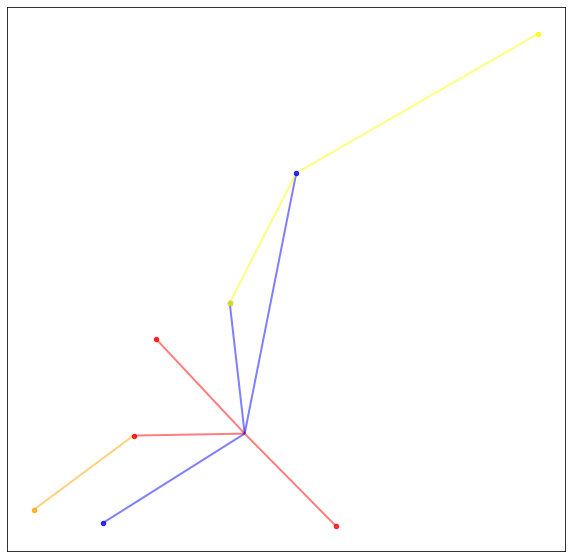

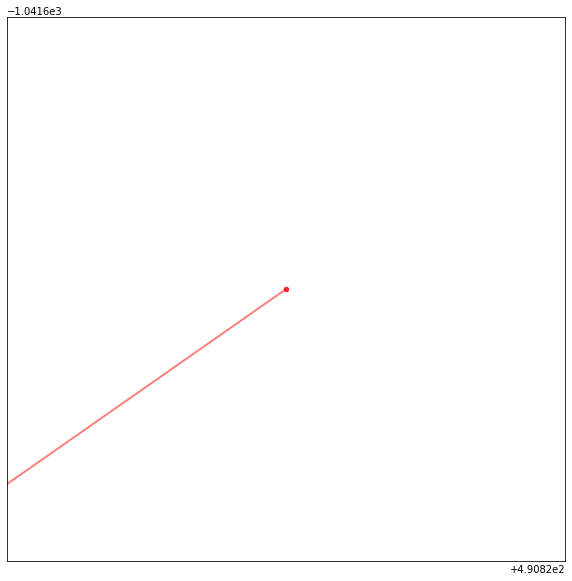

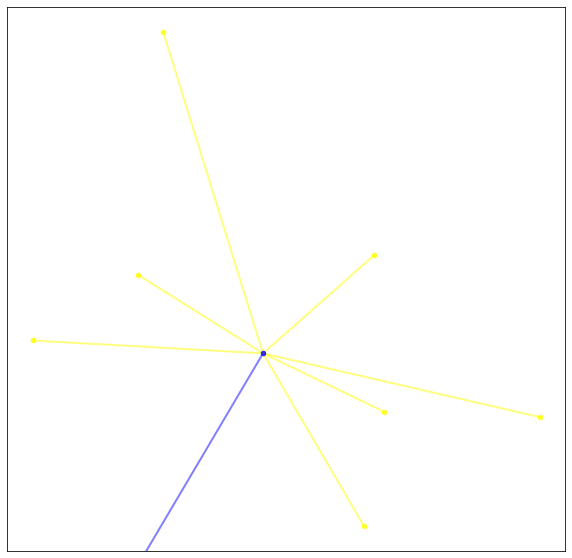

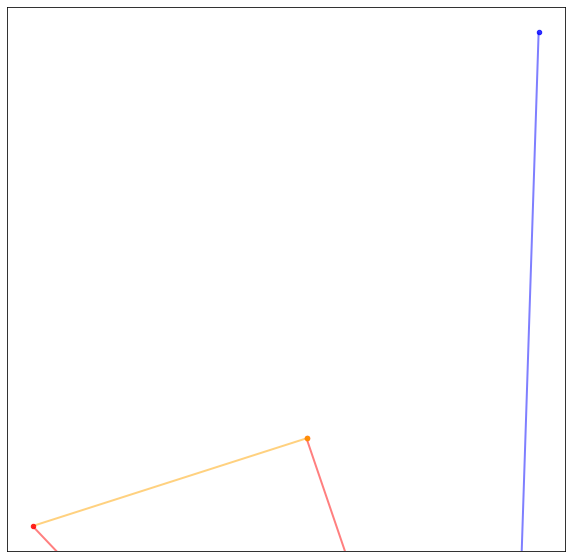

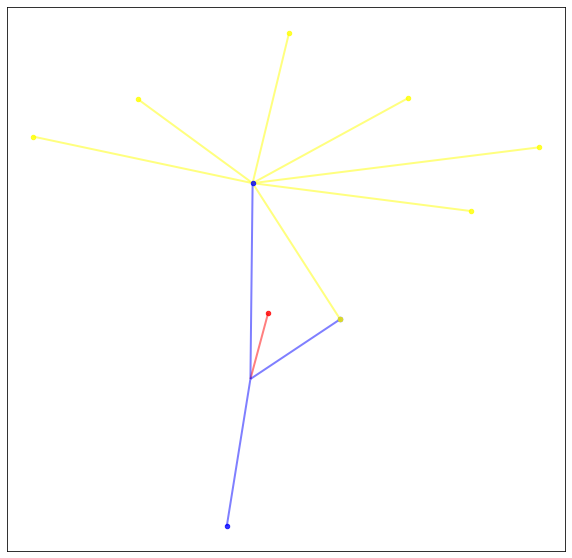

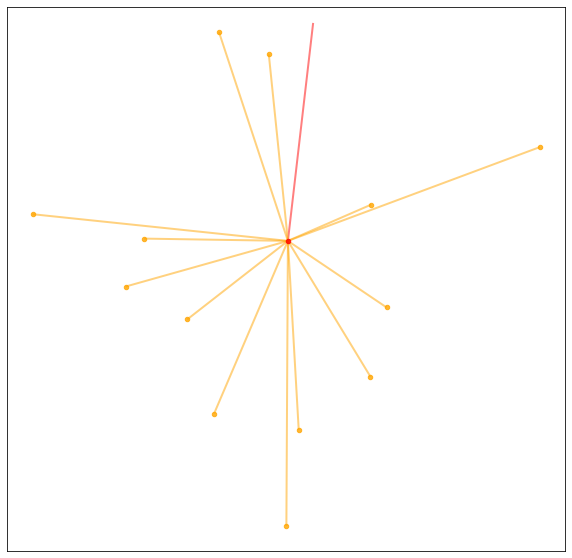

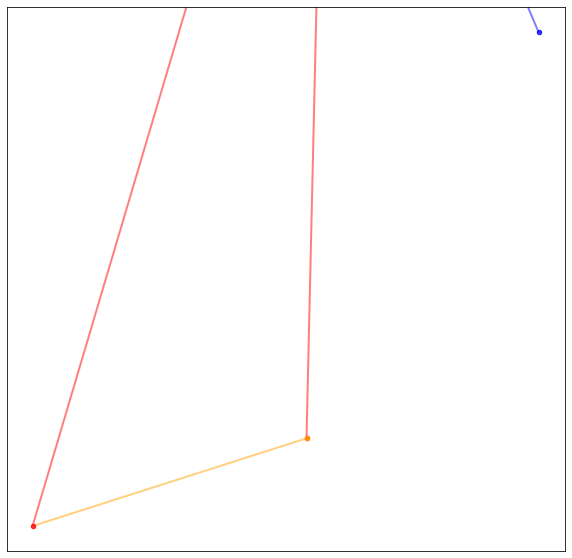

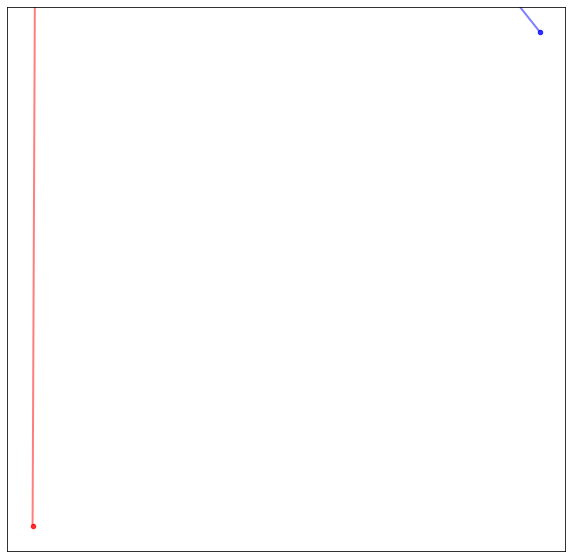

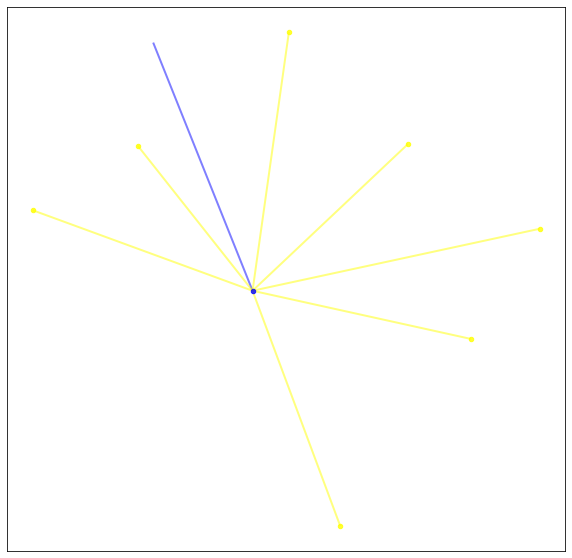

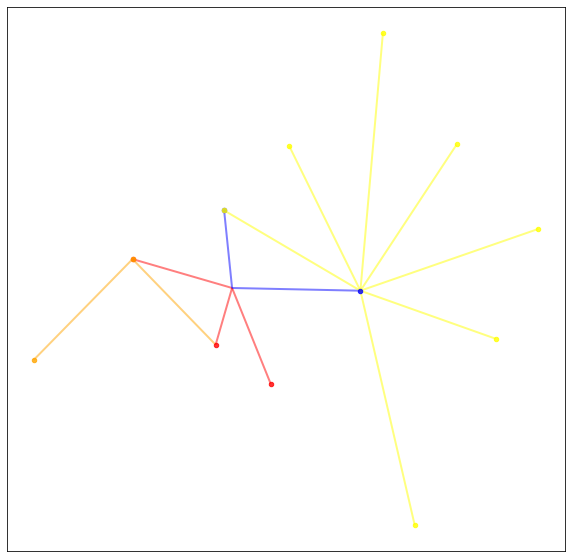

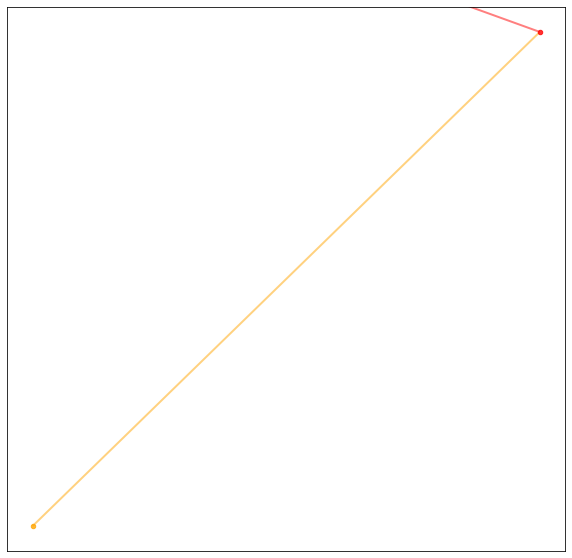

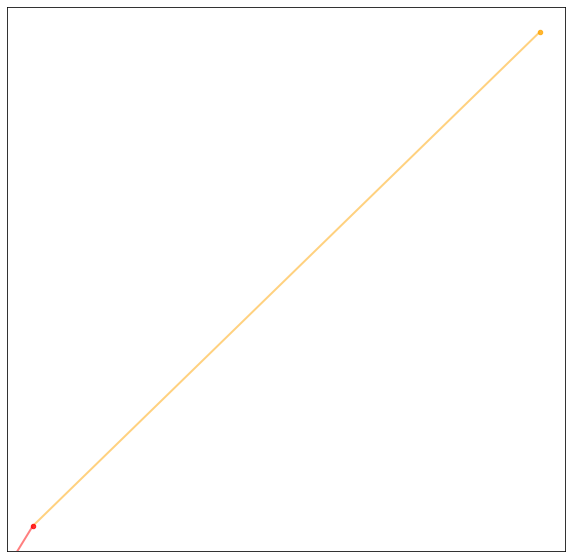

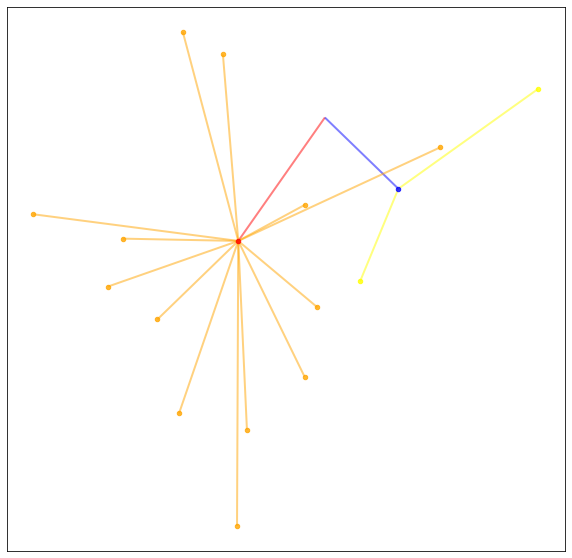

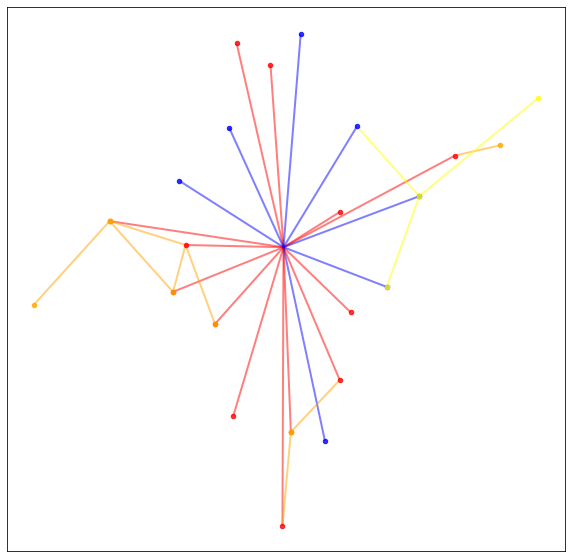

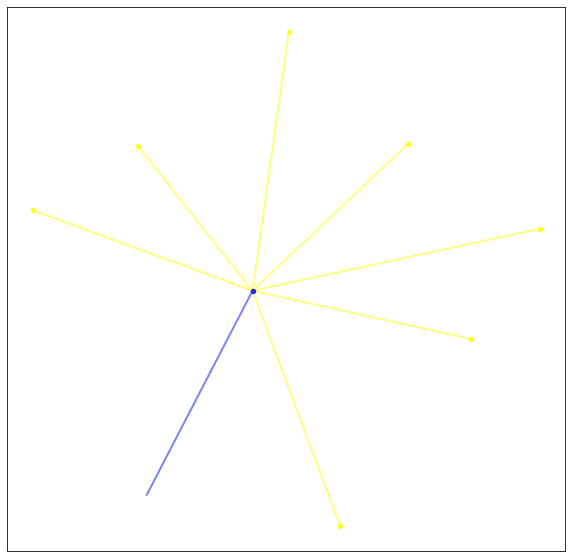

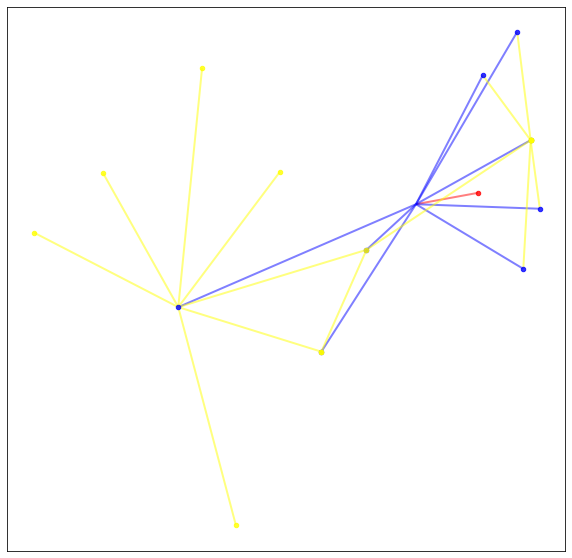

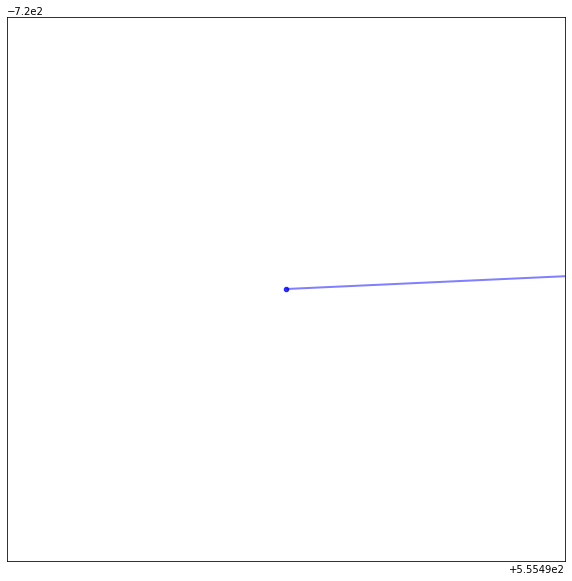

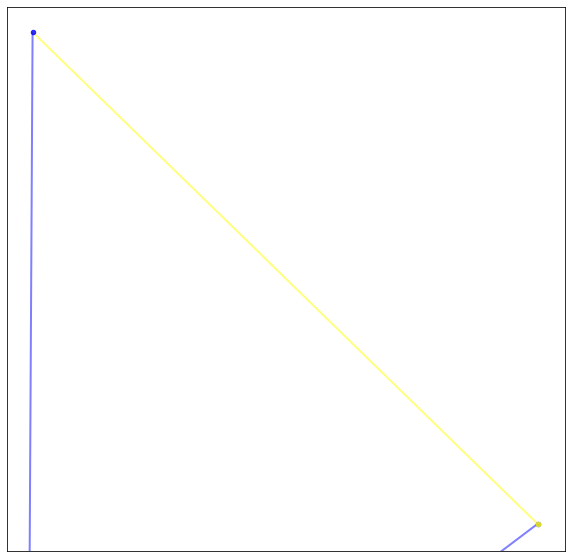

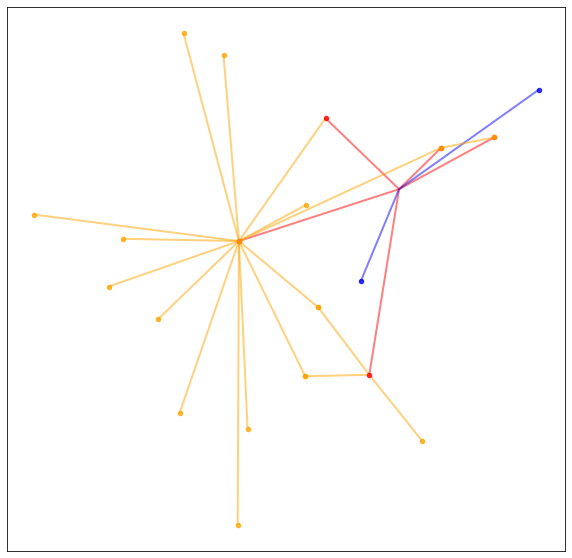

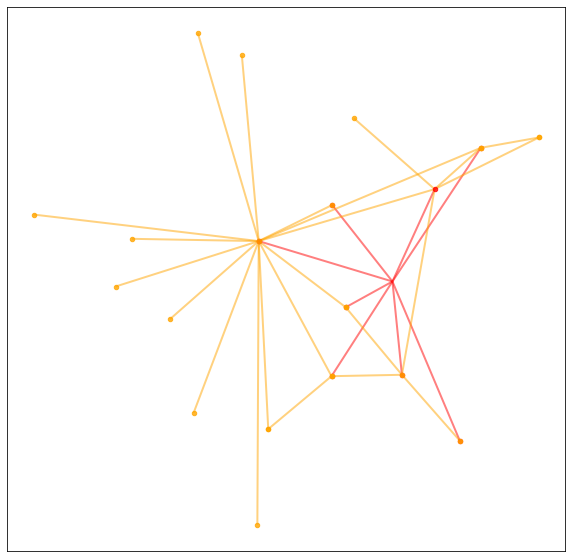

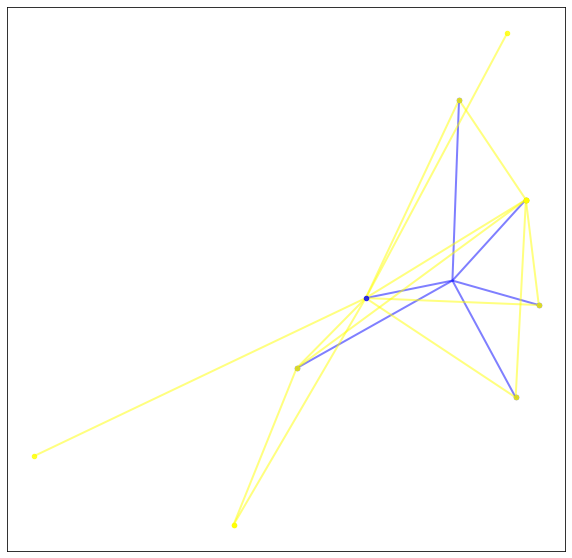

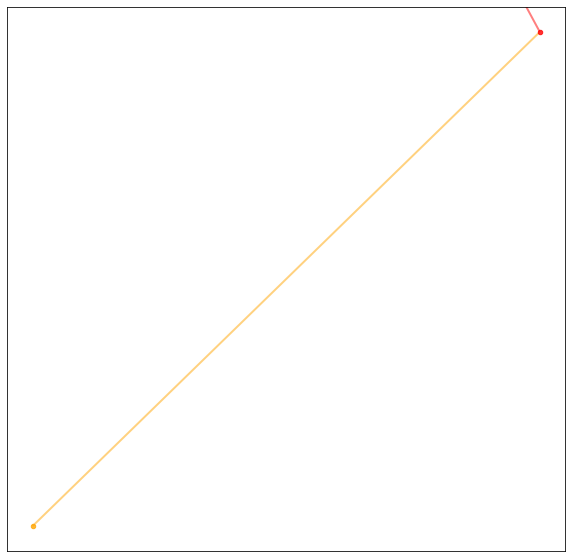

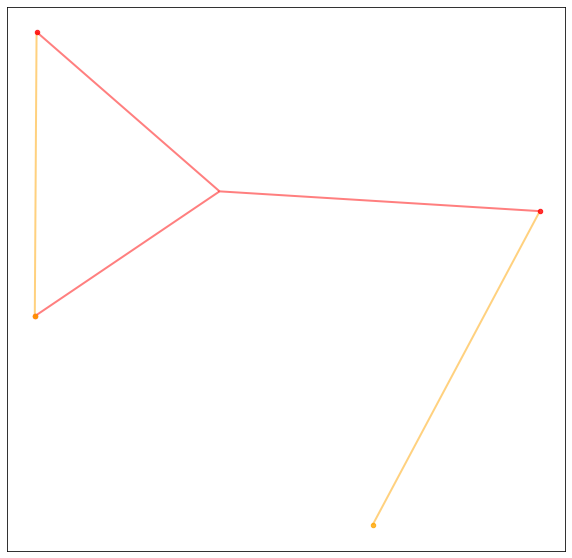

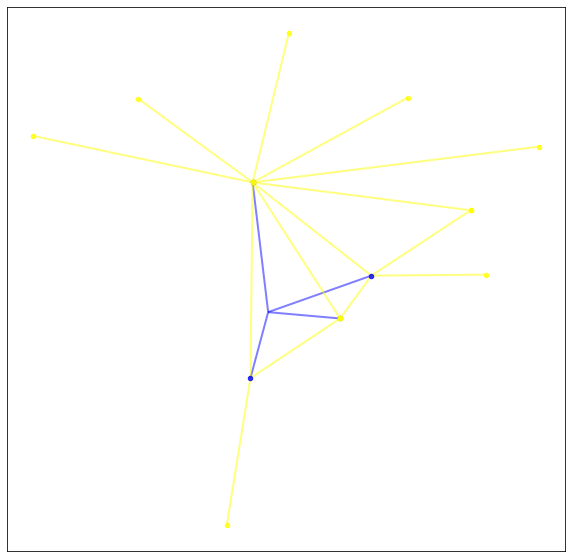

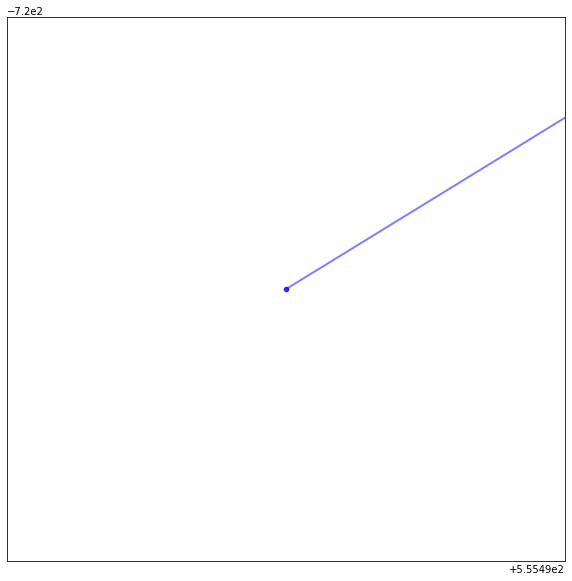

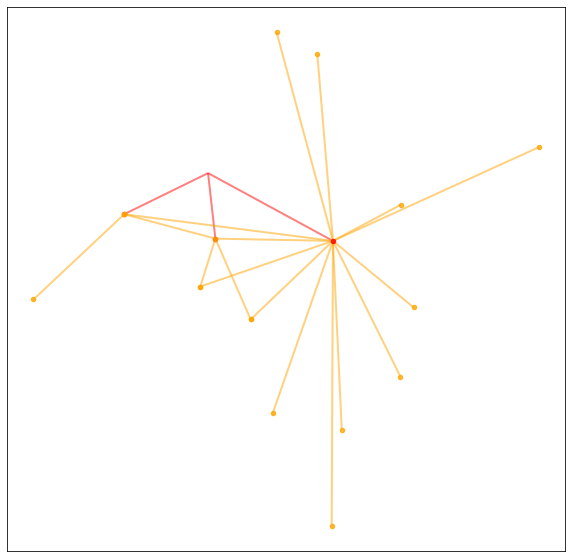

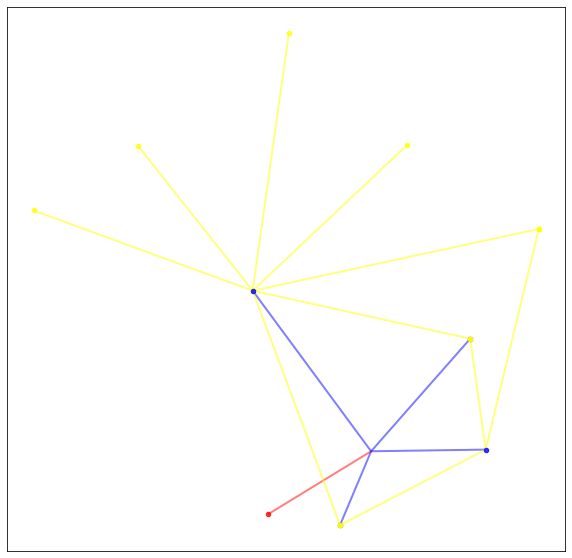

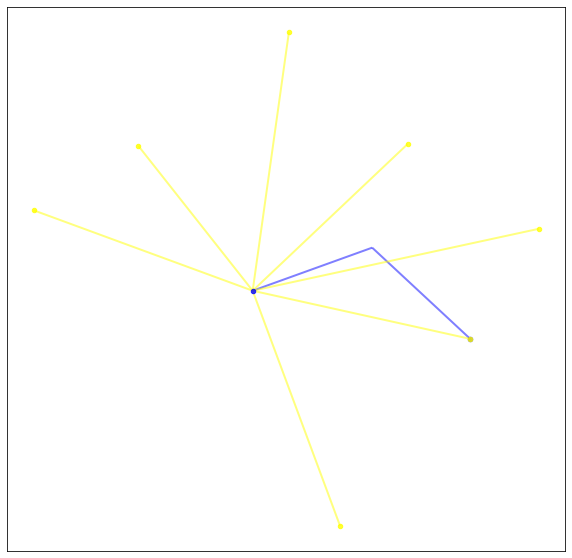

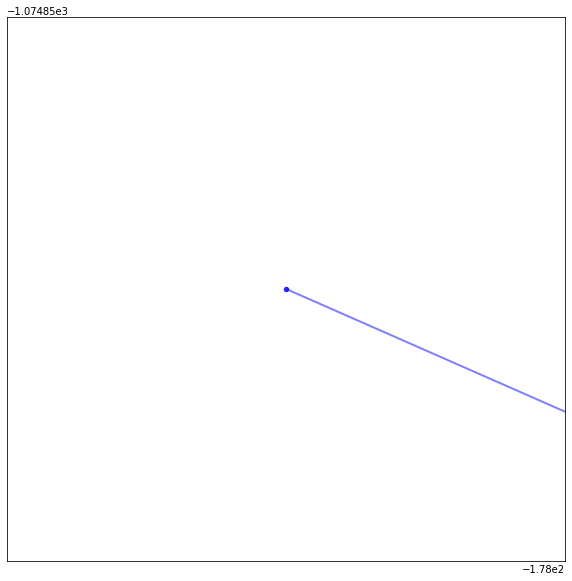

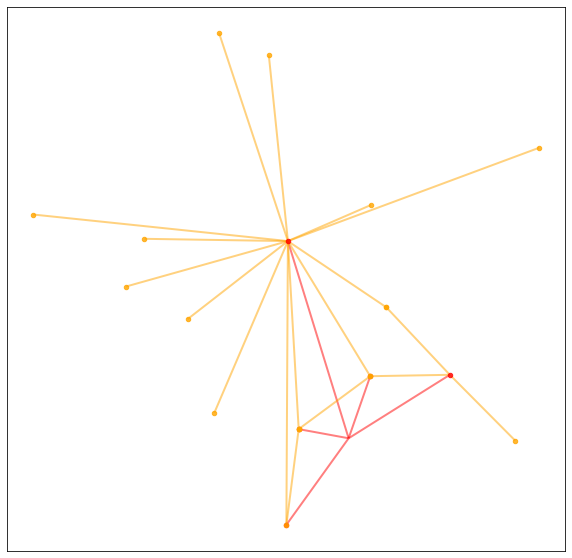

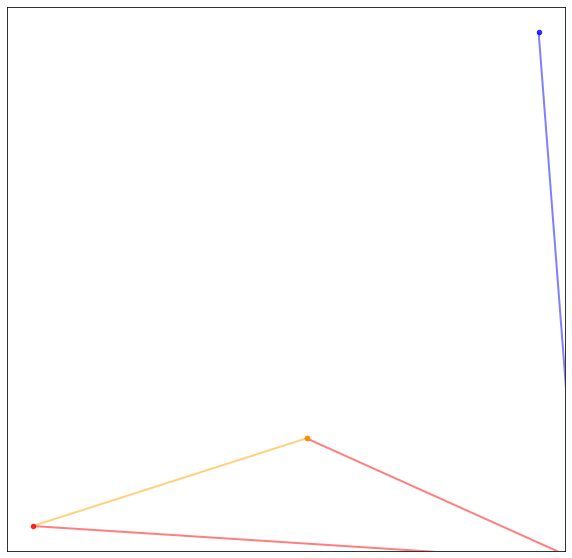

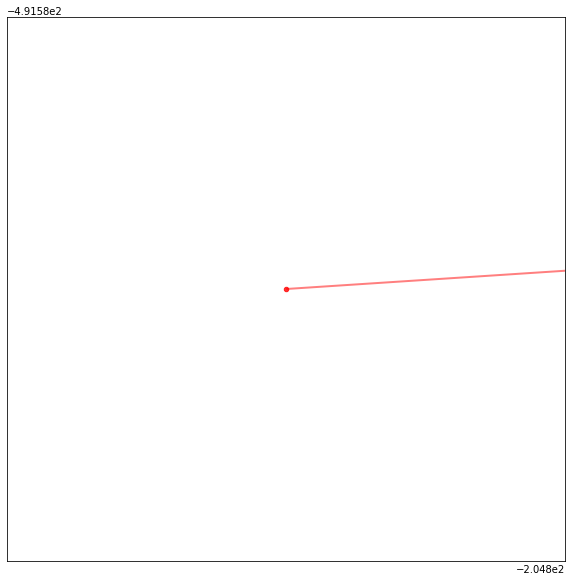

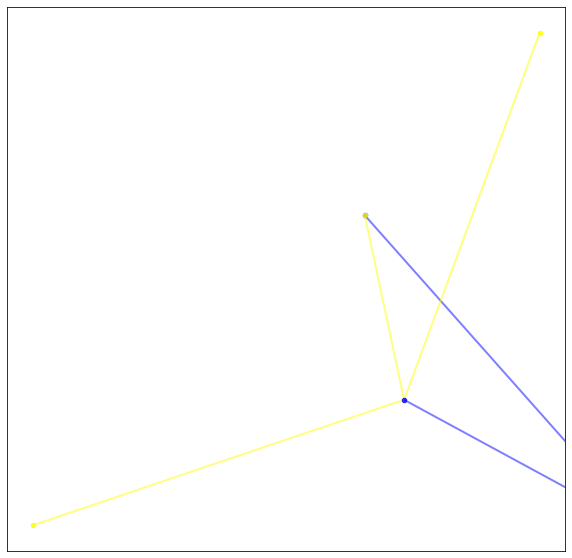

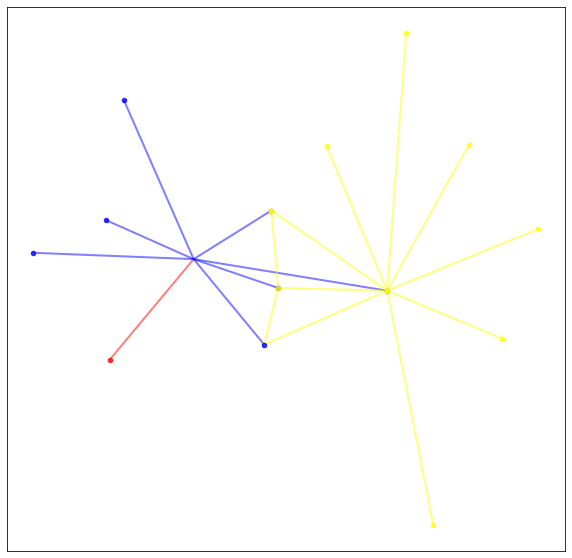

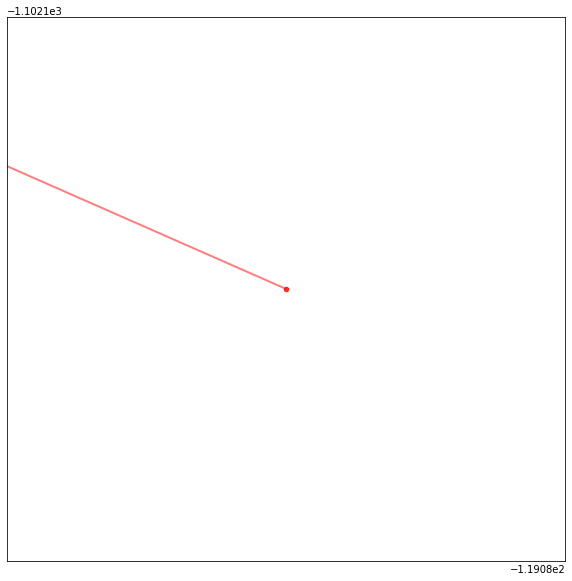

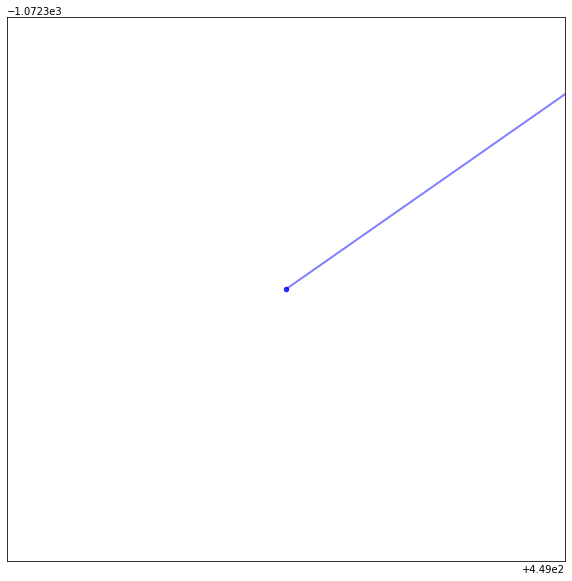

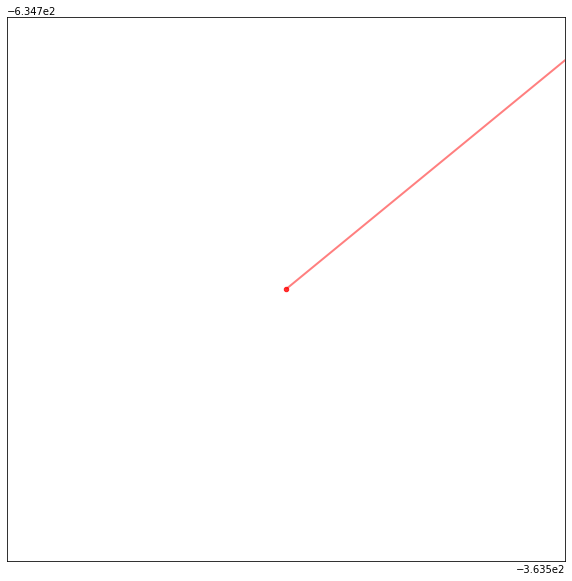

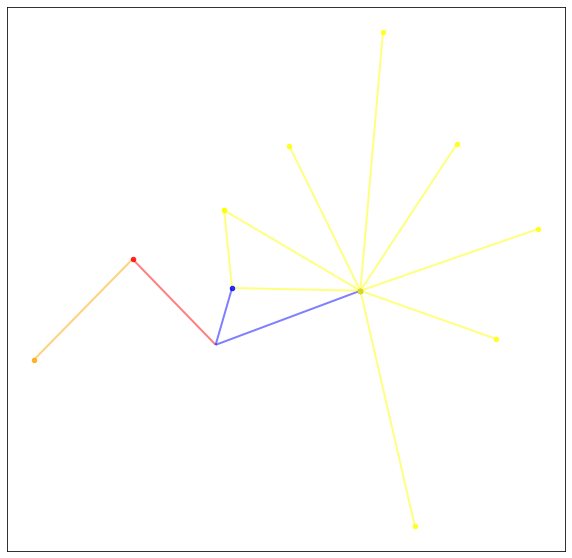

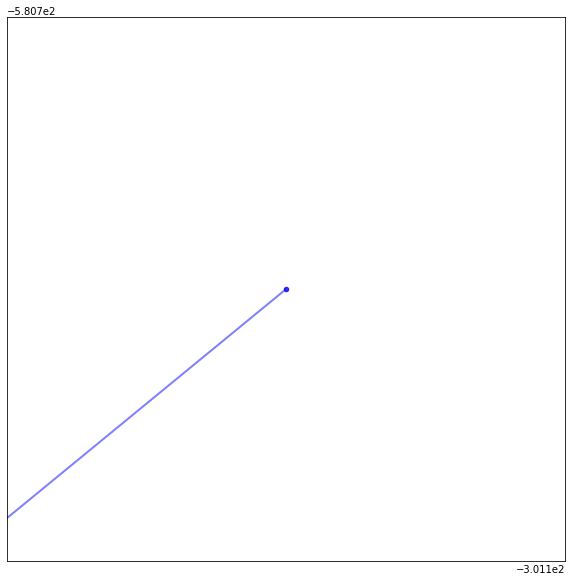

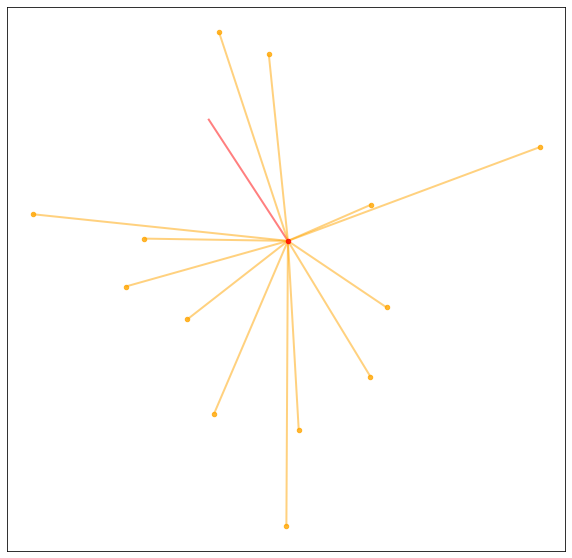

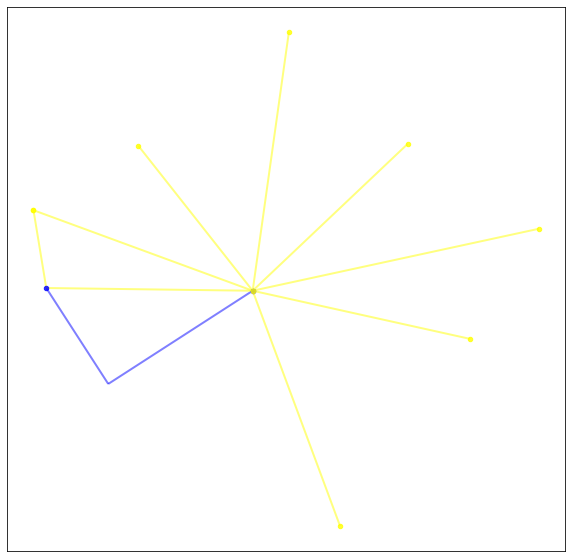

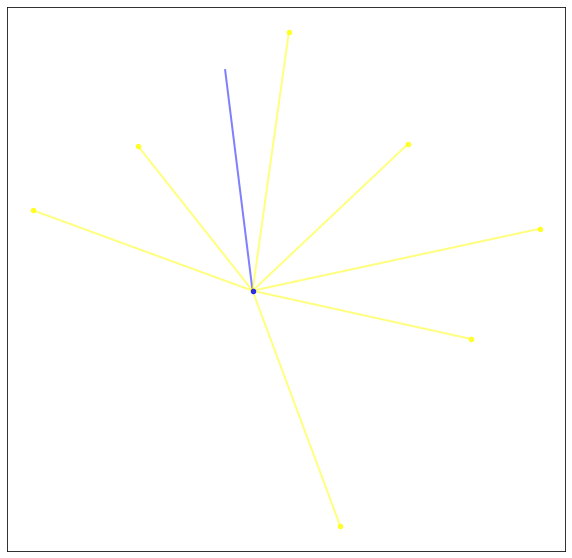

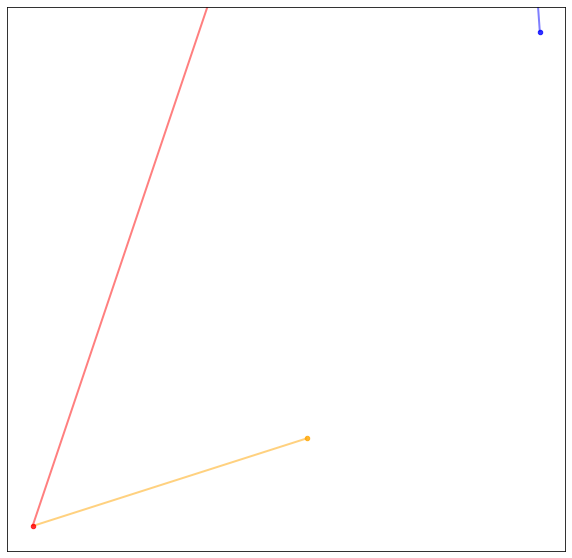

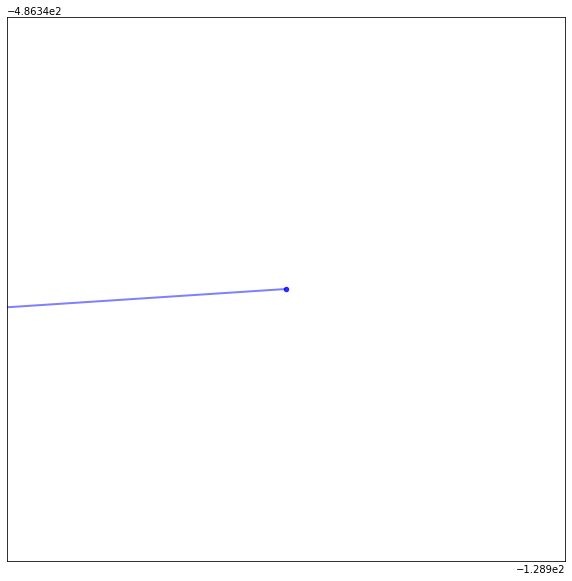

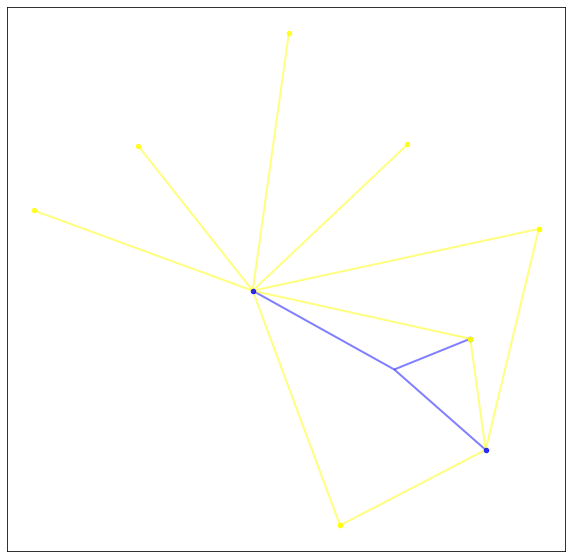

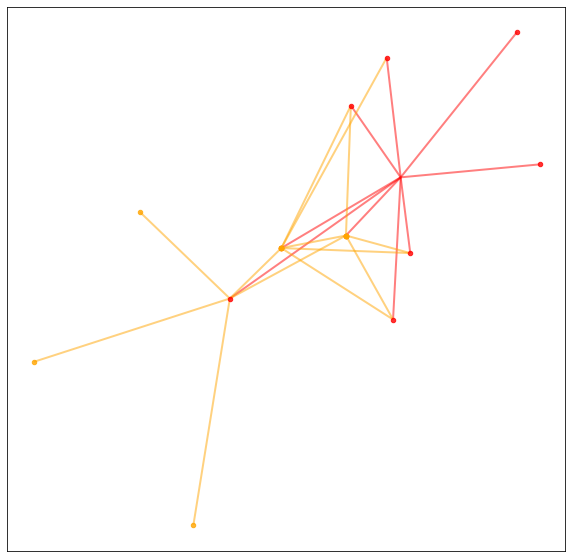

In [5]:
node_list = []
for node in data['nodes']:
    node_list.append(node['id'])


for node in node_list:
    #Generating Labels
    labels={}
    labels[node]=node
    
    #path_to_store_graph_gext = 'graph_files/{}.gexf'.format(node)
    path_to_store_graph = 'plots/{}.jpg'.format(node)
    print('[INFO] Building Graph for user: ', node)
    #creating a new graph for this user
    G=nx.Graph()
    
    
    #add the user as a node
    print('[INFO] Adding User to the graph')
    G.add_node(node)
    
    
    
    nodes_infecting_me=[]
    nodes_i_am_infecting=[]
    
   
    
    edges_infecting_me=[]
    edges_i_am_infecting=[]
    
    secondary_nodes_infecting_me=[]
    secondary_edges_infecting_me=[]
    
    secondary_nodes_i_am_infecting=[]
    secondary_edges_i_am_infecting=[]
    
    
    #now add nodes and draw edges who might have infected the user
    for edge in data['edges']:
        
        if edge['target']==node:
            nodes_infecting_me.append(edge['source'])
            edges_infecting_me.append((edge['source'],edge['target']))
            labels[edge['source']]=edge['source']
            
            #print('[INFO] {} might have infected me'.format(edge['source']))
            #G.add_node(edge['source'])
            #G.add_edge(edge['source'],edge['target'])
            
        if edge['source']==node:
            
            nodes_i_am_infecting.append(edge['target'])
            edges_i_am_infecting.append((edge['source'],edge['target']))
            labels[edge['target']]=edge['target']
            
            #print('[INFO] I might have infected {}'.format(edge['target']))
            #G.add_node(edge['target'])
            #G.add_edge(edge['source'],edge['target'])
            
            
    for node in nodes_infecting_me:
        for edge in data['edges']:
            if edge['target']==node:
                secondary_nodes_infecting_me.append(edge['source'])
                secondary_edges_infecting_me.append((edge['source'],edge['target']))
                labels[edge['source']]=edge['source']
                
    for node in nodes_i_am_infecting:
        for edge in data['edges']:
            if edge['source']==node:
                secondary_nodes_i_am_infecting.append(edge['target'])
                secondary_edges_i_am_infecting.append((edge['source'],edge['target']))
                labels[edge['source']]=edge['source']

    print('[USER] Finished Building Graph')
    print('[INFO] Starting Plotting')
    pos={
    node['id']:(node['x'],node['y']) for node in data['nodes']
    }
    plt.figure(figsize=(10,10))
    nx.draw_networkx_nodes(G,pos,
                           nodelist=nodes_infecting_me,
                           node_color='r',
                           node_size=20,
                       alpha=0.8,
                         )
    nx.draw_networkx_nodes(G,pos,
                           nodelist=nodes_i_am_infecting,
                           node_color='b',
                           node_size=20,
                           alpha=0.8,
                          )


    nx.draw_networkx_nodes(G,pos,
                           nodelist=secondary_nodes_infecting_me,
                           node_color='orange',
                           node_size=20,
                           alpha=0.8,
                          )


    nx.draw_networkx_nodes(G,pos,
                           nodelist=secondary_nodes_i_am_infecting,
                           node_color='yellow',
                           node_size=20,
                           alpha=0.8,
                          )



    # # edges

    nx.draw_networkx_edges(G,pos,
                           edgelist=edges_infecting_me,
                           width=2,alpha=0.5,edge_color='r')
    nx.draw_networkx_edges(G,pos,
                           edgelist=edges_i_am_infecting,
                           width=2,alpha=0.5,edge_color='b')

    nx.draw_networkx_edges(G,pos,
                           edgelist=secondary_edges_infecting_me,
                           width=2,alpha=0.5,edge_color='orange')

    nx.draw_networkx_edges(G,pos,
                           edgelist=secondary_edges_i_am_infecting,
                           width=2,alpha=0.5,edge_color='yellow')

    

    #nx.write_gexf(G, path_to_store_graph_gext)
    plt.savefig(path_to_store_graph)
    print('[USER] DONE! ')
    print('------------------')

In [6]:
for node in data['edges']:
    print(node)

{'source': '11', 'target': '12', 'id': '575', 'attributes': {'weight2': '-74', 'weight1': '29'}, 'color': 'rgb(142,210,189)', 'size': 1.0}
{'source': '1', 'target': '25', 'id': '622', 'attributes': {'weight2': '-84', 'weight1': '126'}, 'color': 'rgb(0,109,44)', 'size': 1.0}
{'source': '40', 'target': '41', 'id': '629', 'attributes': {'weight2': '-52', 'weight1': '3'}, 'color': 'rgb(230,245,246)', 'size': 1.0}
{'source': '0', 'target': '3', 'id': '567', 'attributes': {'weight2': '-86', 'weight1': '42'}, 'color': 'rgb(100,192,162)', 'size': 1.0}
{'source': '29', 'target': '1', 'id': '609', 'attributes': {'weight2': '-90', 'weight1': '25'}, 'color': 'rgb(155,215,198)', 'size': 1.0}
{'source': '9', 'target': '1', 'id': '572', 'attributes': {'weight2': '-94', 'weight1': '149'}, 'color': 'rgb(0,109,44)', 'size': 1.0}
{'source': '8', 'target': '1', 'id': '588', 'attributes': {'weight2': '-90', 'weight1': '1'}, 'color': 'rgb(237,248,251)', 'size': 1.0}
{'source': '16', 'target': '19', 'id': '5

In [2]:
## Doing with pandas

In [3]:
df = pd.read_csv('graph_100000_1000000_edges.csv')

In [4]:
Graphtype = nx.Graph()
G_master = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=Graphtype)

# degrees=[]
# for x in range(0,100000):
#     try:
#         degrees.append(G_master.degree[x])
#     except:
#         degrees.append(0)


In [9]:

df_grouped_source=df.groupby('source')

#df when user id is target
df_grouped_target=df.groupby('target')


In [11]:
df_grouped_target.get_group(4)

source  target  weight
0          0       4       1
4227       3       4      20

In [10]:
user_id_list= [x for x in range(0,100000)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


In [16]:
start_time=time.time()



df = pd.read_csv('graph_100000_1000000_edges.csv')
Graphtype = nx.Graph()
G_master = nx.from_pandas_edgelist(df, edge_attr='weight', create_using=Graphtype)



user_id_list = [x for x in G_master.nodes]
degrees=[]



for user_id in user_id_list:
    print(user_id)
    df_edge = pd.DataFrame(columns=['source', 'target', 'weight'])
    df_node = pd.DataFrame(columns=['Id','Degree'])
    
    
    source = user_id
    df_node = df_node.append({'Id': user_id, 'Degree': degrees[source]}, ignore_index=True)
   
    
    #adding edge between source and one_hop
    try:
        one_hop_dict = nx.single_source_shortest_path_length(G_master,user_id,cutoff=1)
        for node in one_hop_dict:

            if node!=source:
                #print(source,node)
                df_edge = df_edge.append({'source': source, 'target': node, 'weight': G_master[source][node]['weight'] }, ignore_index=True)
                df_node = df_node.append({'Id': node, 'Degree': G_master.degree[node]}, ignore_index=True)


        df_edge.to_csv('one_hop_edge_folders/{}_one_hop_edge.csv'.format(source),index=False)
        df_node.to_csv('one_hop_node_folders/{}_one_hop_node.csv'.format(source),index=False)   
    
    except:
        print(user_id,'NOT IN GRAPH!')
        
        
print(time.time()-start_time)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043


3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649


5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5248 NOT IN GRAPH!
5249
5

6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6619
6620
6621
6622
6623
6624
6625
6626
6627
6627 NOT IN GRAPH!
6628
6629
6630
6631
6632
6633
6634
6635
6636
6637
6638
6639
6640
6641
6642
6643
6644
6645
6646
6647
6648
6649
6650
6651
6652
6653
6654
6655
6656
6657
6658
6659
6660
6661
6662
6663
6664
6665
6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6

8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342
8343
8344
8345
8346
8347
8348
8349
8350
8351
8352
8353
8354
8355
8356
8357
8358
8359
8360
8361
8362
8363
8364
8365
8366
8367
8368
8369
8370
8371
8372
8373
8374
8375
8376
8377
8378
8379
8380
8381
8382
8383
8384
8385


9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9764 NOT IN GRAPH!
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788
9789
9790
9791
9792
9793
9794
9795
9796
9797
9798
9799
9800
9801
9802
9803
9804
9805
9806
9807
9808
9809
9810
9811
9812
9813
9814
9815
9816
9817
9818
9819
9820
9821
9822
9823
9824
9825
9826
9827
9828
9829
9830
9831
9832
9833
9834
9835
9836
9837
9838
9839
9840
9841
9842
9843
9844
9845
9846
9847
9848
9849
9850
9851
9852
9853
9854
9855
9856
9856 NOT IN GRAPH!
9857
9858
9859
9860
9861
9862
9862 NOT IN GRAPH!
9863
9864
9865
9866
9867
9868
9869
9870
9871
9872
987

10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11082
11083
11084
11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11104 NOT IN GRAPH!
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11

12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12157 NOT IN GRAPH!
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12169 NOT IN GRAPH!
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12205 NOT IN GRAPH!
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12215 NOT IN GRAPH!
12216
12217
12218
12219
12220
12221
12222
12223
12224
12224 NOT IN GRAPH!
12225
12226
12227
12228
12229
12230
12230 NOT IN GRAPH!
12231
12232
12233
12234
12235
12236
12237
12238
12239
12239 NOT IN GRAPH!
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12250 NOT IN GRAPH!
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12265 NOT IN GRAPH!
12266
12267
12268
12269
12270
12271
12272
12272 NOT IN GRAPH!
12273
12274
12275
12276
12277
12278
12

13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
1349

14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14811 NOT IN GRAPH!
14812
14813
14814
14815
14815 NOT IN GRAPH!


15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
1604

17176
17177
17178
17179
17179 NOT IN GRAPH!
17180
17180 NOT IN GRAPH!
17181
17182
17182 NOT IN GRAPH!
17183
17184
17185
17185 NOT IN GRAPH!
17186
17186 NOT IN GRAPH!
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325


18398
18399
18400
18400 NOT IN GRAPH!
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18451 NOT IN GRAPH!
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18480 NOT IN GRAPH!
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18500 NOT IN GRAPH!
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18523 NOT IN GRAPH!
18524
18525
18526
18526 NOT IN GRAPH!
18527
18528
18529
18529 NOT IN GRAPH!
18530
18531
18532
18533
18534
18535
18535 NOT IN GRAPH!
18536
18537


19561
19562
19563
19564
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19722 NOT IN GRAPH!
19723
19

20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20891 NOT IN GRAPH!
20892
20893
20894
20895
20896
20896 NOT IN GRAPH!
20897
20897 NOT IN GRAPH!
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20920 NOT IN GRAPH!
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20946 NOT IN GRAPH!
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981


21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21947 NOT IN GRAPH!
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22020 NOT IN GRAPH!
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
22060
22061
22062
22063
22064
22065
22066


23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23125 NOT IN GRAPH!
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23137 NOT IN GRAPH!
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23167 NOT IN GRAPH!
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
23184
23185
23186
23187
23188
23188 NOT IN GRAPH!
23189
23189 NOT IN GRAPH!
23190
23191
23191 NOT IN GRAPH!
23192
23192 NOT IN GRAPH!
23193
23194
23195
23195 NOT IN GRAPH!
23196
23197
23198
23199
23200
23201
23202
23203
23204
23204 NOT IN GRAPH!
23205
23206
23207
23207 NOT IN GRAPH!
23208
23209
23210
23211
23212
23213
23214
23214 NOT IN GRAPH!
23215
23215 NOT IN

24096
24097
24098
24099
24100
24101
24101 NOT IN GRAPH!
24102
24103
24104
24105
24106
24107
24107 NOT IN GRAPH!
24108
24109
24110
24111
24112
24113
24113 NOT IN GRAPH!
24114
24115
24116
24116 NOT IN GRAPH!
24117
24118
24118 NOT IN GRAPH!
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
24130
24131
24132
24132 NOT IN GRAPH!
24133
24134
24135
24135 NOT IN GRAPH!
24136
24137
24138
24139
24140
24141
24142
24143
24144
24144 NOT IN GRAPH!
24145
24146
24147
24148
24149
24150
24151
24152
24153
24153 NOT IN GRAPH!
24154
24155
24156
24157
24158
24158 NOT IN GRAPH!
24159
24160
24161
24162
24163
24164
24165
24166
24166 NOT IN GRAPH!
24167
24168
24168 NOT IN GRAPH!
24169
24170
24171
24172
24173
24174
24174 NOT IN GRAPH!
24175
24176
24177
24178
24178 NOT IN GRAPH!
24179
24179 NOT IN GRAPH!
24180
24180 NOT IN GRAPH!
24181
24181 NOT IN GRAPH!
24182
24183
24183 NOT IN GRAPH!
24184
24185
24186
24187
24187 NOT IN GRAPH!
24188
24189
24189 NOT IN GRAPH!
24190
24191
24192
24192 NOT IN GRAPH

24956
24956 NOT IN GRAPH!
24957
24958
24958 NOT IN GRAPH!
24959
24959 NOT IN GRAPH!
24960
24961
24961 NOT IN GRAPH!
24962
24962 NOT IN GRAPH!
24963
24964
24965
24965 NOT IN GRAPH!
24966
24967
24968
24968 NOT IN GRAPH!
24969
24969 NOT IN GRAPH!
24970
24970 NOT IN GRAPH!
24971
24971 NOT IN GRAPH!
24972
24973
24973 NOT IN GRAPH!
24974
24974 NOT IN GRAPH!
24975
24976
24976 NOT IN GRAPH!
24977
24977 NOT IN GRAPH!
24978
24979
24979 NOT IN GRAPH!
24980
24981
24982
24982 NOT IN GRAPH!
24983
24984
24984 NOT IN GRAPH!
24985
24986
24986 NOT IN GRAPH!
24987
24988
24989
24989 NOT IN GRAPH!
24990
24991
24991 NOT IN GRAPH!
24992
24992 NOT IN GRAPH!
24993
24994
24995
24995 NOT IN GRAPH!
24996
24997
24997 NOT IN GRAPH!
24998
24998 NOT IN GRAPH!
24999
25000
25001
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
25019
25020
25021
25022
25023
25024
25025
25026
25027
25028
25029
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25041
2504

26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26247
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26276
26277
26278
26279
26280
26281
26282
26283
26284
26285
26286
26287
26288
26289
26290
26291
26292
26293
26294
26295
26296
26297
26298
26299
26300
26301
26302
26303
26304
26305
26306
26307
26308
26309
26310
26311
26312
26313
26314
26315
26316
26317
26318
26319
26320
26321
26322
26323
26324
26325
26326
26327
26328
26329
26329 NOT IN GRAPH!
26330
26331
26332
26333
26334
26335
26336
26337
26338
26339
26340
26341
26342
26343
26344
26345
26346
26347
26348
26349
26350
26351
26352
26353
26354
26355
26356
26357
26358
26358 NOT IN GRAPH!
26359
26360
26361
26362
26363
26364
26365
26366
26367
26368
26369
26370
26371
26372
26373
26374
26375
26376
26377
26378
26379
26380
26381
26382
26383
26384
26385


27539
27540
27541
27542
27543
27544
27545
27546
27547
27548
27549
27550
27551
27552
27553
27554
27555
27556
27557
27558
27559
27560
27561
27562
27563
27564
27565
27566
27567
27568
27569
27570
27571
27572
27573
27574
27575
27576
27577
27578
27579
27580
27581
27582
27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27623 NOT IN GRAPH!
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27634 NOT IN GRAPH!
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
27696
27697
27698


28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28868 NOT IN GRAPH!
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28902 NOT IN GRAPH!
28903
28904
28904 NOT IN GRAPH!
28905
28905 NOT IN GRAPH!
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
28962
28

30067
30068
30069
30070
30071
30072
30073
30073 NOT IN GRAPH!
30074
30075
30076
30076 NOT IN GRAPH!
30077
30077 NOT IN GRAPH!
30078
30079
30080
30081
30082
30083
30084
30085
30086
30087
30088
30089
30090
30091
30092
30093
30094
30095
30096
30097
30098
30099
30100
30101
30102
30103
30104
30105
30106
30107
30108
30109
30110
30111
30112
30113
30114
30115
30116
30117
30118
30119
30120
30121
30122
30123
30124
30124 NOT IN GRAPH!
30125
30126
30127
30128
30129
30130
30131
30132
30133
30134
30135
30136
30137
30138
30139
30140
30141
30142
30143
30144
30145
30146
30147
30148
30149
30150
30150 NOT IN GRAPH!
30151
30152
30153
30154
30155
30156
30157
30158
30159
30160
30161
30162
30163
30164
30165
30166
30167
30168
30169
30170
30171
30172
30173
30173 NOT IN GRAPH!
30174
30175
30176
30177
30178
30179
30180
30181
30182
30183
30184
30185
30186
30187
30188
30189
30190
30191
30192
30193
30194
30195
30196
30197
30198
30199
30200
30201
30202
30203
30204
30205
30206
30207
30208
30208 NOT IN GRAPH!
30209
30

31143
31144
31144 NOT IN GRAPH!
31145
31146
31147
31147 NOT IN GRAPH!
31148
31149
31149 NOT IN GRAPH!
31150
31150 NOT IN GRAPH!
31151
31151 NOT IN GRAPH!
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31166 NOT IN GRAPH!
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31187 NOT IN GRAPH!
31188
31189
31190
31191
31192
31192 NOT IN GRAPH!
31193
31193 NOT IN GRAPH!
31194
31195
31196
31197
31197 NOT IN GRAPH!
31198
31199
31200
31200 NOT IN GRAPH!
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31211 NOT IN GRAPH!
31212
31213
31214
31215
31216
31216 NOT IN GRAPH!
31217
31218
31219
31220
31221
31221 NOT IN GRAPH!
31222
31222 NOT IN GRAPH!
31223
31224
31224 NOT IN GRAPH!
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
31235
31235 NOT IN GRAPH!
31236
31237
31238
31238 NOT IN GRAPH!
31239
31240
31241
31241 NOT IN GRAPH!
31242
31243
31243 NOT IN G

32393
32394
32395
32396
32396 NOT IN GRAPH!
32397
32398
32399
32400
32401
32402
32403
32404
32405
32405 NOT IN GRAPH!
32406
32407
32408
32409
32410
32411
32412
32413
32414
32415
32416
32417
32418
32419
32419 NOT IN GRAPH!
32420
32421
32422
32423
32424
32425
32426
32427
32428
32429
32430
32431
32432
32433
32434
32435
32436
32437
32438
32439
32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32512 NOT IN GRAPH!
32513
32514
32515
32516
32517
32518
32519
32520
32521
32522
32523
32524
32525
32526
32527
32528
32529
32530
32531
32532
32533
32534
32535
32536
32537
32538
32539
32540
32541
32542
32543
32544
32545
32

33582
33583
33583 NOT IN GRAPH!
33584
33585
33585 NOT IN GRAPH!
33586
33587
33588
33589
33590
33591
33591 NOT IN GRAPH!
33592
33592 NOT IN GRAPH!
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
33616
33617
33618
33619
33620
33621
33622
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33633
33634
33635
33635 NOT IN GRAPH!
33636
33637
33638
33639
33640
33641
33641 NOT IN GRAPH!
33642
33643
33644
33645
33646
33647
33648
33649
33650
33651
33652
33653
33654
33655
33656
33657
33658
33659
33660
33661
33662
33663
33664
33665
33666
33667
33668
33669
33670
33671
33672
33673
33674
33675
33676
33677
33678
33679
33680
33681
33682
33683
33684
33685
33686
33687
33688
33689
33690
33691
33692
33693
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
3372

34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34714 NOT IN GRAPH!
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
34729
34730
34731
34732
34733
34734
34735
34736
34737
34737 NOT IN GRAPH!
34738
34739
34739 NOT IN GRAPH!
34740
34741
34742
34743
34744
34745
34746
3474

35749
35750
35751
35752
35753
35754
35755
35756
35757
35758
35759
35760
35761
35762
35762 NOT IN GRAPH!
35763
35764
35765
35766
35767
35768
35769
35770
35771
35772
35773
35774
35775
35776
35777
35777 NOT IN GRAPH!
35778
35779
35780
35781
35782
35783
35784
35785
35786
35787
35788
35788 NOT IN GRAPH!
35789
35789 NOT IN GRAPH!
35790
35791
35792
35793
35794
35795
35796
35797
35798
35799
35799 NOT IN GRAPH!
35800
35801
35801 NOT IN GRAPH!
35802
35803
35804
35805
35806
35807
35808
35809
35810
35810 NOT IN GRAPH!
35811
35811 NOT IN GRAPH!
35812
35813
35813 NOT IN GRAPH!
35814
35815
35816
35817
35818
35819
35820
35821
35822
35823
35824
35825
35826
35826 NOT IN GRAPH!
35827
35828
35829
35830
35831
35832
35833
35834
35835
35836
35836 NOT IN GRAPH!
35837
35837 NOT IN GRAPH!
35838
35839
35840
35841
35842
35843
35844
35845
35846
35847
35848
35849
35850
35851
35852
35853
35854
35855
35855 NOT IN GRAPH!
35856
35857
35858
35859
35860
35860 NOT IN GRAPH!
35861
35862
35863
35864
35865
35866
35867
35868


36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36812 NOT IN GRAPH!
36813
36814
36814 NOT IN GRAPH!
36815
36815 NOT IN GRAPH!
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36837 NOT IN GRAPH!
36838
36839
36840
36841
36842
36843
36844
36845
36846
36847
36848
36849
36850
36851
36852
36853
36854
36855
36856
36857
36858
36859
36860
36861
36861 NOT IN GRAPH!
36862
36862 NOT IN GRAPH!
36863
36864
36864 NOT IN GRAPH!
36865
36866
36867
36868
36869
36870
36871
36872
36873
36874
36875
36875 NOT IN GRAPH!
36876
36876 NOT IN GRAPH!
36877
36878
36879
36880
36881
36882
36883
36884
36885
36885 NOT IN GRAPH!
36886
36887
36888
36889
36890
36891
36892
36893
36894
36895
36896
36897
36898
36899
36900
36901
36902
36903
36904
36905
36906
36907
36908
36909
36909 NOT IN GRAPH!
36910
36910 NOT IN GRAPH!
36911
3691

37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
37752
37753
37754
37755
37756
37757
37758
37759
37760
37761
37762
37763
37764
37765
37766
37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795
37796
37797
37798
37799
37800
37801
37802
37803
37804
37805
37806
37807
37808
37809
37810
37811
37812
37813
37814
37815
37816
37817
37818
37819
37820
37821
37822
37823
37824
3782

38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
38988
38989
38990
38991
38992
38993
38994
38994 NOT IN GRAPH!
38995
38996
38997
38998
38999
38999 NOT IN GRAPH!
39000
39000 NOT IN GRAPH!
39001
39002
39003
39004
39005
39006
39006 NOT IN GRAPH!
39007
39008
39009
39010
39011
39011 NOT IN GRAPH!
39012
39012 NOT IN GRAPH!
39013
39014
39015
39016
39017
39018
39019
39020
39021
39022
39023
39024
39025
39026
39027
39028
39029
39030
39031
39032
39033
39033 NOT IN GRAPH!
39034
39035
39036
39036 NOT IN GRAPH!
39037
39038
39039
39039 NOT IN GRAPH!
39040
39041
39042
39042 NOT IN GRAPH!
39043
39043 NOT IN GRAPH!
39044
39045
39046
39046 NOT IN GRAPH!
39047
39048
39048 NOT IN GRAPH!
39049
39049 NOT IN GRAPH!
39050
39051
39052
39053
39054
39055
39056
39057
39058
39058 NOT IN GRAPH!
39059
39059 NOT IN GRAPH!
39060
39060 NOT IN GRAPH!
39061
39061 NOT IN GRAPH!
39062
39063
39064
39065
39066
39067
39068
39069
39070
3907

40162
40163
40164
40165
40166
40167
40168
40169
40170
40171
40172
40172 NOT IN GRAPH!
40173
40174
40175
40176
40177
40178
40178 NOT IN GRAPH!
40179
40180
40181
40182
40183
40184
40184 NOT IN GRAPH!
40185
40186
40187
40188
40189
40190
40191
40192
40193
40194
40195
40196
40197
40198
40199
40200
40201
40202
40203
40204
40205
40205 NOT IN GRAPH!
40206
40207
40207 NOT IN GRAPH!
40208
40209
40210
40211
40212
40213
40214
40214 NOT IN GRAPH!
40215
40216
40217
40218
40219
40219 NOT IN GRAPH!
40220
40220 NOT IN GRAPH!
40221
40222
40223
40223 NOT IN GRAPH!
40224
40225
40226
40227
40227 NOT IN GRAPH!
40228
40229
40230
40230 NOT IN GRAPH!
40231
40232
40233
40233 NOT IN GRAPH!
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40279 NOT IN GRAPH!
40280
40281
40282
40283
40284
40

41285
41286
41287
41288
41289
41290
41291
41292
41293
41294
41295
41296
41297
41298
41298 NOT IN GRAPH!
41299
41300
41301
41301 NOT IN GRAPH!
41302
41303
41304
41304 NOT IN GRAPH!
41305
41306
41307
41307 NOT IN GRAPH!
41308
41309
41310
41311
41312
41313
41314
41315
41316
41317
41318
41319
41320
41321
41322
41323
41324
41325
41326
41327
41328
41329
41330
41331
41332
41333
41334
41335
41336
41337
41338
41339
41340
41340 NOT IN GRAPH!
41341
41342
41343
41344
41345
41346
41347
41348
41349
41350
41350 NOT IN GRAPH!
41351
41352
41353
41353 NOT IN GRAPH!
41354
41355
41356
41356 NOT IN GRAPH!
41357
41358
41359
41360
41361
41362
41363
41364
41365
41366
41367
41368
41369
41370
41371
41372
41373
41373 NOT IN GRAPH!
41374
41375
41376
41377
41378
41379
41380
41381
41382
41383
41384
41385
41386
41386 NOT IN GRAPH!
41387
41388
41389
41389 NOT IN GRAPH!
41390
41391
41392
41392 NOT IN GRAPH!
41393
41394
41395
41396
41397
41398
41398 NOT IN GRAPH!
41399
41399 NOT IN GRAPH!
41400
41401
41402
41403
41403 

42317
42318
42319
42320
42321
42322
42323
42324
42325
42326
42327
42328
42329
42330
42331
42332
42333
42334
42335
42336
42337
42338
42339
42340
42341
42342
42343
42344
42345
42346
42347
42348
42349
42350
42351
42352
42353
42354
42355
42356
42357
42358
42359
42360
42360 NOT IN GRAPH!
42361
42362
42363
42363 NOT IN GRAPH!
42364
42365
42366
42367
42368
42369
42370
42371
42372
42373
42374
42375
42376
42377
42378
42379
42380
42381
42382
42383
42384
42385
42386
42387
42388
42389
42390
42391
42392
42393
42394
42395
42396
42397
42398
42399
42400
42401
42402
42403
42404
42405
42406
42406 NOT IN GRAPH!
42407
42408
42409
42410
42411
42412
42413
42414
42415
42416
42417
42418
42419
42420
42421
42422
42423
42424
42425
42426
42427
42428
42429
42430
42430 NOT IN GRAPH!
42431
42432
42433
42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42

43320
43320 NOT IN GRAPH!
43321
43322
43323
43324
43325
43326
43327
43328
43329
43329 NOT IN GRAPH!
43330
43330 NOT IN GRAPH!
43331
43332
43332 NOT IN GRAPH!
43333
43333 NOT IN GRAPH!
43334
43335
43335 NOT IN GRAPH!
43336
43337
43338
43339
43339 NOT IN GRAPH!
43340
43340 NOT IN GRAPH!
43341
43341 NOT IN GRAPH!
43342
43343
43344
43344 NOT IN GRAPH!
43345
43346
43346 NOT IN GRAPH!
43347
43348
43349
43349 NOT IN GRAPH!
43350
43351
43352
43352 NOT IN GRAPH!
43353
43354
43355
43355 NOT IN GRAPH!
43356
43356 NOT IN GRAPH!
43357
43357 NOT IN GRAPH!
43358
43358 NOT IN GRAPH!
43359
43360
43361
43362
43363
43364
43365
43366
43367
43368
43369
43370
43371
43372
43373
43374
43375
43376
43377
43378
43379
43380
43381
43382
43383
43384
43385
43386
43387
43388
43389
43390
43391
43392
43393
43394
43395
43396
43397
43398
43399
43400
43400 NOT IN GRAPH!
43401
43402
43403
43403 NOT IN GRAPH!
43404
43405
43406
43407
43407 NOT IN GRAPH!
43408
43409
43410
43411
43412
43413
43414
43415
43416
43417
43418
43419


44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44316 NOT IN GRAPH!
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44379 NOT IN GRAPH!
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44423 NOT IN GRAPH

45342
45343
45344
45345
45346
45347
45348
45348 NOT IN GRAPH!
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45360 NOT IN GRAPH!
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45409 NOT IN GRAPH!
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
45447
45448
45449
45450
45451
45452
45453
45454
45455
45456
45457
45458
45459
45460
45461
45462
45463
45464
45465
45466
45467
45468
45469
45470
45471
45472
45473
45474
45475
45476
45477
45478
45479
45480
45481
45482
45482 NOT IN GRAPH!
45483
45484
45485
45486
45487
45488
45489
45490
45491
45491 NOT IN GRAPH!


46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46403 NOT IN GRAPH!
46404
46405
46405 NOT IN GRAPH!
46406
46406 NOT IN GRAPH!
46407
46408
46409
46409 NOT IN GRAPH!
46410
46411
46412
46413
46413 NOT IN GRAPH!
46414
46415
46416
46417
46418
46419
46420
46421
46422
46422 NOT IN GRAPH!
46423
46424
46424 NOT IN GRAPH!
46425
46425 NOT IN GRAPH!
46426
46427
46428
46429
46430
46431
46431 NOT IN GRAPH!
46432
46433
46434
46435
46436
46437
46438
46439
46440
46441
46442
46443
46443 NOT IN GRAPH!
46444
46445
46445 NOT IN GRAPH!
46446
46447
46448
46449
46450
46451
46452
46453
46454
46455
46456
46457
46457 NOT IN GRAPH!
46458
46458 NOT IN GRAPH!
46459
46460
46461
46462
46463
46464
46464 NOT IN GRAPH!
46465
46466
46466 NOT IN GRAPH!
46467
46468
46468 NOT IN GRAPH!
46469
46469 NOT IN GRAPH!
46470
46470 NOT IN GRAPH!
46471
46472
46473
46473 NOT IN GRAPH!
46474
46474 NOT IN GRAPH!
46475
46475 NOT IN GRAPH!
46476
46477
46477 NOT IN GRAPH!
46478
46478 NOT IN GRAPH!
46479
46479 NOT IN GRAPH!
4648

47303
47304
47305
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
47330
47331
47332
47333
47334
47335
47336
47337
47338
47339
47340
47341
47342
47343
47344
47345
47346
47347
47348
47349
47350
47351
47352
47353
47354
47355
47356
47357
47358
47359
47359 NOT IN GRAPH!
47360
47361
47362
47362 NOT IN GRAPH!
47363
47364
47365
47366
47367
47368
47369
47370
47371
47372
47373
47374
47375
47376
47377
47378
47379
47380
47381
47382
47383
47384
47385
47386
47387
47388
47389
47390
47391
47392
47393
47394
47395
47396
47397
47398
47399
47400
47401
47402
47403
47404
47405
47406
47407
47408
47409
47410
47411
47412
47413
47414
47415
47416
47417
47418
47419
47420
47421
47422
47423
47423 NOT IN GRAPH!
47424
47425
47426
47426 NOT IN GRAPH!
47427
47428
47429
47430
47431
47432
47433
47434
47434 NOT IN GRAPH!
47435
47436
47437
47438
47439
47440
47441
47441 NOT IN GRAPH!
47442
47443
47443 NOT IN GRAPH!
47444
47445
47

48228 NOT IN GRAPH!
48229
48229 NOT IN GRAPH!
48230
48230 NOT IN GRAPH!
48231
48231 NOT IN GRAPH!
48232
48232 NOT IN GRAPH!
48233
48233 NOT IN GRAPH!
48234
48234 NOT IN GRAPH!
48235
48236
48236 NOT IN GRAPH!
48237
48237 NOT IN GRAPH!
48238
48238 NOT IN GRAPH!
48239
48240
48241
48241 NOT IN GRAPH!
48242
48243
48244
48245
48246
48247
48248
48249
48250
48251
48252
48253
48254
48255
48256
48257
48258
48259
48259 NOT IN GRAPH!
48260
48261
48262
48262 NOT IN GRAPH!
48263
48264
48265
48265 NOT IN GRAPH!
48266
48267
48268
48269
48270
48271
48272
48273
48274
48275
48275 NOT IN GRAPH!
48276
48277
48278
48279
48280
48281
48282
48283
48283 NOT IN GRAPH!
48284
48284 NOT IN GRAPH!
48285
48286
48287
48287 NOT IN GRAPH!
48288
48289
48289 NOT IN GRAPH!
48290
48291
48292
48293
48294
48295
48296
48297
48298
48299
48299 NOT IN GRAPH!
48300
48301
48301 NOT IN GRAPH!
48302
48302 NOT IN GRAPH!
48303
48304
48305
48305 NOT IN GRAPH!
48306
48307
48308
48308 NOT IN GRAPH!
48309
48310
48311
48311 NOT IN GRAPH!
48

49026
49027
49028
49029
49030
49031
49031 NOT IN GRAPH!
49032
49033
49033 NOT IN GRAPH!
49034
49035
49036
49037
49038
49039
49039 NOT IN GRAPH!
49040
49041
49041 NOT IN GRAPH!
49042
49043
49044
49045
49046
49046 NOT IN GRAPH!
49047
49048
49049
49050
49051
49052
49053
49054
49055
49056
49057
49058
49059
49060
49061
49062
49063
49064
49065
49065 NOT IN GRAPH!
49066
49067
49068
49069
49069 NOT IN GRAPH!
49070
49070 NOT IN GRAPH!
49071
49071 NOT IN GRAPH!
49072
49073
49074
49075
49076
49077
49077 NOT IN GRAPH!
49078
49079
49080
49081
49082
49082 NOT IN GRAPH!
49083
49083 NOT IN GRAPH!
49084
49085
49086
49087
49088
49089
49089 NOT IN GRAPH!
49090
49090 NOT IN GRAPH!
49091
49092
49093
49094
49094 NOT IN GRAPH!
49095
49096
49097
49097 NOT IN GRAPH!
49098
49099
49100
49101
49101 NOT IN GRAPH!
49102
49103
49104
49105
49106
49106 NOT IN GRAPH!
49107
49107 NOT IN GRAPH!
49108
49108 NOT IN GRAPH!
49109
49109 NOT IN GRAPH!
49110
49111
49111 NOT IN GRAPH!
49112
49112 NOT IN GRAPH!
49113
49113 NOT IN

49732
49733
49734
49735
49736
49736 NOT IN GRAPH!
49737
49737 NOT IN GRAPH!
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49747 NOT IN GRAPH!
49748
49749
49750
49751
49752
49752 NOT IN GRAPH!
49753
49753 NOT IN GRAPH!
49754
49755
49756
49757
49758
49759
49760
49760 NOT IN GRAPH!
49761
49762
49763
49763 NOT IN GRAPH!
49764
49765
49766
49766 NOT IN GRAPH!
49767
49768
49768 NOT IN GRAPH!
49769
49770
49771
49772
49772 NOT IN GRAPH!
49773
49774
49775
49775 NOT IN GRAPH!
49776
49776 NOT IN GRAPH!
49777
49777 NOT IN GRAPH!
49778
49778 NOT IN GRAPH!
49779
49779 NOT IN GRAPH!
49780
49781
49781 NOT IN GRAPH!
49782
49782 NOT IN GRAPH!
49783
49783 NOT IN GRAPH!
49784
49784 NOT IN GRAPH!
49785
49785 NOT IN GRAPH!
49786
49787
49787 NOT IN GRAPH!
49788
49789
49790
49791
49792
49793
49794
49794 NOT IN GRAPH!
49795
49796
49796 NOT IN GRAPH!
49797
49797 NOT IN GRAPH!
49798
49798 NOT IN GRAPH!
49799
49800
49800 NOT IN GRAPH!
49801
49802
49802 NOT IN GRAPH!
49803
49803 NOT IN GRAPH!
49804
49

50708
50709
50710
50711
50712
50713
50714
50715
50716
50717
50718
50719
50720
50721
50722
50723
50724
50725
50726
50727
50728
50729
50730
50731
50732
50733
50734
50735
50736
50737
50738
50739
50740
50741
50742
50743
50744
50745
50746
50747
50748
50749
50750
50751
50752
50753
50754
50755
50756
50757
50758
50759
50760
50761
50762
50763
50764
50765
50766
50767
50768
50769
50770
50771
50772
50773
50774
50775
50776
50777
50777 NOT IN GRAPH!
50778
50779
50780
50780 NOT IN GRAPH!
50781
50782
50783
50784
50785
50786
50787
50788
50789
50790
50791
50792
50793
50794
50795
50796
50797
50798
50799
50800
50801
50802
50803
50804
50805
50806
50807
50808
50809
50810
50811
50812
50813
50814
50815
50816
50817
50818
50819
50820
50821
50822
50823
50824
50825
50826
50827
50828
50829
50830
50831
50832
50833
50834
50835
50836
50837
50838
50839
50840
50841
50842
50843
50844
50845
50846
50847
50848
50849
50850
50851
50852
50853
50854
50855
50856
50857
50858
50859
50860
50861
50862
50863
50864
50865
50866
50867


52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
52059
52060
52061
52062
52063
52064
52065
52066
52067
52068
52069
52070
52071
52072
52073
52074
52075
52076
52077
52078
52079
52080
52081
52082
52083
52084
52085
52086
52087
52088
52089
52090
52091
52092
52092 NOT IN GRAPH!
52093
52094
52095
52096
52097
52098
52098 NOT IN GRAPH!
52099
52100
52101
52102
52103
52104
52105
52106
52107
52108
52109
52110
52111
52112
52113
52114
52115
52116
52117
52118
52119
52120
52121
52122
52123
52124
52125
52126
52127
52128
52129
52130
52131
52132
52133
52134
52135
52136
52137
52138
52139
52140
52141
52141 NOT IN GRAPH!
52142
52143
52144
52144 NOT IN GRAPH!
52145
52146
52147
52148
52149
52150
52151
52152
52153
52154
52155
52156
52157
52158
52159
52160
52161
52162
52163
52164
52165
52166
52167
52168
52169
52170
52171
52172
52173
52174
52175
52176
52177
52178
52179
52180
52181
52182
52183
52184
52185
52186
52187
52188
52

53269
53270
53271
53272
53273
53274
53275
53276
53277
53278
53279
53280
53281
53282
53283
53284
53285
53286
53287
53288
53289
53290
53291
53292
53293
53294
53295
53296
53297
53298
53299
53300
53301
53302
53303
53304
53305
53306
53307
53308
53309
53310
53311
53312
53313
53314
53315
53316
53317
53318
53319
53320
53321
53322
53323
53324
53325
53326
53327
53328
53329
53330
53331
53332
53333
53334
53335
53336
53337
53338
53339
53340
53341
53342
53343
53344
53345
53346
53347
53348
53349
53350
53351
53352
53353
53354
53355
53356
53357
53358
53359
53360
53361
53362
53363
53364
53365
53366
53367
53368
53369
53370
53371
53372
53373
53374
53375
53376
53377
53378
53379
53380
53381
53382
53383
53384
53385
53386
53387
53388
53389
53390
53391
53392
53393
53394
53395
53396
53397
53398
53399
53400
53401
53402
53403
53404
53405
53406
53407
53408
53409
53410
53411
53412
53413
53414
53415
53416
53417
53418
53419
53420
53421
53422
53423
53424
53425
53426
53427
53428
53429
53430
53431
53432
53433
53434
5343

54570
54571
54572
54573
54574
54575
54576
54576 NOT IN GRAPH!
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54610 NOT IN GRAPH!
54611
54612
54612 NOT IN GRAPH!
54613
54614
54615
54616
54617
54618
54619
54619 NOT IN GRAPH!
54620
54621
54622
54623
54624
54625
54625 NOT IN GRAPH!
54626
54627
54628
54629
54630
54631
54632
54633
54634
54634 NOT IN GRAPH!
54635
54636
54636 NOT IN GRAPH!
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54654 NOT IN GRAPH!
54655
54656
54657
54658
54659
54660
54661
54661 NOT IN GRAPH!
54662
54663
54664
54665
54666
54667
54668
54668 NOT IN GRAPH!
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54678 NOT IN GRAPH!
54679
54680
54680 NOT IN GRAPH!
54681
54681 NOT IN GRAPH!
54682
54683
54683 NOT IN GRAPH!
54684
54684 NOT IN GRAPH!
54685
5468

55787
55788
55789
55790
55791
55792
55793
55794
55795
55796
55797
55798
55799
55800
55800 NOT IN GRAPH!
55801
55802
55803
55804
55805
55806
55807
55808
55809
55810
55811
55812
55813
55814
55815
55816
55817
55818
55819
55820
55821
55822
55823
55824
55825
55826
55827
55828
55829
55830
55830 NOT IN GRAPH!
55831
55832
55833
55833 NOT IN GRAPH!
55834
55835
55836
55837
55838
55839
55840
55841
55842
55843
55844
55844 NOT IN GRAPH!
55845
55845 NOT IN GRAPH!
55846
55847
55848
55849
55850
55851
55852
55852 NOT IN GRAPH!
55853
55854
55855
55856
55857
55857 NOT IN GRAPH!
55858
55858 NOT IN GRAPH!
55859
55860
55861
55862
55863
55864
55865
55866
55867
55868
55869
55870
55870 NOT IN GRAPH!
55871
55872
55873
55874
55875
55876
55877
55878
55879
55880
55881
55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
55893
55894
55895
55896
55897
55898
55899
55900
55901
55902
55903
55904
55905
55906
55907
55907 NOT IN GRAPH!
55908
55909
55910
55911
55912
55913
55914
55915
55916
55917
55918
55919
55

56921
56922
56923
56924
56925
56926
56926 NOT IN GRAPH!
56927
56928
56929
56929 NOT IN GRAPH!
56930
56931
56932
56933
56934
56935
56936
56937
56938
56939
56940
56941
56942
56943
56944
56945
56946
56947
56948
56949
56950
56951
56952
56953
56954
56955
56956
56957
56958
56959
56960
56961
56962
56963
56964
56965
56966
56967
56968
56969
56969 NOT IN GRAPH!
56970
56971
56972
56973
56974
56975
56976
56977
56978
56979
56980
56981
56982
56983
56984
56985
56986
56987
56988
56989
56990
56991
56992
56993
56994
56995
56996
56997
56998
56999
57000
57001
57002
57003
57004
57005
57006
57007
57008
57009
57010
57011
57012
57013
57014
57015
57016
57016 NOT IN GRAPH!
57017
57017 NOT IN GRAPH!
57018
57019
57020
57021
57022
57023
57024
57025
57026
57026 NOT IN GRAPH!
57027
57028
57029
57030
57031
57032
57033
57034
57035
57036
57037
57038
57039
57040
57041
57042
57043
57044
57045
57046
57047
57048
57049
57050
57051
57052
57053
57054
57055
57056
57057
57058
57059
57060
57061
57062
57063
57064
57065
57066
5706

58158
58159
58160
58161
58162
58163
58164
58165
58166
58167
58168
58169
58170
58171
58172
58173
58174
58175
58176
58177
58178
58179
58180
58181
58182
58183
58184
58185
58186
58187
58188
58189
58190
58191
58192
58193
58194
58194 NOT IN GRAPH!
58195
58196
58197
58198
58199
58200
58201
58201 NOT IN GRAPH!
58202
58202 NOT IN GRAPH!
58203
58204
58205
58206
58207
58208
58209
58210
58211
58212
58213
58214
58215
58216
58217
58218
58219
58220
58221
58222
58223
58224
58225
58226
58227
58228
58229
58230
58231
58232
58233
58234
58235
58236
58237
58238
58239
58240
58241
58242
58243
58244
58245
58246
58247
58248
58249
58250
58251
58252
58253
58254
58255
58256
58257
58258
58259
58260
58261
58262
58263
58264
58265
58266
58267
58268
58269
58270
58271
58272
58273
58274
58275
58276
58277
58278
58279
58280
58281
58281 NOT IN GRAPH!
58282
58283
58284
58285
58286
58287
58288
58289
58290
58291
58292
58293
58294
58295
58296
58297
58298
58298 NOT IN GRAPH!
58299
58300
58301
58302
58303
58304
58305
58306
58307


59295
59296
59297
59298
59299
59299 NOT IN GRAPH!
59300
59301
59302
59303
59304
59305
59306
59306 NOT IN GRAPH!
59307
59308
59309
59310
59311
59312
59312 NOT IN GRAPH!
59313
59314
59315
59316
59317
59317 NOT IN GRAPH!
59318
59319
59320
59321
59322
59323
59324
59324 NOT IN GRAPH!
59325
59325 NOT IN GRAPH!
59326
59327
59328
59329
59330
59330 NOT IN GRAPH!
59331
59332
59333
59333 NOT IN GRAPH!
59334
59334 NOT IN GRAPH!
59335
59336
59337
59337 NOT IN GRAPH!
59338
59339
59340
59341
59341 NOT IN GRAPH!
59342
59343
59343 NOT IN GRAPH!
59344
59344 NOT IN GRAPH!
59345
59345 NOT IN GRAPH!
59346
59346 NOT IN GRAPH!
59347
59348
59348 NOT IN GRAPH!
59349
59350
59351
59352
59352 NOT IN GRAPH!
59353
59354
59354 NOT IN GRAPH!
59355
59356
59357
59358
59358 NOT IN GRAPH!
59359
59360
59360 NOT IN GRAPH!
59361
59361 NOT IN GRAPH!
59362
59363
59364
59365
59366
59367
59368
59368 NOT IN GRAPH!
59369
59370
59370 NOT IN GRAPH!
59371
59371 NOT IN GRAPH!
59372
59373
59373 NOT IN GRAPH!
59374
59375
59376
59377
59

60476
60477
60478
60479
60480
60481
60482
60483
60484
60485
60486
60487
60488
60489
60490
60490 NOT IN GRAPH!
60491
60492
60493
60494
60495
60495 NOT IN GRAPH!
60496
60497
60498
60499
60500
60501
60502
60502 NOT IN GRAPH!
60503
60504
60505
60506
60506 NOT IN GRAPH!
60507
60508
60509
60509 NOT IN GRAPH!
60510
60511
60512
60513
60514
60515
60515 NOT IN GRAPH!
60516
60517
60518
60519
60520
60520 NOT IN GRAPH!
60521
60521 NOT IN GRAPH!
60522
60523
60524
60525
60526
60527
60528
60529
60530
60530 NOT IN GRAPH!
60531
60532
60533
60534
60535
60536
60537
60538
60538 NOT IN GRAPH!
60539
60539 NOT IN GRAPH!
60540
60541
60541 NOT IN GRAPH!
60542
60542 NOT IN GRAPH!
60543
60543 NOT IN GRAPH!
60544
60544 NOT IN GRAPH!
60545
60545 NOT IN GRAPH!
60546
60547
60548
60549
60550
60551
60552
60553
60554
60555
60556
60557
60558
60559
60560
60561
60562
60563
60564
60565
60566
60567
60568
60569
60570
60571
60572
60573
60574
60575
60576
60577
60578
60579
60580
60581
60582
60583
60584
60585
60586
60587
60588
60

61522
61522 NOT IN GRAPH!
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
61541
61542
61543
61544
61545
61546
61547
61548
61549
61550
61551
61552
61553
61554
61555
61556
61557
61557 NOT IN GRAPH!
61558
61559
61560
61561
61562
61563
61564
61565
61566
61567
61568
61569
61570
61571
61572
61573
61574
61575
61576
61577
61577 NOT IN GRAPH!
61578
61579
61580
61581
61582
61583
61584
61585
61586
61587
61588
61589
61590
61591
61592
61593
61594
61594 NOT IN GRAPH!
61595
61596
61597
61598
61599
61600
61601
61602
61603
61604
61605
61606
61607
61607 NOT IN GRAPH!
61608
61609
61609 NOT IN GRAPH!
61610
61611
61612
61612 NOT IN GRAPH!
61613
61613 NOT IN GRAPH!
61614
61615
61616
61617
61618
61619
61620
61621
61622
61623
61624
61625
61626
61627
61628
61629
61630
61631
61632
61632 NOT IN GRAPH!
61633
61634
61635
61636
61637
61637 NOT IN GRAPH!
61638
61638 NOT IN GRAPH!
61639
61640
61641
61642
61643
61644
61645
61646
61647
61648
61649
61650
61650 

62427
62428
62429
62430
62431
62431 NOT IN GRAPH!
62432
62433
62434
62435
62436
62436 NOT IN GRAPH!
62437
62437 NOT IN GRAPH!
62438
62439
62439 NOT IN GRAPH!
62440
62440 NOT IN GRAPH!
62441
62442
62443
62444
62444 NOT IN GRAPH!
62445
62445 NOT IN GRAPH!
62446
62446 NOT IN GRAPH!
62447
62447 NOT IN GRAPH!
62448
62448 NOT IN GRAPH!
62449
62450
62450 NOT IN GRAPH!
62451
62452
62452 NOT IN GRAPH!
62453
62454
62455
62455 NOT IN GRAPH!
62456
62456 NOT IN GRAPH!
62457
62458
62459
62460
62461
62461 NOT IN GRAPH!
62462
62462 NOT IN GRAPH!
62463
62464
62465
62465 NOT IN GRAPH!
62466
62466 NOT IN GRAPH!
62467
62467 NOT IN GRAPH!
62468
62468 NOT IN GRAPH!
62469
62469 NOT IN GRAPH!
62470
62470 NOT IN GRAPH!
62471
62471 NOT IN GRAPH!
62472
62473
62473 NOT IN GRAPH!
62474
62474 NOT IN GRAPH!
62475
62476
62477
62478
62478 NOT IN GRAPH!
62479
62479 NOT IN GRAPH!
62480
62480 NOT IN GRAPH!
62481
62481 NOT IN GRAPH!
62482
62482 NOT IN GRAPH!
62483
62484
62485
62485 NOT IN GRAPH!
62486
62486 NOT IN GRAPH!


63625
63626
63627
63628
63629
63630
63631
63632
63633
63634
63635
63636
63637
63638
63639
63640
63640 NOT IN GRAPH!
63641
63642
63643
63644
63645
63646
63647
63648
63649
63650
63651
63652
63653
63654
63655
63656
63657
63658
63659
63660
63661
63662
63663
63664
63665
63666
63667
63668
63668 NOT IN GRAPH!
63669
63670
63671
63672
63673
63674
63675
63676
63677
63678
63679
63680
63681
63682
63683
63684
63685
63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784


64844
64845
64846
64847
64848
64849
64850
64851
64852
64853
64854
64855
64856
64857
64858
64859
64860
64861
64862
64863
64864
64865
64866
64867
64868
64869
64870
64871
64872
64873
64874
64875
64876
64877
64878
64879
64880
64881
64882
64883
64884
64885
64886
64887
64888
64889
64890
64891
64892
64893
64894
64895
64896
64897
64898
64899
64900
64901
64902
64903
64904
64905
64906
64907
64908
64909
64910
64911
64912
64913
64914
64915
64916
64917
64918
64919
64920
64921
64922
64923
64924
64925
64926
64927
64928
64929
64930
64931
64932
64933
64934
64935
64936
64937
64938
64939
64940
64941
64942
64943
64944
64945
64946
64947
64948
64949
64950
64951
64952
64953
64954
64955
64956
64957
64958
64959
64960
64961
64962
64963
64964
64965
64966
64967
64968
64969
64970
64971
64972
64973
64974
64975
64976
64977
64978
64979
64980
64981
64982
64983
64984
64985
64986
64987
64988
64989
64990
64991
64992
64993
64994
64995
64996
64997
64998
64999
65000
65001
65001 NOT IN GRAPH!
65002
65003
65004
65005
65006
65

65929
65930
65931
65932
65933
65934
65935
65936
65937
65938
65939
65940
65941
65942
65943
65944
65945
65946
65947
65948
65949
65950
65951
65952
65953
65954
65955
65956
65957
65958
65959
65960
65961
65962
65963
65964
65965
65966
65967
65968
65969
65970
65971
65972
65973
65974
65975
65976
65977
65978
65979
65980
65981
65982
65983
65984
65985
65986
65987
65988
65989
65990
65990 NOT IN GRAPH!
65991
65992
65993
65994
65995
65996
65997
65998
65999
66000
66001
66002
66003
66004
66005
66006
66007
66008
66009
66010
66011
66012
66013
66014
66015
66016
66017
66018
66019
66020
66021
66022
66023
66024
66025
66026
66027
66028
66029
66030
66031
66032
66033
66034
66035
66036
66037
66038
66039
66040
66041
66042
66043
66044
66045
66046
66047
66048
66049
66050
66051
66052
66053
66054
66055
66056
66057
66058
66059
66060
66061
66062
66063
66063 NOT IN GRAPH!
66064
66065
66066
66067
66068
66069
66070
66071
66072
66073
66074
66075
66076
66077
66078
66079
66080
66081
66082
66083
66084
66085
66086
66087
66088


67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67049 NOT IN GRAPH!
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67070 NOT IN GRAPH!
67071
67072
67073
67074
67075
67076
67076 NOT IN GRAPH!
67077
67078
67079
67080
67081
67081 NOT IN GRAPH!
67082
67083
67084
67084 NOT IN GRAPH!
67085
67086
67087
67087 NOT IN GRAPH!
67088
67088 NOT IN GRAPH!
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67099 NOT IN GRAPH!
67100
67101
67102
67103
67104
67105
67106
67107
67108
67109
67110
67110 NOT IN GRAPH!
67111
67112
67113
67113 NOT IN GRAPH!
67114
67115
67116
67117
67118
67119
67120
67121
67122
67122 NOT IN GRAPH!
67123
67123 NOT IN GRAPH!
67124
67125
67125 NOT IN GRAPH!
67126
67127
67128
67128 NOT IN GRAPH!
67129
67130
67131
67131 NOT IN GRAPH!
67132
67133
67134
67135
67136
67137
67137 NOT IN GRAPH!
67138
67139
67140
67141
67142
67142 NOT IN GRAPH!
67143
67144
67145
67146
67147
67148
67148 

68030
68031
68032
68033
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68053 NOT IN GRAPH!
68054
68055
68056
68057
68057 NOT IN GRAPH!
68058
68059
68059 NOT IN GRAPH!
68060
68061
68062
68063
68064
68065
68066
68067
68068
68069
68070
68071
68071 NOT IN GRAPH!
68072
68073
68074
68075
68076
68077
68078
68079
68080
68081
68082
68083
68084
68085
68086
68087
68088
68089
68090
68091
68092
68093
68094
68095
68096
68097
68098
68099
68100
68101
68102
68103
68104
68105
68106
68107
68108
68109
68110
68110 NOT IN GRAPH!
68111
68111 NOT IN GRAPH!
68112
68113
68114
68114 NOT IN GRAPH!
68115
68116
68117
68118
68119
68120
68121
68122
68123
68124
68125
68126
68126 NOT IN GRAPH!
68127
68128
68129
68130
68131
68132
68132 NOT IN GRAPH!
68133
68134
68135
68135 NOT IN GRAPH!
68136
68137
68137 NOT IN GRAPH!
68138
68138 NOT IN GRAPH!
68139
68140
68141
68142
68143
68144
68145
68146
68147
68148
68149
68149 NOT IN GRAPH!
68150
68150 NOT IN G

68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68938 NOT IN GRAPH!
68939
68940
68941
68941 NOT IN GRAPH!
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
68966
68967
68968
68969
68970
68971
68972
68973
68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
68987
68988
68989
68990
68991
68992
68993
68994
68995
68996
68997
68998
68999
69000
69001
69002
69003
69004
69005
69006
69007
69008
69009
69010
69011
69012
69013
69014
69015
69016
69017
69018
69019


70024
70025
70026
70027
70028
70029
70030
70031
70032
70033
70034
70035
70036
70037
70038
70039
70040
70041
70042
70043
70044
70045
70046
70047
70048
70049
70050
70051
70052
70053
70054
70055
70056
70057
70058
70059
70060
70061
70062
70063
70064
70064 NOT IN GRAPH!
70065
70066
70067
70067 NOT IN GRAPH!
70068
70069
70070
70071
70072
70073
70074
70075
70076
70077
70078
70079
70079 NOT IN GRAPH!
70080
70081
70082
70083
70084
70085
70086
70087
70088
70089
70090
70091
70092
70093
70094
70095
70096
70097
70098
70099
70100
70100 NOT IN GRAPH!
70101
70101 NOT IN GRAPH!
70102
70103
70103 NOT IN GRAPH!
70104
70105
70106
70107
70108
70109
70110
70111
70112
70113
70114
70115
70115 NOT IN GRAPH!
70116
70116 NOT IN GRAPH!
70117
70118
70119
70120
70121
70122
70123
70124
70125
70126
70127
70128
70129
70130
70131
70132
70133
70134
70135
70136
70137
70138
70139
70140
70141
70142
70143
70144
70145
70146
70147
70148
70149
70150
70151
70152
70153
70154
70155
70156
70157
70157 NOT IN GRAPH!
70158
70159
7016

71053
71054
71054 NOT IN GRAPH!
71055
71056
71057
71058
71059
71060
71061
71062
71062 NOT IN GRAPH!
71063
71064
71064 NOT IN GRAPH!
71065
71065 NOT IN GRAPH!
71066
71067
71067 NOT IN GRAPH!
71068
71068 NOT IN GRAPH!
71069
71070
71071
71072
71073
71074
71075
71076
71077
71077 NOT IN GRAPH!
71078
71078 NOT IN GRAPH!
71079
71080
71081
71082
71083
71084
71085
71086
71087
71088
71088 NOT IN GRAPH!
71089
71089 NOT IN GRAPH!
71090
71090 NOT IN GRAPH!
71091
71091 NOT IN GRAPH!
71092
71093
71094
71095
71096
71097
71098
71099
71100
71101
71102
71103
71104
71105
71106
71107
71108
71109
71110
71111
71112
71113
71114
71115
71116
71117
71118
71119
71120
71121
71122
71123
71124
71125
71126
71127
71128
71129
71129 NOT IN GRAPH!
71130
71131
71132
71133
71134
71135
71136
71137
71138
71138 NOT IN GRAPH!
71139
71140
71141
71142
71143
71144
71145
71146
71147
71148
71149
71150
71151
71152
71153
71154
71155
71156
71157
71158
71159
71160
71161
71162
71163
71164
71165
71166
71167
71168
71169
71170
71171
71172


71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
71892
71893
71894
71895
71896
71897
71898
71899
71900
71901
71902
71903
71904
71905
71906
71907
71908
71909
71910
71911
71912
71913
71914
71915
71916
71917
71918
71919
71920
71921
71922
71923
71924
71925
71926
71927
71928
71929
71930
71931
71932
71933
71934
71935
71936
71937
71938
71939
71940
71941
71942
71943
71944
71945
71946
71947
71948
71949
71950
71951
71952
71953
71954
71955
71956
71957
71958
71959
71960
71961
71962
71963
71964
71965
71966
71967
71968
71969
71970
71971
71971 NOT IN GRAPH!
71972
71973
71974
71975
71976
71977
71978
71979
71980
71981
71982
71983
71984
71985
71986
71987
71988
71989
71990
71991
71992
71993
71994
71995
71996
71997
71998
71999
72000
72001
72002
72003
72004
72005
72006
72007
72008
72009
72010
72011
72012
72013
72014
72015
72016
72017
72018
72019
72020
72021
72022
72023
72024
72025
72026
72027
72028
72029
72030
72031
72032
72033
72034
72035
72036
72037
72038
72039
72040
72041
72042
72

72937
72938
72939
72940
72940 NOT IN GRAPH!
72941
72942
72943
72944
72944 NOT IN GRAPH!
72945
72946
72947
72947 NOT IN GRAPH!
72948
72948 NOT IN GRAPH!
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72960 NOT IN GRAPH!
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72972 NOT IN GRAPH!
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72986 NOT IN GRAPH!
72987
72988
72989
72990
72991
72992
72993
72994
72995
72995 NOT IN GRAPH!
72996
72997
72998
72999
73000
73001
73001 NOT IN GRAPH!
73002
73003
73003 NOT IN GRAPH!
73004
73005
73006
73007
73008
73008 NOT IN GRAPH!
73009
73009 NOT IN GRAPH!
73010
73011
73012
73013
73014
73015
73015 NOT IN GRAPH!
73016
73016 NOT IN GRAPH!
73017
73018
73018 NOT IN GRAPH!
73019
73019 NOT IN GRAPH!
73020
73021
73021 NOT IN GRAPH!
73022
73023
73024
73024 NOT IN GRAPH!
73025
73026
73027
73027 NOT IN GRAPH!
73028
73029
73030
73030 NOT IN GRAPH!
73031
73032
73033
73033 NOT IN GRAPH

73770
73771
73772
73772 NOT IN GRAPH!
73773
73774
73775
73776
73777
73777 NOT IN GRAPH!
73778
73778 NOT IN GRAPH!
73779
73780
73781
73782
73783
73784
73784 NOT IN GRAPH!
73785
73786
73787
73787 NOT IN GRAPH!
73788
73788 NOT IN GRAPH!
73789
73790
73790 NOT IN GRAPH!
73791
73792
73793
73794
73795
73796
73797
73798
73798 NOT IN GRAPH!
73799
73800
73801
73801 NOT IN GRAPH!
73802
73803
73804
73805
73806
73807
73808
73809
73810
73811
73811 NOT IN GRAPH!
73812
73813
73814
73815
73816
73817
73818
73818 NOT IN GRAPH!
73819
73819 NOT IN GRAPH!
73820
73821
73821 NOT IN GRAPH!
73822
73823
73824
73824 NOT IN GRAPH!
73825
73826
73827
73828
73829
73830
73831
73832
73833
73834
73835
73836
73837
73838
73839
73840
73841
73842
73843
73844
73845
73846
73847
73848
73849
73850
73851
73852
73853
73854
73855
73856
73857
73857 NOT IN GRAPH!
73858
73859
73860
73861
73862
73863
73864
73865
73866
73867
73868
73869
73870
73871
73872
73872 NOT IN GRAPH!
73873
73874
73875
73876
73877
73878
73879
73880
73881
73882
73

74545
74546
74546 NOT IN GRAPH!
74547
74547 NOT IN GRAPH!
74548
74549
74549 NOT IN GRAPH!
74550
74551
74551 NOT IN GRAPH!
74552
74553
74553 NOT IN GRAPH!
74554
74555
74555 NOT IN GRAPH!
74556
74556 NOT IN GRAPH!
74557
74558
74558 NOT IN GRAPH!
74559
74559 NOT IN GRAPH!
74560
74561
74562
74563
74563 NOT IN GRAPH!
74564
74564 NOT IN GRAPH!
74565
74565 NOT IN GRAPH!
74566
74567
74568
74569
74570
74570 NOT IN GRAPH!
74571
74572
74573
74574
74575
74575 NOT IN GRAPH!
74576
74577
74578
74579
74579 NOT IN GRAPH!
74580
74580 NOT IN GRAPH!
74581
74582
74583
74584
74585
74586
74587
74588
74589
74589 NOT IN GRAPH!
74590
74590 NOT IN GRAPH!
74591
74591 NOT IN GRAPH!
74592
74592 NOT IN GRAPH!
74593
74594
74594 NOT IN GRAPH!
74595
74595 NOT IN GRAPH!
74596
74596 NOT IN GRAPH!
74597
74598
74599
74599 NOT IN GRAPH!
74600
74601
74601 NOT IN GRAPH!
74602
74602 NOT IN GRAPH!
74603
74604
74604 NOT IN GRAPH!
74605
74605 NOT IN GRAPH!
74606
74606 NOT IN GRAPH!
74607
74607 NOT IN GRAPH!
74608
74609
74610
7461

75224
75225
75226
75227
75228
75229
75230
75231
75232
75233
75234
75235
75236
75237
75238
75239
75240
75241
75242
75243
75244
75245
75246
75247
75248
75249
75250
75251
75252
75253
75254
75255
75256
75257
75258
75259
75260
75261
75262
75263
75264
75265
75266
75267
75268
75269
75270
75271
75272
75273
75274
75275
75276
75277
75278
75279
75280
75281
75282
75283
75284
75285
75286
75287
75288
75289
75290
75291
75292
75293
75294
75295
75296
75297
75298
75299
75300
75301
75302
75303
75304
75305
75306
75307
75308
75309
75310
75311
75312
75313
75314
75315
75316
75317
75318
75319
75320
75321
75322
75323
75324
75325
75326
75327
75328
75329
75330
75331
75332
75333
75334
75335
75336
75337
75338
75339
75340
75341
75342
75343
75344
75345
75346
75347
75348
75349
75350
75351
75352
75353
75354
75355
75356
75357
75358
75359
75360
75361
75362
75363
75364
75365
75366
75367
75368
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
75379
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
7538

76541
76542
76543
76544
76545
76545 NOT IN GRAPH!
76546
76547
76548
76548 NOT IN GRAPH!
76549
76549 NOT IN GRAPH!
76550
76551
76552
76553
76554
76554 NOT IN GRAPH!
76555
76555 NOT IN GRAPH!
76556
76557
76558
76558 NOT IN GRAPH!
76559
76560
76560 NOT IN GRAPH!
76561
76561 NOT IN GRAPH!
76562
76563
76564
76565
76566
76567
76568
76569
76570
76571
76572
76573
76574
76575
76576
76577
76578
76579
76580
76581
76582
76583
76584
76585
76586
76587
76588
76589
76590
76591
76592
76593
76594
76595
76596
76597
76598
76599
76600
76601
76602
76603
76604
76605
76606
76607
76608
76609
76610
76611
76612
76613
76614
76615
76616
76617
76618
76619
76620
76621
76622
76623
76624
76625
76626
76627
76628
76629
76630
76631
76632
76633
76634
76635
76636
76637
76638
76639
76640
76641
76642
76643
76644
76645
76646
76647
76648
76649
76650
76651
76652
76653
76654
76655
76656
76657
76658
76659
76660
76661
76662
76663
76664
76665
76666
76667
76668
76669
76670
76671
76672
76673
76674
76675
76676
76677
76678
76679
76680


77736
77737
77738
77739
77740
77741
77742
77743
77744
77745
77746
77747
77748
77749
77750
77751
77752
77753
77754
77755
77756
77757
77758
77759
77760
77761
77762
77763
77764
77765
77766
77767
77768
77769
77770
77771
77772
77773
77774
77775
77776
77777
77778
77779
77780
77781
77782
77783
77784
77785
77786
77787
77788
77789
77790
77791
77792
77793
77794
77795
77796
77797
77798
77799
77800
77801
77802
77803
77804
77805
77806
77807
77808
77809
77810
77811
77812
77813
77814
77815
77816
77817
77818
77819
77820
77821
77822
77823
77824
77825
77826
77827
77828
77829
77829 NOT IN GRAPH!
77830
77831
77832
77833
77834
77835
77836
77837
77838
77839
77840
77841
77842
77843
77844
77845
77846
77847
77848
77849
77850
77851
77852
77853
77854
77855
77856
77857
77858
77859
77860
77861
77862
77863
77864
77865
77866
77867
77868
77869
77870
77871
77872
77873
77874
77875
77876
77877
77878
77879
77880
77881
77882
77883
77884
77884 NOT IN GRAPH!
77885
77886
77887
77888
77889
77890
77891
77892
77893
77894
77895


78885
78886
78886 NOT IN GRAPH!
78887
78888
78889
78890
78891
78892
78893
78894
78895
78896
78897
78898
78899
78899 NOT IN GRAPH!
78900
78901
78902
78903
78904
78905
78905 NOT IN GRAPH!
78906
78907
78908
78909
78910
78911
78912
78913
78914
78915
78916
78917
78918
78919
78920
78921
78922
78923
78924
78925
78926
78927
78928
78929
78930
78931
78932
78933
78934
78935
78936
78937
78938
78939
78940
78941
78942
78943
78944
78945
78946
78947
78948
78949
78950
78951
78952
78953
78954
78955
78956
78957
78958
78959
78960
78961
78962
78963
78964
78965
78966
78967
78968
78969
78970
78971
78972
78973
78974
78975
78976
78977
78978
78979
78980
78981
78982
78983
78984
78985
78986
78987
78988
78989
78990
78991
78992
78993
78994
78995
78996
78997
78998
78999
79000
79001
79002
79003
79004
79005
79006
79007
79008
79009
79010
79011
79012
79013
79014
79015
79016
79017
79018
79019
79020
79021
79022
79023
79024
79025
79026
79027
79028
79029
79030
79031
79032
79033
79034
79035
79036
79037
79038
79039
79040
7904

79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80009 NOT IN GRAPH!
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
80024
80025
80026
80027
80028
80028 NOT IN GRAPH!
80029
80030
80031
80032
80033
80034
80035
80036
80037
80038
80039
80040
80041
80042
80043
80044
80045
80046
80047
80048
80049
80050
80051
80051 NOT IN GRAPH!
80052
80053
80054
80055
80056
80057
80058
80059
80060
80061
80062
80062 NOT IN GRAPH!
80063
80064
80065
80066
80067
80068
80069
80070
80070 NOT IN GRAPH!
80071
80072
80073
80074
80075
80075 NOT IN GRAPH!
80076
80076 NOT IN GRAPH!
80077
80077 NOT IN GRAPH!
80078
80079
80080
80081
80082
80083
80084
80085
80086
80087
80088
80089
80090
80091
80092
80093
80094
80095
80096
80097
80098
80099
80100
80101
80102
80103
80104
80105
80106
80107
80108
80109
80110
80111
80112
80113
80114
80115
80116
80117
80118
80119
80120


80994
80995
80996
80997
80997 NOT IN GRAPH!
80998
80999
81000
81000 NOT IN GRAPH!
81001
81002
81002 NOT IN GRAPH!
81003
81003 NOT IN GRAPH!
81004
81004 NOT IN GRAPH!
81005
81006
81007
81008
81009
81010
81010 NOT IN GRAPH!
81011
81012
81013
81014
81015
81015 NOT IN GRAPH!
81016
81017
81018
81018 NOT IN GRAPH!
81019
81020
81021
81022
81022 NOT IN GRAPH!
81023
81023 NOT IN GRAPH!
81024
81025
81026
81026 NOT IN GRAPH!
81027
81028
81028 NOT IN GRAPH!
81029
81030
81031
81032
81033
81034
81035
81035 NOT IN GRAPH!
81036
81037
81038
81038 NOT IN GRAPH!
81039
81040
81040 NOT IN GRAPH!
81041
81041 NOT IN GRAPH!
81042
81043
81044
81044 NOT IN GRAPH!
81045
81046
81047
81047 NOT IN GRAPH!
81048
81049
81049 NOT IN GRAPH!
81050
81051
81051 NOT IN GRAPH!
81052
81052 NOT IN GRAPH!
81053
81053 NOT IN GRAPH!
81054
81055
81056
81057
81058
81059
81060
81061
81062
81063
81064
81065
81066
81067
81068
81069
81070
81071
81072
81073
81074
81075
81076
81077
81077 NOT IN GRAPH!
81078
81079
81080
81081
81082
81083


82013
82014
82014 NOT IN GRAPH!
82015
82016
82017
82018
82019
82020
82021
82022
82023
82024
82024 NOT IN GRAPH!
82025
82026
82027
82027 NOT IN GRAPH!
82028
82029
82029 NOT IN GRAPH!
82030
82030 NOT IN GRAPH!
82031
82032
82033
82034
82035
82036
82037
82038
82039
82040
82041
82042
82043
82044
82045
82046
82047
82048
82049
82050
82051
82052
82053
82054
82055
82056
82057
82058
82059
82060
82061
82062
82063
82064
82065
82066
82067
82068
82069
82070
82071
82072
82073
82074
82075
82076
82077
82078
82079
82080
82081
82082
82083
82084
82085
82086
82087
82088
82089
82090
82091
82092
82093
82094
82095
82096
82097
82098
82099
82100
82100 NOT IN GRAPH!
82101
82102
82103
82104
82105
82106
82107
82108
82109
82110
82111
82112
82113
82114
82115
82116
82117
82118
82119
82120
82121
82122
82123
82124
82125
82126
82127
82128
82129
82130
82131
82132
82133
82134
82135
82136
82137
82138
82139
82140
82141
82142
82143
82144
82145
82146
82147
82148
82149
82150
82151
82152
82153
82154
82155
82156
82157
82158
8215

83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83089 NOT IN GRAPH!
83090
83091
83091 NOT IN GRAPH!
83092
83093
83094
83095
83096
83097
83098
83099
83100
83101
83101 NOT IN GRAPH!
83102
83103
83104
83104 NOT IN GRAPH!
83105
83106
83107
83108
83109
83110
83111
83112
83113
83114
83115
83116
83117
83118
83119
83120
83121
83122
83123
83124
83125
83126
83127
83128
83129
83130
83131
83132
83133
83134
83135
83136
83137
83138
83139
83140
83141
83142
83143
83144
83145
83146
83147
83148
83149
83150
83150 NOT IN GRAPH!
83151
83152
83152 NOT IN GRAPH!
83153
83153 NOT IN GRAPH!
83154
83155
83156
83157
83158
83159
83160
83161
83162
83163
83164
83165
83166
83167
83168
83169
83170
83171
83171 NOT IN GRAPH!
83172
83173
83173 NOT IN GRAPH!
83174
83175
83176
83177
83178
83179
83180
83181
83182
83183
83184
83185
83186
83187
83187 NOT IN GRAPH!
83188
83189
83190
83191
83192
83193
83193 NOT IN GRAPH!
83194
83194 NOT IN GRAPH!
83195
83196
83197
83198
83199
83200
8320

84007
84007 NOT IN GRAPH!
84008
84009
84010
84011
84012
84013
84014
84015
84016
84016 NOT IN GRAPH!
84017
84018
84019
84020
84021
84022
84022 NOT IN GRAPH!
84023
84024
84025
84026
84027
84028
84029
84029 NOT IN GRAPH!
84030
84031
84032
84033
84034
84034 NOT IN GRAPH!
84035
84036
84037
84038
84038 NOT IN GRAPH!
84039
84040
84041
84042
84043
84044
84045
84046
84047
84047 NOT IN GRAPH!
84048
84049
84050
84050 NOT IN GRAPH!
84051
84052
84053
84054
84055
84056
84056 NOT IN GRAPH!
84057
84058
84059
84060
84060 NOT IN GRAPH!
84061
84062
84063
84064
84064 NOT IN GRAPH!
84065
84066
84067
84068
84068 NOT IN GRAPH!
84069
84070
84070 NOT IN GRAPH!
84071
84072
84073
84074
84074 NOT IN GRAPH!
84075
84076
84077
84078
84079
84080
84080 NOT IN GRAPH!
84081
84082
84083
84084
84085
84086
84087
84088
84089
84090
84091
84092
84093
84093 NOT IN GRAPH!
84094
84095
84096
84096 NOT IN GRAPH!
84097
84098
84099
84099 NOT IN GRAPH!
84100
84101
84102
84103
84104
84105
84106
84107
84108
84109
84110
84111
84112
8411

84938
84939
84940
84941
84941 NOT IN GRAPH!
84942
84943
84944
84945
84946
84946 NOT IN GRAPH!
84947
84947 NOT IN GRAPH!
84948
84949
84950
84951
84952
84953
84954
84954 NOT IN GRAPH!
84955
84956
84957
84958
84959
84959 NOT IN GRAPH!
84960
84961
84962
84963
84964
84965
84966
84967
84968
84969
84970
84971
84972
84973
84974
84975
84976
84977
84978
84979
84980
84981
84982
84983
84984
84984 NOT IN GRAPH!
84985
84986
84987
84988
84989
84990
84990 NOT IN GRAPH!
84991
84992
84993
84994
84995
84996
84996 NOT IN GRAPH!
84997
84998
84999
85000
85001
85002
85003
85003 NOT IN GRAPH!
85004
85004 NOT IN GRAPH!
85005
85006
85007
85007 NOT IN GRAPH!
85008
85009
85010
85011
85012
85013
85014
85015
85016
85017
85018
85019
85020
85021
85022
85023
85024
85025
85025 NOT IN GRAPH!
85026
85027
85028
85029
85030
85031
85032
85033
85033 NOT IN GRAPH!
85034
85035
85036
85037
85038
85039
85039 NOT IN GRAPH!
85040
85041
85042
85043
85044
85045
85046
85047
85048
85049
85050
85050 NOT IN GRAPH!
85051
85051 NOT IN GRA

85831
85831 NOT IN GRAPH!
85832
85833
85834
85834 NOT IN GRAPH!
85835
85836
85836 NOT IN GRAPH!
85837
85837 NOT IN GRAPH!
85838
85838 NOT IN GRAPH!
85839
85840
85841
85842
85843
85843 NOT IN GRAPH!
85844
85844 NOT IN GRAPH!
85845
85846
85847
85848
85849
85849 NOT IN GRAPH!
85850
85851
85852
85853
85854
85855
85856
85857
85857 NOT IN GRAPH!
85858
85859
85859 NOT IN GRAPH!
85860
85860 NOT IN GRAPH!
85861
85861 NOT IN GRAPH!
85862
85863
85863 NOT IN GRAPH!
85864
85865
85866
85866 NOT IN GRAPH!
85867
85868
85868 NOT IN GRAPH!
85869
85869 NOT IN GRAPH!
85870
85871
85872
85873
85873 NOT IN GRAPH!
85874
85875
85875 NOT IN GRAPH!
85876
85877
85878
85878 NOT IN GRAPH!
85879
85879 NOT IN GRAPH!
85880
85880 NOT IN GRAPH!
85881
85881 NOT IN GRAPH!
85882
85883
85884
85884 NOT IN GRAPH!
85885
85886
85887
85887 NOT IN GRAPH!
85888
85889
85889 NOT IN GRAPH!
85890
85891
85892
85892 NOT IN GRAPH!
85893
85893 NOT IN GRAPH!
85894
85895
85896
85897
85898
85898 NOT IN GRAPH!
85899
85899 NOT IN GRAPH!
85900


86684
86684 NOT IN GRAPH!
86685
86686
86686 NOT IN GRAPH!
86687
86687 NOT IN GRAPH!
86688
86689
86689 NOT IN GRAPH!
86690
86690 NOT IN GRAPH!
86691
86691 NOT IN GRAPH!
86692
86692 NOT IN GRAPH!
86693
86693 NOT IN GRAPH!
86694
86695
86695 NOT IN GRAPH!
86696
86697
86698
86698 NOT IN GRAPH!
86699
86699 NOT IN GRAPH!
86700
86700 NOT IN GRAPH!
86701
86702
86703
86704
86704 NOT IN GRAPH!
86705
86706
86707
86707 NOT IN GRAPH!
86708
86708 NOT IN GRAPH!
86709
86710
86711
86711 NOT IN GRAPH!
86712
86712 NOT IN GRAPH!
86713
86713 NOT IN GRAPH!
86714
86714 NOT IN GRAPH!
86715
86715 NOT IN GRAPH!
86716
86717
86717 NOT IN GRAPH!
86718
86719
86720
86721
86722
86723
86724
86725
86726
86727
86728
86729
86730
86731
86732
86733
86734
86735
86736
86737
86738
86739
86740
86740 NOT IN GRAPH!
86741
86742
86743
86744
86745
86746
86747
86748
86749
86750
86751
86752
86753
86753 NOT IN GRAPH!
86754
86755
86756
86757
86758
86759
86759 NOT IN GRAPH!
86760
86761
86762
86763
86764
86765
86766
86766 NOT IN GRAPH!
86

87382 NOT IN GRAPH!
87383
87384
87385
87385 NOT IN GRAPH!
87386
87386 NOT IN GRAPH!
87387
87387 NOT IN GRAPH!
87388
87389
87389 NOT IN GRAPH!
87390
87391
87392
87392 NOT IN GRAPH!
87393
87394
87394 NOT IN GRAPH!
87395
87396
87396 NOT IN GRAPH!
87397
87397 NOT IN GRAPH!
87398
87398 NOT IN GRAPH!
87399
87400
87400 NOT IN GRAPH!
87401
87401 NOT IN GRAPH!
87402
87403
87404
87404 NOT IN GRAPH!
87405
87406
87407
87407 NOT IN GRAPH!
87408
87409
87409 NOT IN GRAPH!
87410
87410 NOT IN GRAPH!
87411
87412
87412 NOT IN GRAPH!
87413
87413 NOT IN GRAPH!
87414
87415
87416
87416 NOT IN GRAPH!
87417
87417 NOT IN GRAPH!
87418
87418 NOT IN GRAPH!
87419
87420
87421
87422
87422 NOT IN GRAPH!
87423
87423 NOT IN GRAPH!
87424
87425
87426
87427
87428
87429
87429 NOT IN GRAPH!
87430
87430 NOT IN GRAPH!
87431
87431 NOT IN GRAPH!
87432
87433
87433 NOT IN GRAPH!
87434
87435
87436
87436 NOT IN GRAPH!
87437
87437 NOT IN GRAPH!
87438
87439
87439 NOT IN GRAPH!
87440
87441
87442
87442 NOT IN GRAPH!
87443
87443 NOT IN G

88407
88408
88409
88410
88411
88412
88413
88414
88415
88416
88417
88418
88419
88420
88420 NOT IN GRAPH!
88421
88422
88423
88424
88425
88425 NOT IN GRAPH!
88426
88427
88428
88429
88430
88431
88432
88433
88434
88435
88436
88437
88438
88439
88440
88441
88442
88443
88444
88445
88446
88447
88448
88449
88450
88451
88452
88453
88454
88455
88456
88457
88457 NOT IN GRAPH!
88458
88459
88460
88461
88462
88462 NOT IN GRAPH!
88463
88464
88465
88466
88467
88468
88469
88469 NOT IN GRAPH!
88470
88471
88472
88473
88474
88475
88475 NOT IN GRAPH!
88476
88477
88478
88479
88480
88481
88482
88483
88484
88485
88486
88487
88488
88489
88490
88491
88492
88493
88494
88495
88496
88497
88498
88499
88500
88501
88502
88503
88504
88505
88506
88507
88508
88509
88510
88511
88512
88512 NOT IN GRAPH!
88513
88514
88515
88516
88517
88518
88518 NOT IN GRAPH!
88519
88520
88521
88522
88523
88523 NOT IN GRAPH!
88524
88525
88526
88527
88528
88529
88530
88531
88532
88533
88534
88535
88536
88537
88538
88539
88540
88541
88542
8854

89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
89491
89492
89493
89494
89495
89496
89497
89498
89499
89500
89501
89502
89503
89504
89505
89506
89507
89508
89509
89510
89511
89512
89513
89514
89515
89515 NOT IN GRAPH!
89516
89517
89518
89519
89520
89521
89522
89523
89524
89525
89525 NOT IN GRAPH!
89526
89527
89528
89529
89530
89531
89532
89533
89534
89535
89536
89537
89538
89539
89540
89541
89542
89543
89544
89545
89546
89547
89548
89549
89549 NOT IN GRAPH!
89550
89551
89552
89553
89554
89555
89556
89557
89558
89559
89560
89561
89562
89563
89564
89565
89566
89567
89568
89569
89570
89571
89571 NOT IN GRAPH!
89572
89573
89574
89575
89576
89577
89578
89579
89580
89581
89582
89582 NOT IN GRAPH!
89583
89584
89585
89586
89587
89588
89589
89589 NOT IN GRAPH!
89590
89591
89592
89592 NOT IN GRAPH!
89593
89594
89595
89595 NO

90404
90404 NOT IN GRAPH!
90405
90406
90407
90408
90409
90409 NOT IN GRAPH!
90410
90411
90412
90413
90413 NOT IN GRAPH!
90414
90414 NOT IN GRAPH!
90415
90416
90416 NOT IN GRAPH!
90417
90418
90419
90420
90420 NOT IN GRAPH!
90421
90422
90422 NOT IN GRAPH!
90423
90424
90424 NOT IN GRAPH!
90425
90426
90426 NOT IN GRAPH!
90427
90427 NOT IN GRAPH!
90428
90429
90430
90431
90432
90433
90434
90435
90436
90437
90438
90439
90440
90440 NOT IN GRAPH!
90441
90442
90443
90444
90445
90446
90447
90448
90449
90450
90451
90452
90452 NOT IN GRAPH!
90453
90454
90455
90456
90456 NOT IN GRAPH!
90457
90458
90459
90459 NOT IN GRAPH!
90460
90461
90462
90462 NOT IN GRAPH!
90463
90464
90465
90465 NOT IN GRAPH!
90466
90467
90468
90469
90470
90470 NOT IN GRAPH!
90471
90471 NOT IN GRAPH!
90472
90472 NOT IN GRAPH!
90473
90474
90475
90476
90477
90477 NOT IN GRAPH!
90478
90479
90480
90481
90482
90483
90484
90485
90486
90487
90488
90488 NOT IN GRAPH!
90489
90490
90491
90492
90493
90494
90494 NOT IN GRAPH!
90495
90496
90

91359
91360
91361
91362
91363
91364
91365
91366
91367
91368
91368 NOT IN GRAPH!
91369
91370
91371
91372
91372 NOT IN GRAPH!
91373
91374
91375
91376
91377
91378
91379
91379 NOT IN GRAPH!
91380
91380 NOT IN GRAPH!
91381
91382
91383
91383 NOT IN GRAPH!
91384
91385
91386
91387
91388
91388 NOT IN GRAPH!
91389
91390
91391
91392
91393
91394
91394 NOT IN GRAPH!
91395
91396
91396 NOT IN GRAPH!
91397
91397 NOT IN GRAPH!
91398
91399
91399 NOT IN GRAPH!
91400
91401
91401 NOT IN GRAPH!
91402
91402 NOT IN GRAPH!
91403
91404
91404 NOT IN GRAPH!
91405
91405 NOT IN GRAPH!
91406
91407
91408
91409
91410
91411
91412
91413
91414
91415
91416
91417
91418
91419
91420
91421
91422
91423
91424
91425
91426
91427
91428
91429
91430
91431
91432
91433
91434
91435
91436
91437
91438
91439
91440
91441
91442
91443
91444
91445
91446
91447
91448
91449
91450
91451
91452
91453
91454
91455
91456
91457
91458
91459
91460
91461
91462
91463
91463 NOT IN GRAPH!
91464
91465
91466
91467
91468
91469
91470
91471
91472
91473
91474
9147

92189
92190
92191
92192
92193
92194
92195
92196
92197
92198
92199
92200
92201
92202
92203
92204
92205
92206
92207
92208
92209
92210
92211
92212
92213
92214
92215
92216
92217
92218
92219
92220
92221
92222
92223
92223 NOT IN GRAPH!
92224
92225
92226
92227
92228
92229
92230
92231
92232
92233
92234
92235
92236
92237
92238
92239
92240
92241
92242
92243
92244
92245
92246
92247
92248
92249
92250
92251
92252
92253
92254
92255
92256
92257
92258
92259
92260
92261
92262
92263
92264
92265
92266
92267
92268
92269
92270
92270 NOT IN GRAPH!
92271
92272
92273
92274
92275
92276
92277
92277 NOT IN GRAPH!
92278
92279
92279 NOT IN GRAPH!
92280
92280 NOT IN GRAPH!
92281
92282
92282 NOT IN GRAPH!
92283
92283 NOT IN GRAPH!
92284
92284 NOT IN GRAPH!
92285
92286
92287
92288
92289
92290
92291
92292
92293
92294
92295
92296
92297
92298
92299
92300
92301
92302
92303
92304
92305
92306
92306 NOT IN GRAPH!
92307
92308
92309
92310
92311
92312
92313
92314
92315
92316
92317
92318
92319
92320
92321
92322
92322 NOT IN GRA

93047
93048
93049
93050
93051
93052
93053
93053 NOT IN GRAPH!
93054
93055
93056
93057
93058
93059
93059 NOT IN GRAPH!
93060
93061
93062
93062 NOT IN GRAPH!
93063
93063 NOT IN GRAPH!
93064
93064 NOT IN GRAPH!
93065
93066
93067
93068
93069
93070
93071
93072
93073
93074
93075
93076
93077
93078
93079
93080
93081
93082
93083
93084
93085
93085 NOT IN GRAPH!
93086
93087
93088
93088 NOT IN GRAPH!
93089
93090
93091
93092
93093
93094
93094 NOT IN GRAPH!
93095
93095 NOT IN GRAPH!
93096
93097
93098
93099
93100
93101
93102
93103
93104
93105
93106
93107
93108
93109
93110
93110 NOT IN GRAPH!
93111
93111 NOT IN GRAPH!
93112
93113
93113 NOT IN GRAPH!
93114
93114 NOT IN GRAPH!
93115
93116
93117
93118
93119
93120
93120 NOT IN GRAPH!
93121
93122
93123
93124
93125
93126
93127
93128
93129
93130
93131
93132
93132 NOT IN GRAPH!
93133
93134
93135
93136
93136 NOT IN GRAPH!
93137
93137 NOT IN GRAPH!
93138
93139
93140
93140 NOT IN GRAPH!
93141
93142
93143
93144
93145
93146
93146 NOT IN GRAPH!
93147
93148
93149
93

93699 NOT IN GRAPH!
93700
93700 NOT IN GRAPH!
93701
93702
93702 NOT IN GRAPH!
93703
93704
93705
93705 NOT IN GRAPH!
93706
93707
93707 NOT IN GRAPH!
93708
93708 NOT IN GRAPH!
93709
93709 NOT IN GRAPH!
93710
93711
93711 NOT IN GRAPH!
93712
93712 NOT IN GRAPH!
93713
93714
93714 NOT IN GRAPH!
93715
93715 NOT IN GRAPH!
93716
93717
93717 NOT IN GRAPH!
93718
93718 NOT IN GRAPH!
93719
93719 NOT IN GRAPH!
93720
93720 NOT IN GRAPH!
93721
93722
93722 NOT IN GRAPH!
93723
93724
93724 NOT IN GRAPH!
93725
93725 NOT IN GRAPH!
93726
93726 NOT IN GRAPH!
93727
93727 NOT IN GRAPH!
93728
93728 NOT IN GRAPH!
93729
93729 NOT IN GRAPH!
93730
93730 NOT IN GRAPH!
93731
93731 NOT IN GRAPH!
93732
93733
93733 NOT IN GRAPH!
93734
93734 NOT IN GRAPH!
93735
93735 NOT IN GRAPH!
93736
93736 NOT IN GRAPH!
93737
93738
93738 NOT IN GRAPH!
93739
93739 NOT IN GRAPH!
93740
93740 NOT IN GRAPH!
93741
93741 NOT IN GRAPH!
93742
93742 NOT IN GRAPH!
93743
93743 NOT IN GRAPH!
93744
93744 NOT IN GRAPH!
93745
93745 NOT IN GRAPH!
9374

94678
94679
94680
94681
94682
94683
94684
94685
94686
94687
94688
94689
94690
94691
94692
94693
94694
94694 NOT IN GRAPH!
94695
94696
94696 NOT IN GRAPH!
94697
94698
94699
94700
94701
94702
94703
94704
94705
94706
94707
94708
94709
94710
94711
94712
94713
94714
94715
94716
94717
94718
94719
94720
94720 NOT IN GRAPH!
94721
94722
94723
94723 NOT IN GRAPH!
94724
94724 NOT IN GRAPH!
94725
94725 NOT IN GRAPH!
94726
94727
94728
94729
94730
94731
94732
94733
94734
94735
94736
94737
94738
94739
94740
94741
94742
94743
94744
94745
94746
94747
94748
94749
94749 NOT IN GRAPH!
94750
94751
94752
94753
94754
94755
94756
94757
94758
94759
94760
94761
94762
94763
94764
94765
94766
94767
94768
94768 NOT IN GRAPH!
94769
94770
94771
94772
94773
94774
94774 NOT IN GRAPH!
94775
94776
94777
94778
94779
94780
94781
94782
94783
94784
94785
94786
94786 NOT IN GRAPH!
94787
94788
94789
94790
94791
94792
94793
94794
94795
94796
94797
94798
94799
94800
94801
94802
94803
94803 NOT IN GRAPH!
94804
94805
94806
94807


95509
95510
95511
95512
95513
95514
95515
95516
95517
95518
95519
95520
95521
95522
95523
95524
95524 NOT IN GRAPH!
95525
95526
95527
95528
95528 NOT IN GRAPH!
95529
95530
95531
95531 NOT IN GRAPH!
95532
95533
95534
95535
95536
95537
95538
95539
95540
95541
95542
95543
95543 NOT IN GRAPH!
95544
95545
95546
95547
95548
95549
95549 NOT IN GRAPH!
95550
95551
95552
95552 NOT IN GRAPH!
95553
95554
95554 NOT IN GRAPH!
95555
95555 NOT IN GRAPH!
95556
95557
95558
95559
95560
95561
95562
95563
95564
95565
95566
95567
95568
95569
95570
95571
95572
95573
95573 NOT IN GRAPH!
95574
95575
95576
95577
95578
95578 NOT IN GRAPH!
95579
95579 NOT IN GRAPH!
95580
95581
95582
95583
95584
95585
95586
95587
95588
95589
95590
95590 NOT IN GRAPH!
95591
95591 NOT IN GRAPH!
95592
95592 NOT IN GRAPH!
95593
95594
95595
95596
95597
95598
95598 NOT IN GRAPH!
95599
95600
95601
95602
95603
95604
95604 NOT IN GRAPH!
95605
95606
95607
95608
95609
95610
95611
95612
95613
95614
95615
95616
95617
95618
95619
95620
95621
95

96289
96290
96291
96292
96293
96294
96295
96296
96297
96298
96299
96299 NOT IN GRAPH!
96300
96301
96302
96303
96304
96305
96305 NOT IN GRAPH!
96306
96306 NOT IN GRAPH!
96307
96308
96309
96310
96311
96312
96313
96314
96315
96316
96317
96318
96318 NOT IN GRAPH!
96319
96320
96321
96322
96323
96324
96325
96326
96327
96328
96329
96330
96330 NOT IN GRAPH!
96331
96332
96333
96334
96335
96335 NOT IN GRAPH!
96336
96336 NOT IN GRAPH!
96337
96338
96338 NOT IN GRAPH!
96339
96340
96341
96342
96343
96344
96344 NOT IN GRAPH!
96345
96346
96347
96347 NOT IN GRAPH!
96348
96348 NOT IN GRAPH!
96349
96350
96351
96352
96352 NOT IN GRAPH!
96353
96354
96354 NOT IN GRAPH!
96355
96356
96357
96358
96359
96360
96360 NOT IN GRAPH!
96361
96361 NOT IN GRAPH!
96362
96363
96364
96365
96366
96366 NOT IN GRAPH!
96367
96368
96369
96370
96370 NOT IN GRAPH!
96371
96371 NOT IN GRAPH!
96372
96373
96373 NOT IN GRAPH!
96374
96375
96376
96377
96377 NOT IN GRAPH!
96378
96378 NOT IN GRAPH!
96379
96379 NOT IN GRAPH!
96380
96380 NO

96876
96877
96878
96879
96880
96881
96882
96883
96884
96885
96886
96887
96888
96889
96890
96891
96892
96893
96894
96895
96896
96897
96898
96899
96900
96901
96902
96903
96904
96905
96906
96907
96908
96909
96910
96911
96912
96913
96914
96915
96916
96917
96918
96919
96920
96921
96922
96923
96924
96925
96926
96927
96928
96929
96930
96931
96932
96933
96934
96935
96936
96937
96938
96939
96940
96941
96942
96943
96944
96945
96946
96946 NOT IN GRAPH!
96947
96947 NOT IN GRAPH!
96948
96949
96950
96951
96952
96953
96954
96955
96956
96957
96958
96959
96959 NOT IN GRAPH!
96960
96961
96962
96963
96964
96965
96965 NOT IN GRAPH!
96966
96967
96968
96969
96969 NOT IN GRAPH!
96970
96970 NOT IN GRAPH!
96971
96972
96973
96974
96975
96976
96977
96978
96979
96980
96981
96982
96983
96984
96985
96986
96987
96988
96989
96990
96991
96992
96993
96994
96995
96996
96997
96998
96999
97000
97001
97002
97002 NOT IN GRAPH!
97003
97004
97005
97006
97007
97008
97009
97010
97011
97011 NOT IN GRAPH!
97012
97013
97013 NOT IN

97710
97711
97712
97713
97714
97715
97715 NOT IN GRAPH!
97716
97716 NOT IN GRAPH!
97717
97718
97719
97720
97721
97722
97723
97723 NOT IN GRAPH!
97724
97725
97726
97727
97727 NOT IN GRAPH!
97728
97729
97730
97731
97732
97733
97734
97735
97736
97737
97738
97739
97739 NOT IN GRAPH!
97740
97740 NOT IN GRAPH!
97741
97742
97743
97744
97745
97745 NOT IN GRAPH!
97746
97747
97748
97748 NOT IN GRAPH!
97749
97750
97751
97751 NOT IN GRAPH!
97752
97752 NOT IN GRAPH!
97753
97754
97755
97756
97757
97758
97759
97760
97761
97762
97763
97764
97765
97766
97767
97768
97769
97770
97771
97771 NOT IN GRAPH!
97772
97773
97774
97775
97776
97776 NOT IN GRAPH!
97777
97778
97779
97780
97781
97782
97783
97783 NOT IN GRAPH!
97784
97785
97785 NOT IN GRAPH!
97786
97787
97788
97789
97790
97791
97792
97792 NOT IN GRAPH!
97793
97794
97795
97795 NOT IN GRAPH!
97796
97797
97798
97799
97799 NOT IN GRAPH!
97800
97800 NOT IN GRAPH!
97801
97802
97803
97804
97805
97806
97807
97808
97809
97810
97810 NOT IN GRAPH!
97811
97812
97

98349
98350
98350 NOT IN GRAPH!
98351
98352
98352 NOT IN GRAPH!
98353
98353 NOT IN GRAPH!
98354
98355
98355 NOT IN GRAPH!
98356
98356 NOT IN GRAPH!
98357
98357 NOT IN GRAPH!
98358
98359
98359 NOT IN GRAPH!
98360
98360 NOT IN GRAPH!
98361
98361 NOT IN GRAPH!
98362
98362 NOT IN GRAPH!
98363
98363 NOT IN GRAPH!
98364
98365
98366
98366 NOT IN GRAPH!
98367
98367 NOT IN GRAPH!
98368
98368 NOT IN GRAPH!
98369
98369 NOT IN GRAPH!
98370
98371
98372
98372 NOT IN GRAPH!
98373
98373 NOT IN GRAPH!
98374
98374 NOT IN GRAPH!
98375
98375 NOT IN GRAPH!
98376
98376 NOT IN GRAPH!
98377
98378
98379
98379 NOT IN GRAPH!
98380
98381
98381 NOT IN GRAPH!
98382
98382 NOT IN GRAPH!
98383
98383 NOT IN GRAPH!
98384
98384 NOT IN GRAPH!
98385
98385 NOT IN GRAPH!
98386
98386 NOT IN GRAPH!
98387
98387 NOT IN GRAPH!
98388
98389
98389 NOT IN GRAPH!
98390
98390 NOT IN GRAPH!
98391
98392
98393
98394
98395
98396
98396 NOT IN GRAPH!
98397
98397 NOT IN GRAPH!
98398
98398 NOT IN GRAPH!
98399
98399 NOT IN GRAPH!
98400
98401
98

98997 NOT IN GRAPH!
98998
98999
99000
99001
99002
99003
99003 NOT IN GRAPH!
99004
99004 NOT IN GRAPH!
99005
99005 NOT IN GRAPH!
99006
99006 NOT IN GRAPH!
99007
99007 NOT IN GRAPH!
99008
99009
99010
99010 NOT IN GRAPH!
99011
99012
99013
99013 NOT IN GRAPH!
99014
99015
99015 NOT IN GRAPH!
99016
99016 NOT IN GRAPH!
99017
99017 NOT IN GRAPH!
99018
99018 NOT IN GRAPH!
99019
99019 NOT IN GRAPH!
99020
99020 NOT IN GRAPH!
99021
99022
99022 NOT IN GRAPH!
99023
99024
99025
99026
99027
99028
99029
99030
99031
99031 NOT IN GRAPH!
99032
99032 NOT IN GRAPH!
99033
99034
99034 NOT IN GRAPH!
99035
99036
99037
99038
99039
99039 NOT IN GRAPH!
99040
99040 NOT IN GRAPH!
99041
99042
99043
99044
99045
99045 NOT IN GRAPH!
99046
99047
99048
99049
99049 NOT IN GRAPH!
99050
99051
99051 NOT IN GRAPH!
99052
99052 NOT IN GRAPH!
99053
99054
99054 NOT IN GRAPH!
99055
99056
99056 NOT IN GRAPH!
99057
99058
99059
99060
99061
99062
99062 NOT IN GRAPH!
99063
99063 NOT IN GRAPH!
99064
99064 NOT IN GRAPH!
99065
99065 NOT IN

99581 NOT IN GRAPH!
99582
99582 NOT IN GRAPH!
99583
99583 NOT IN GRAPH!
99584
99584 NOT IN GRAPH!
99585
99585 NOT IN GRAPH!
99586
99586 NOT IN GRAPH!
99587
99587 NOT IN GRAPH!
99588
99588 NOT IN GRAPH!
99589
99589 NOT IN GRAPH!
99590
99591
99591 NOT IN GRAPH!
99592
99592 NOT IN GRAPH!
99593
99594
99594 NOT IN GRAPH!
99595
99595 NOT IN GRAPH!
99596
99596 NOT IN GRAPH!
99597
99597 NOT IN GRAPH!
99598
99599
99599 NOT IN GRAPH!
99600
99600 NOT IN GRAPH!
99601
99601 NOT IN GRAPH!
99602
99602 NOT IN GRAPH!
99603
99603 NOT IN GRAPH!
99604
99605
99605 NOT IN GRAPH!
99606
99606 NOT IN GRAPH!
99607
99607 NOT IN GRAPH!
99608
99608 NOT IN GRAPH!
99609
99610
99611
99612
99613
99614
99615
99616
99617
99617 NOT IN GRAPH!
99618
99619
99620
99620 NOT IN GRAPH!
99621
99622
99623
99624
99625
99626
99627
99628
99629
99630
99631
99632
99632 NOT IN GRAPH!
99633
99633 NOT IN GRAPH!
99634
99635
99636
99637
99637 NOT IN GRAPH!
99638
99639
99640
99641
99642
99643
99643 NOT IN GRAPH!
99644
99644 NOT IN GRAPH!
99

In [6]:

for user_id in user_id_list:
    df_two_hop_edges = pd.DataFrame()
    df_two_hop_nodes = pd.DataFrame()
    try:
        #getting one hop nodes
        print(user_id)
        one_hop_dict = nx.single_source_shortest_path_length(G_master,user_id,cutoff=1)

        for node in one_hop_dict:
            df_temp_edges = pd.read_csv('one_hop_edge_folders/{}_one_hop_edge.csv'.format(node))
            df_temp_edges = df_temp_edges.loc[df_temp_edges['target'] != user_id]
            df_two_hop_edges=df_two_hop_edges.append(df_temp_edges)

            df_temp_nodes = pd.read_csv('one_hop_node_folders/{}_one_hop_node.csv'.format(node))
            df_temp_nodes = df_temp_nodes.loc[df_temp_nodes['Id'] != user_id]
            df_two_hop_nodes=df_two_hop_nodes.append(df_temp_nodes)

        df_two_hop_nodes.to_csv('two_hop_node_folders/{}_two_hop_node.csv'.format(user_id),index=False)
        df_two_hop_edges.to_csv('two_hop_edge_folders/{}_two_hop_edge.csv'.format(user_id),index=False)
    except:
       
        print(user_id, 'this node is alone')


730
731
732
732 this node is alone
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
9

2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598


3995
3996
3997
3998
3999
4000
4001
4002
4003
4003 this node is alone
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4

5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5661 this node is alone
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5730 this node is alone
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
57

7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280


8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847


10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10141 this node is alone
10142
10143
10144
10145
10146
10147
10147 this node is alone
10148
10149
10150
10151
10151 this node is alone
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
1

11282
11283
11284
11284 this node is alone
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11310 this node is alone
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11325 this node is alone
11326
11327
11327 this node is alone
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431


12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12375 this node is alone
12376
12377
12378
12379
12380
12381
12382
12382 this node is alone
12383
12384
12385
12386
12387
12387 this node is alone
12388
12388 this node is alone
12389
12390
12391
12391 this node is alone
12392
12392 this node is alone
12393
12394
12395
12395 this node is alone
12396
12397
12398
12398 this node is alone
12399
12399 this node is alone
12400
12400 this node is alone
12401
12401 this node is alone
12402
12403
12404
12405
12406
12407
12408
12409
12410
12410 this node is alone
12411
12412
12412 this node is alone
12413
12414
12415
12416
12417
12418
12418 this node is alone
12419
12420
12421
12422
12423
12424
12425
12425 this node is alone
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12436 this node is alone
12437
12437 this node is alone
12438
12439
12440
12441
12442
12443
12444
12445
12445 this node is alone
12446
12446 this node is alone
12447
12447 thi

13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13669 this node is alone
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
137

14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
1503

16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
16112
16113
16114
16115
16116
16117
16118
16119
16120
16121
16122
16123
16124
16125
16126
16127
16128
16129
16130
16131
16132
16133
16134
16135
16136
16137
16138
16139
16140
16141
16142
16143
16144
16145
16146
16147
16148
16149
16150
16151
16152
16153
16154
16155
16156
16157
16158
16159
16160
16161
16162
16163
16164
16165
16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
1625

17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17357 this node is alone
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
174

18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18523 this node is alone
18524
18525
18526
18526 this node is alone
18527
18528
18529
18529 this node is alone
18530
18531
18532
18533
18534
18535
18535 this node is alone
18536
18537
18538
18539
18540
18541
18542
18543
18543 this node is alone
18544
18545
18546
18546 this node is alone
18547
18547 this node is alone
18548
18549
18549 this node is alone
18550
18551
18552
18553
18553 this node is alone
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18577 this node is alone
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18599 this node is alone
18600
18601
18602
18602 this node is alone
18603
18604
18605
18606
18607
18608
18608 this node is alone
18609
18610
18611
18612
18613
18613 this node is alone
18

19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19722 this node is alone
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
197

20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20891 this node is alone
20892
20893
20894
20895
20896
20896 this node is alone
20897
20897 this node is alone
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20920 this node is alone
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20946 this node is alone
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
20990 this node is alone
20991
20991 this node is alone
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
210

21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21947 this node is alone
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22020 this node is alone
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22

23032
23032 this node is alone
23033
23033 this node is alone
23034
23035
23036
23037
23038
23039
23039 this node is alone
23040
23040 this node is alone
23041
23042
23043
23044
23045
23046
23047
23048
23049
23050
23051
23052
23053
23054
23055
23056
23057
23058
23059
23060
23061
23062
23063
23064
23064 this node is alone
23065
23066
23067
23068
23069
23070
23071
23072
23073
23074
23075
23076
23077
23078
23079
23080
23081
23082
23083
23084
23085
23086
23087
23088
23089
23090
23091
23092
23093
23094
23095
23096
23097
23098
23099
23100
23101
23102
23103
23104
23105
23106
23107
23108
23109
23110
23111
23112
23113
23114
23115
23116
23117
23118
23119
23120
23121
23122
23123
23124
23125
23125 this node is alone
23126
23127
23128
23129
23130
23131
23132
23133
23134
23135
23136
23137
23137 this node is alone
23138
23139
23140
23141
23142
23143
23144
23145
23146
23147
23148
23149
23150
23151
23152
23153
23154
23155
23156
23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23167 thi

23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23997 this node is alone
23998
23999
24000
24001
24002
24003
24003 this node is alone
24004
24004 this node is alone
24005
24006
24007
24008
24009
24010
24011
24012
24013
24013 this node is alone
24014
24015
24016
24016 this node is alone
24017
24018
24018 this node is alone
24019
24019 this node is alone
24020
24021
24022
24022 this node is alone
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24058 this node is alone
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24070 this node is alone
24071
24071 this node is alone
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24089 this node is alone
24090
24091
24092
24092 this node is alone
24093
24094
240

24806
24807
24808
24809
24810
24811
24812
24813
24814
24814 this node is alone
24815
24816
24817
24818
24819
24820
24821
24822
24823
24823 this node is alone
24824
24825
24826
24826 this node is alone
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24840 this node is alone
24841
24842
24843
24844
24845
24846
24846 this node is alone
24847
24847 this node is alone
24848
24849
24849 this node is alone
24850
24850 this node is alone
24851
24852
24852 this node is alone
24853
24854
24855
24856
24857
24858
24859
24860
24861
24862
24863
24864
24864 this node is alone
24865
24866
24866 this node is alone
24867
24868
24869
24870
24871
24872
24872 this node is alone
24873
24873 this node is alone
24874
24874 this node is alone
24875
24876
24877
24878
24879
24880
24881
24881 this node is alone
24882
24882 this node is alone
24883
24884
24885
24885 this node is alone
24886
24887
24888
24888 this node is alone
24889
24889 this node is alone
24890
24891
24891 thi

25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25961
25962
25963
25964
25965
25966
25967
25968
25969
25970
25971
25972
25973
25974
25975
25976
25977
25978
25979
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
26005
26006
26007
26008
26009
26010
26011
26012
26013
26014
26015
26016
26017
26018
26019
26020
26021
26022
26023
26024
26025
26026
26027
26028
26029
26030
26031
26032
26033
26034
26035
26036
26037
26038
26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
2605

27188
27189
27190
27191
27192
27193
27194
27195
27196
27196 this node is alone
27197
27198
27199
27200
27201
27202
27203
27204
27205
27206
27207
27208
27209
27210
27211
27212
27213
27214
27215
27216
27217
27218
27219
27220
27221
27222
27223
27224
27225
27226
27227
27228
27229
27230
27231
27232
27233
27234
27235
27236
27237
27238
27239
27240
27241
27242
27243
27244
27245
27246
27247
27248
27249
27250
27251
27252
27253
27254
27255
27256
27257
27258
27259
27260
27261
27262
27263
27264
27265
27266
27267
27268
27269
27269 this node is alone
27270
27271
27272
27273
27274
27275
27276
27277
27278
27279
27280
27281
27282
27283
27284
27285
27286
27287
27288
27289
27290
27291
27292
27293
27294
27295
27296
27297
27298
27299
27300
27301
27302
27303
27304
27305
27306
27307
27308
27309
27310
27311
27312
27313
27314
27315
27316
27317
27318
27319
27320
27321
27322
27323
27324
27325
27326
27327
27327 this node is alone
27328
27329
27329 this node is alone
27330
27331
27332
27333
27334
27335
27336
27337


28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
28548
28549
28550
28551
28552
28553
28554
28555
28556
28557
28558
28559
28560
28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
2857

29676
29677
29678
29679
29680
29681
29682
29683
29684
29684 this node is alone
29685
29685 this node is alone
29686
29687
29688
29689
29690
29691
29692
29693
29694
29695
29696
29697
29698
29699
29700
29701
29702
29703
29704
29705
29706
29707
29708
29709
29710
29711
29712
29713
29714
29715
29716
29717
29718
29719
29720
29721
29722
29723
29724
29725
29726
29727
29728
29729
29730
29731
29732
29733
29734
29735
29736
29737
29738
29739
29740
29741
29742
29743
29744
29745
29746
29747
29748
29749
29750
29751
29752
29753
29754
29755
29756
29757
29758
29759
29760
29761
29762
29763
29764
29765
29766
29767
29768
29769
29770
29771
29772
29773
29774
29775
29776
29777
29778
29779
29780
29781
29782
29783
29784
29784 this node is alone
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
2

30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30831 this node is alone
30832
30833
30833 this node is alone
30834
30835
30836
30837
30838
30838 this node is alone
30839
30840
30841
30842
30842 this node is alone
30843
30844
30845
30846
30846 this node is alone
30847
30848
30849
30850
30850 this node is alone
30851
30851 this node is alone
30852
30852 this node is alone
30853
30854
30854 this node is alone
30855
30855 this node is alone
30856
30857
30857 this node is alone
30858
30858 this node is alone
30859
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30904 this node is alone
30905
30906
30906 this node is alone
30907
30907 this node is alone
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
3

31910
31911
31912
31913
31914
31915
31916
31917
31918
31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31932 this node is alone
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31981 this node is alone
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32017 this node is alone
32018
32019
32020
32021
32022
32023
32024
32024 this node is alone
32025
32026
32027
32028
32029
32030
32030 this node is alone
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055

33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33147 this node is alone
33148
33149
33150
33150 this node is alone
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33176 this node is alone
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33200 this node is alone
33201
33202
33202 this node is alone
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33275 this node is alone
3327

34169
34169 this node is alone
34170
34171
34172
34172 this node is alone
34173
34174
34175
34175 this node is alone
34176
34177
34178
34179
34180
34181
34182
34183
34184
34185
34186
34187
34188
34189
34190
34191
34192
34193
34194
34195
34196
34197
34198
34199
34200
34201
34201 this node is alone
34202
34203
34204
34205
34206
34207
34208
34209
34210
34211
34212
34213
34214
34215
34216
34217
34218
34219
34220
34221
34221 this node is alone
34222
34223
34224
34224 this node is alone
34225
34225 this node is alone
34226
34227
34228
34229
34230
34231
34232
34233
34234
34235
34236
34237
34238
34239
34240
34241
34242
34243
34244
34245
34245 this node is alone
34246
34247
34248
34249
34250
34251
34251 this node is alone
34252
34253
34254
34255
34256
34257
34257 this node is alone
34258
34259
34260
34260 this node is alone
34261
34262
34262 this node is alone
34263
34264
34264 this node is alone
34265
34266
34266 this node is alone
34267
34267 this node is alone
34268
34269
34269 this node is 

35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35252 this node is alone
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35335 this node is alone
35336
35337
35338
35338 this node is alone
35339
35340
35341
35342
35343
35344
35345
35346
35347
35348
35349
35350
35350 this node is alone
35351
35352
35353
35354
35355
35356
35357
35358
35359
35360
35361
35362
35363


36226
36227
36228
36229
36229 this node is alone
36230
36231
36232
36233
36234
36235
36236
36237
36238
36239
36240
36241
36242
36243
36244
36245
36246
36247
36248
36249
36250
36251
36252
36253
36254
36255
36256
36257
36258
36259
36260
36261
36262
36263
36264
36265
36265 this node is alone
36266
36267
36267 this node is alone
36268
36269
36270
36271
36272
36273
36274
36274 this node is alone
36275
36275 this node is alone
36276
36277
36278
36278 this node is alone
36279
36280
36281
36282
36283
36284
36285
36286
36287
36287 this node is alone
36288
36289
36290
36291
36292
36293
36293 this node is alone
36294
36295
36296
36296 this node is alone
36297
36298
36299
36300
36300 this node is alone
36301
36302
36303
36304
36305
36306
36307
36307 this node is alone
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
36319
36320
36321
36322
36323
36324
36324 this node is alone
36325
36325 this node is alone
36326
36326 this node is alone
36327
36327 this node is alone
36328
36329
3

37159
37160
37161
37162
37163
37163 this node is alone
37164
37165
37166
37167
37168
37169
37169 this node is alone
37170
37171
37172
37173
37174
37175
37175 this node is alone
37176
37177
37178
37178 this node is alone
37179
37180
37181
37182
37183
37184
37185
37186
37187
37188
37189
37190
37191
37192
37193
37194
37195
37196
37197
37197 this node is alone
37198
37199
37200
37201
37201 this node is alone
37202
37203
37204
37205
37206
37207
37208
37209
37210
37211
37212
37213
37214
37215
37216
37217
37218
37219
37220
37221
37222
37223
37224
37224 this node is alone
37225
37226
37227
37228
37229
37230
37230 this node is alone
37231
37232
37233
37234
37235
37236
37236 this node is alone
37237
37238
37239
37240
37241
37242
37242 this node is alone
37243
37244
37244 this node is alone
37245
37246
37247
37248
37249
37250
37251
37252
37253
37253 this node is alone
37254
37255
37256
37257
37258
37259
37260
37261
37262
37263
37264
37265
37265 this node is alone
37266
37267
37268
37269
37270
372

38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
38155
38156
38157
38158
38159
38160
38161
38162
38163
38164
38165
38166
38167
38168
38169
38170
38170 this node is alone
38171
38172
38173
38173 this node is alone
38174
38175
38176
38176 this node is alone
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38225 this node is alone
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254


39308
39309
39310
39311
39312
39313
39314
39315
39316
39317
39318
39319
39320
39321
39322
39323
39324
39325
39326
39327
39328
39329
39330
39331
39332
39333
39334
39335
39336
39337
39338
39339
39340
39341
39342
39343
39344
39345
39346
39347
39348
39349
39350
39351
39352
39353
39354
39355
39356
39357
39358
39359
39360
39361
39362
39363
39364
39365
39366
39367
39368
39369
39370
39371
39372
39373
39374
39375
39376
39377
39378
39379
39380
39381
39382
39383
39384
39385
39386
39387
39388
39389
39390
39391
39392
39393
39394
39395
39396
39397
39398
39399
39400
39400 this node is alone
39401
39402
39403
39404
39405
39406
39407
39408
39409
39410
39411
39412
39413
39414
39415
39416
39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39439 this node is alone
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39452 this node is alone
39453
39454
39455
39456
39457
39458
39459
39460
39461
3

40430
40431
40432
40433
40434
40435
40436
40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40471 this node is alone
40472
40473
40474
40475
40476
40477
40477 this node is alone
40478
40479
40480
40481
40482
40483
40483 this node is alone
40484
40485
40486
40487
40488
40489
40489 this node is alone
40490
40491
40492
40493
40494
40494 this node is alone
40495
40496
40497
40498
40499
40500
40500 this node is alone
40501
40502
40503
40504
40505
40506
40506 this node is alone
40507
40508
40509
40510
40511
40512
40512 this node is alone
40513
40514
40514 this node is alone
40515
40516
40517
40518
40519
40519 this node is alone
40520
40521
40522
40522 this node is alone
40523
40524
40525
40525 this node is alone
40526
40526 this node is alone
40527
40528
40529
40530
40531
40532
40533
40534
40535
40536
40537
40538
40538 this node is al

41528
41529
41530
41531
41532
41533
41534
41535
41536
41537
41538
41539
41539 this node is alone
41540
41541
41542
41543
41544
41545
41546
41547
41548
41549
41550
41551
41551 this node is alone
41552
41553
41554
41555
41556
41557
41558
41559
41560
41561
41562
41563
41564
41565
41566
41567
41568
41568 this node is alone
41569
41570
41571
41572
41573
41574
41575
41576
41577
41578
41579
41580
41581
41582
41583
41584
41585
41586
41587
41587 this node is alone
41588
41589
41590
41591
41592
41593
41594
41595
41596
41597
41598
41599
41599 this node is alone
41600
41600 this node is alone
41601
41602
41603
41604
41605
41606
41607
41608
41609
41610
41611
41612
41613
41614
41615
41616
41617
41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41643 this node is alone
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
416

42519
42520
42521
42522
42522 this node is alone
42523
42524
42524 this node is alone
42525
42526
42527
42528
42528 this node is alone
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42551 this node is alone
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42564 this node is alone
42565
42566
42567
42568
42569
42569 this node is alone
42570
42571
42572
42573
42574
42574 this node is alone
42575
42575 this node is alone
42576
42576 this node is alone
42577
42577 this node is alone
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
42600
42601
42602
42603
42604
42605
42606
42607
42608
42609
42610
42611
42612
42613
42614
42615
42616
42617
42618
42619
42620
42621
42622
42623
42624
42625
42626
42627
42628
42629
42630
42631
42632
42633
42634
42635
42636
42637
42638
42639
42640
42641
42642
42643


43391
43392
43393
43394
43395
43396
43397
43398
43399
43400
43400 this node is alone
43401
43402
43403
43403 this node is alone
43404
43405
43406
43407
43407 this node is alone
43408
43409
43410
43411
43412
43413
43414
43415
43416
43417
43418
43419
43419 this node is alone
43420
43421
43422
43422 this node is alone
43423
43424
43425
43426
43427
43428
43428 this node is alone
43429
43430
43431
43432
43433
43434
43435
43436
43436 this node is alone
43437
43438
43439
43440
43440 this node is alone
43441
43442
43443
43444
43445
43446
43447
43447 this node is alone
43448
43449
43450
43451
43452
43452 this node is alone
43453
43454
43454 this node is alone
43455
43455 this node is alone
43456
43457
43458
43459
43460
43461
43462
43463
43464
43465
43465 this node is alone
43466
43467
43467 this node is alone
43468
43469
43470
43471
43471 this node is alone
43472
43473
43473 this node is alone
43474
43474 this node is alone
43475
43476
43477
43477 this node is alone
43478
43479
43480
43480 this

44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44316 this node is alone
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44379 this node is alone
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44408
44409
44410
44411
44412
44413
44414
44415
44416
44417
44418
44419
44420
44421
44422
44423
44423 this node is alone
44424
44425
44426
44427
44428
44428 this node is alone
44429
44429 this node is alone
44430
44431
44432
44432 this node is alone
44433
44434
44435
44436
44437
44438
44439
44440
44441
4444

45313
45314
45315
45316
45317
45318
45319
45320
45321
45322
45323
45324
45325
45326
45327
45328
45329
45330
45331
45332
45333
45334
45335
45336
45337
45338
45339
45340
45341
45342
45343
45344
45345
45346
45347
45348
45348 this node is alone
45349
45350
45351
45352
45353
45354
45355
45356
45357
45358
45359
45360
45360 this node is alone
45361
45362
45363
45364
45365
45366
45367
45368
45369
45370
45371
45372
45373
45374
45375
45376
45377
45378
45379
45380
45381
45382
45383
45384
45385
45386
45387
45388
45389
45390
45391
45392
45393
45394
45395
45396
45397
45398
45399
45400
45401
45402
45403
45404
45405
45406
45407
45408
45409
45409 this node is alone
45410
45411
45412
45413
45414
45415
45416
45417
45418
45419
45420
45421
45422
45423
45424
45425
45426
45427
45428
45429
45430
45431
45432
45433
45434
45435
45436
45437
45438
45439
45440
45441
45442
45443
45444
45445
45446
45447
45448
45449
45450
45451
45452
45453
45454
45455
45456
45457
45458
45459
45460
45461
45462
45463
45464
45465
45466
4

46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46312 this node is alone
46313
46314
46315
46316
46317
46318
46318 this node is alone
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46335 this node is alone
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
46348
46349
46350
46351
46352
46353
46354
46355
46356
46357
46357 this node is alone
46358
46359
46360
46361
46361 this node is alone
46362
46363
46364
46365
46366
46367
46368
46369
46370
46371
46372
46373
46373 this node is alone
46374
46375
46376
46376 this node is alone
46377
46378
46378 this node is alone
46379
46379 this node is alone
46380
46381
46381 this node is alone
46382
46383
46384
46385
46385 this node is alone
46386
46387
46388
46389
46390
46391
46392
46393
46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46403 this node is alone
46404
46405
46405 this node is alone
46406
46406 this node is alone
46

47116
47117
47118
47118 this node is alone
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47142 this node is alone
47143
47144
47145
47146
47147
47148
47149
47150
47151
47152
47153
47154
47155
47156
47157
47158
47159
47160
47161
47162
47162 this node is alone
47163
47164
47165
47165 this node is alone
47166
47167
47168
47169
47170
47171
47172
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47203 this node is alone
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47215 this node is alone
47216
47217
47218
47219
47220
47221
47222
47223
47224
47225
47226
47227
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47237 this node is alone
47238
47239
47239 this node is alone
47240
47240 this node is alone
47241
47242
47243
47244
4

48047
48048
48049
48050
48051
48052
48053
48054
48055
48056
48057
48058
48059
48060
48061
48062
48063
48064
48065
48066
48067
48068
48069
48069 this node is alone
48070
48070 this node is alone
48071
48072
48073
48074
48075
48076
48076 this node is alone
48077
48078
48079
48080
48081
48082
48082 this node is alone
48083
48084
48085
48086
48087
48088
48089
48090
48091
48092
48093
48094
48094 this node is alone
48095
48096
48097
48098
48099
48100
48101
48102
48103
48104
48105
48106
48106 this node is alone
48107
48108
48109
48110
48111
48112
48113
48114
48115
48116
48117
48118
48118 this node is alone
48119
48120
48121
48122
48122 this node is alone
48123
48124
48125
48126
48127
48128
48128 this node is alone
48129
48130
48131
48131 this node is alone
48132
48133
48134
48134 this node is alone
48135
48136
48136 this node is alone
48137
48138
48139
48140
48141
48142
48142 this node is alone
48143
48144
48145
48146
48147
48148
48149
48150
48151
48152
48153
48154
48155
48156
48157
48158
481

48782
48783
48784
48785
48786
48787
48788
48789
48790
48790 this node is alone
48791
48792
48793
48794
48795
48796
48796 this node is alone
48797
48798
48799
48799 this node is alone
48800
48801
48802
48803
48804
48805
48806
48807
48807 this node is alone
48808
48809
48810
48811
48812
48812 this node is alone
48813
48813 this node is alone
48814
48814 this node is alone
48815
48816
48816 this node is alone
48817
48818
48819
48819 this node is alone
48820
48821
48822
48823
48823 this node is alone
48824
48824 this node is alone
48825
48825 this node is alone
48826
48826 this node is alone
48827
48827 this node is alone
48828
48829
48830
48831
48832
48833
48834
48835
48836
48837
48838
48839
48840
48841
48842
48843
48844
48845
48845 this node is alone
48846
48847
48848
48849
48850
48851
48851 this node is alone
48852
48853
48854
48855
48856
48857
48858
48859
48860
48861
48862
48863
48864
48865
48866
48867
48868
48869
48870
48871
48872
48873
48874
48875
48876
48877
48878
48879
48880
48881


49458
49459
49459 this node is alone
49460
49460 this node is alone
49461
49461 this node is alone
49462
49463
49464
49465
49466
49467
49468
49469
49470
49471
49472
49472 this node is alone
49473
49473 this node is alone
49474
49475
49476
49477
49478
49479
49480
49480 this node is alone
49481
49482
49483
49483 this node is alone
49484
49485
49485 this node is alone
49486
49486 this node is alone
49487
49488
49489
49489 this node is alone
49490
49490 this node is alone
49491
49492
49493
49494
49495
49496
49496 this node is alone
49497
49498
49498 this node is alone
49499
49500
49501
49501 this node is alone
49502
49502 this node is alone
49503
49504
49505
49506
49506 this node is alone
49507
49507 this node is alone
49508
49508 this node is alone
49509
49509 this node is alone
49510
49510 this node is alone
49511
49512
49513
49514
49515
49515 this node is alone
49516
49517
49518
49519
49520
49521
49522
49522 this node is alone
49523
49524
49525
49526
49527
49528
49528 this node is alone

50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50021
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
50050
50051
50052
50053
50054
50055
50056
50057
50058
50059
50060
50061
50062
50063
50064
50065
50066
50067
50068
50069
50070
50071
50072
50073
50074
50075
50076
50077
50078
50079
50080
50081
50082
50083
50084
50085
50086
50087
50088
50089
50090
50091
50092
50093
50094
50095
50096
50097
50098
50099
50100
50101
50102
50103
50104
50105
50106
50107
50108
50109
50110
50111
50112
50113
50114
50115
50116
50117
50118
50119
50120
50121
50122
50123
50124
50125
50126
50127
50128
50129
50130
50131
50132
50133
50134
50135
50136
50137
50138
50139
50140
50141
50142
50143
50144
50145
50146
50147
50148
50149
50150
50151
50152
50153
50154
50155
50156
50157
50158
50159
50160
50161
50162
50163
50164
50165
5016

51343
51344
51345
51346
51347
51348
51349
51350
51351
51352
51353
51354
51355
51356
51357
51358
51358 this node is alone
51359
51360
51361
51362
51363
51364
51365
51366
51367
51368
51369
51370
51371
51372
51373
51374
51375
51376
51377
51378
51379
51380
51381
51382
51383
51384
51385
51386
51387
51388
51389
51390
51390 this node is alone
51391
51392
51393
51394
51395
51396
51397
51398
51399
51400
51401
51402
51403
51404
51405
51406
51407
51408
51409
51410
51411
51412
51413
51414
51415
51416
51417
51418
51419
51420
51421
51422
51423
51424
51425
51426
51427
51428
51429
51430
51431
51432
51433
51434
51435
51436
51437
51438
51439
51440
51441
51442
51443
51444
51445
51446
51447
51448
51449
51450
51451
51452
51453
51454
51455
51456
51457
51458
51459
51460
51461
51462
51463
51464
51465
51466
51467
51468
51469
51470
51471
51472
51473
51474
51475
51476
51477
51478
51479
51480
51481
51482
51483
51484
51485
51486
51487
51488
51489
51490
51491
51492
51493
51494
51495
51496
51497
51497 this node is a

52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52684 this node is alone
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52721 this node is alone
52722
52723
52724
52725
52726
52727
52727 this node is alone
52728
52729
52730
52731
52731 this node is alone
52732
52733
52734
52735
52736
52737
52738
52739
52740
52741
52742
52743
52744
52745
52746
52747
52748
52749
52750
52751
52752
52753
52754
52755
52756
52757
52758
52759
52760
52761
52762
52763
52764
52765
52766
52767
52768
52769
52770
52771
52772
52773
52774
52775
52776
52777
52778
52779
52780


53859
53860
53861
53862
53863
53864
53865
53866
53867
53868
53869
53870
53871
53872
53873
53874
53875
53876
53877
53878
53879
53880
53881
53882
53883
53884
53885
53886
53887
53888
53889
53890
53891
53892
53892 this node is alone
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
540

55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55159 this node is alone
55160
55161
55162
55163
55164
55165
55165 this node is alone
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55192
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55223 this node is alone
55224
55225
55226
55227
55228
55229
55230
55231
55232
5

56153
56154
56155
56156
56157
56158
56159
56160
56160 this node is alone
56161
56162
56163
56164
56165
56166
56167
56168
56169
56170
56171
56172
56173
56174
56174 this node is alone
56175
56176
56177
56178
56179
56180
56180 this node is alone
56181
56182
56183
56184
56185
56186
56186 this node is alone
56187
56188
56189
56190
56191
56192
56193
56193 this node is alone
56194
56195
56195 this node is alone
56196
56197
56198
56199
56199 this node is alone
56200
56201
56202
56203
56203 this node is alone
56204
56205
56206
56207
56208
56208 this node is alone
56209
56209 this node is alone
56210
56211
56211 this node is alone
56212
56212 this node is alone
56213
56214
56215
56215 this node is alone
56216
56217
56218
56218 this node is alone
56219
56220
56220 this node is alone
56221
56222
56223
56223 this node is alone
56224
56225
56226
56227
56228
56229
56229 this node is alone
56230
56231
56232
56233
56234
56235
56235 this node is alone
56236
56237
56238
56238 this node is alone
56239
562

57380
57381
57382
57383
57384
57384 this node is alone
57385
57386
57387
57388
57389
57390
57391
57392
57393
57394
57395
57396
57397
57398
57399
57400
57401
57402
57403
57404
57405
57406
57407
57408
57409
57410
57411
57412
57413
57414
57415
57416
57417
57418
57418 this node is alone
57419
57420
57421
57422
57423
57424
57425
57426
57427
57428
57429
57430
57431
57432
57433
57434
57435
57436
57437
57438
57439
57440
57441
57442
57443
57444
57445
57446
57447
57448
57449
57450
57451
57452
57453
57454
57455
57456
57457
57458
57459
57460
57461
57462
57463
57464
57465
57466
57467
57468
57469
57470
57471
57472
57473
57474
57475
57476
57477
57478
57479
57480
57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57518 this node is alone
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
5

58547
58548
58549
58550
58551
58552
58553
58554
58555
58556
58557
58558
58559
58560
58561
58562
58562 this node is alone
58563
58564
58564 this node is alone
58565
58565 this node is alone
58566
58567
58568
58568 this node is alone
58569
58570
58571
58571 this node is alone
58572
58573
58574
58574 this node is alone
58575
58576
58577
58578
58579
58580
58581
58582
58583
58584
58584 this node is alone
58585
58585 this node is alone
58586
58586 this node is alone
58587
58588
58589
58590
58591
58592
58592 this node is alone
58593
58594
58595
58596
58597
58598
58599
58600
58601
58602
58603
58604
58605
58606
58607
58608
58609
58610
58611
58612
58613
58614
58615
58616
58617
58618
58619
58620
58621
58622
58623
58624
58625
58626
58627
58628
58629
58630
58631
58632
58633
58634
58635
58636
58637
58638
58639
58640
58641
58642
58643
58644
58645
58646
58647
58648
58649
58650
58651
58652
58653
58654
58655
58656
58657
58658
58659
58660
58661
58662
58663
58664
58665
58666
58667
58668
58669
58670
58671


59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59607
59608
59609
59610
59611
59612
59613
59614
59615
59616
59617
59618
59619
59620
59621
59622
59623
59624
59625
59626
59627
59628
59629
59630
59631
59632
59633
59634
59635
59636
59637
59638
59639
59640
59641
59642
59643
59644
59645
59646
59647
59648
59649
59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59660 this node is alone
59661
59662
59663
59664
59665
59666
59667
59668
59669
59670
59671
59672
59673
59674
59675
59676
59677
59678
59679
59680
59681
59682
59683
59684
59685
59686
59687
59688
59689
59690
59691
59692
59693
59694
59695
59696
59697
59698
59699
59700
59701
59702
59703
59704
59705
59706
59707
59708
59709
59710
59711
59712
59713
59714
59715
59716
59717
59718
59719
59720
59721
59722
59723
59724
59725
59726
59727
59728
59729
59730
59731
59732
59733
59734
59735
59736
59737
59738
59739
59740
59741
59742
59743
59744
59745
59746
59747
59748
59749
59750
597

60727
60728
60728 this node is alone
60729
60730
60730 this node is alone
60731
60732
60733
60733 this node is alone
60734
60734 this node is alone
60735
60736
60736 this node is alone
60737
60738
60738 this node is alone
60739
60740
60740 this node is alone
60741
60741 this node is alone
60742
60743
60744
60745
60746
60747
60748
60749
60750
60751
60752
60753
60753 this node is alone
60754
60755
60756
60757
60758
60759
60760
60761
60762
60763
60764
60765
60766
60767
60768
60769
60770
60771
60772
60773
60773 this node is alone
60774
60775
60776
60776 this node is alone
60777
60778
60779
60780
60781
60782
60783
60784
60785
60786
60786 this node is alone
60787
60788
60789
60789 this node is alone
60790
60791
60792
60793
60794
60795
60796
60797
60798
60799
60800
60801
60802
60802 this node is alone
60803
60804
60805
60806
60807
60808
60808 this node is alone
60809
60810
60811
60811 this node is alone
60812
60812 this node is alone
60813
60814
60815
60816
60817
60818
60819
60820
60821
60822

61693
61693 this node is alone
61694
61695
61696
61697
61698
61699
61700
61701
61702
61703
61704
61705
61705 this node is alone
61706
61707
61708
61709
61709 this node is alone
61710
61710 this node is alone
61711
61711 this node is alone
61712
61713
61713 this node is alone
61714
61715
61716
61717
61717 this node is alone
61718
61719
61720
61721
61722
61723
61724
61725
61726
61727
61728
61729
61730
61731
61732
61733
61734
61735
61736
61737
61738
61739
61740
61741
61742
61743
61744
61745
61746
61747
61748
61749
61750
61751
61752
61753
61754
61754 this node is alone
61755
61756
61757
61758
61759
61760
61761
61762
61763
61763 this node is alone
61764
61765
61766
61766 this node is alone
61767
61768
61769
61770
61771
61772
61773
61774
61775
61776
61777
61778
61779
61780
61781
61782
61783
61784
61785
61786
61787
61788
61789
61789 this node is alone
61790
61791
61792
61793
61794
61795
61796
61797
61798
61799
61800
61801
61802
61802 this node is alone
61803
61804
61805
61806
61807
61808
6180

62460
62461
62461 this node is alone
62462
62462 this node is alone
62463
62464
62465
62465 this node is alone
62466
62466 this node is alone
62467
62467 this node is alone
62468
62468 this node is alone
62469
62469 this node is alone
62470
62470 this node is alone
62471
62471 this node is alone
62472
62473
62473 this node is alone
62474
62474 this node is alone
62475
62476
62477
62478
62478 this node is alone
62479
62479 this node is alone
62480
62480 this node is alone
62481
62481 this node is alone
62482
62482 this node is alone
62483
62484
62485
62485 this node is alone
62486
62486 this node is alone
62487
62487 this node is alone
62488
62489
62489 this node is alone
62490
62490 this node is alone
62491
62491 this node is alone
62492
62492 this node is alone
62493
62494
62494 this node is alone
62495
62495 this node is alone
62496
62497
62497 this node is alone
62498
62498 this node is alone
62499
62500
62501
62502
62503
62504
62505
62506
62507
62508
62509
62510
62511
62512
62513
6

63672
63673
63674
63675
63676
63677
63678
63679
63680
63681
63682
63683
63684
63685
63686
63687
63688
63689
63690
63691
63692
63693
63694
63695
63696
63697
63698
63699
63700
63701
63702
63703
63704
63705
63706
63707
63708
63709
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
63749
63750
63751
63752
63753
63754
63755
63756
63757
63758
63759
63760
63761
63762
63763
63764
63765
63766
63767
63768
63769
63770
63771
63772
63773
63774
63775
63776
63777
63778
63779
63780
63781
63782
63783
63784
63785
63786
63787
63788
63789
63790
63791
63792
63793
63794
63795
63796
63797
63798
63799
63800
63801
63802
63803
63804
63805
63806
63807
63808
63809
63810
63811
63811 this node is alone
63812
63813
63814
63815
63816
63817
63818
63819
63820
63821
63822
63823
63824
63825
63826
63827
63828
63829
63830
63831
63832
63833
638

64844
64845
64846
64847
64848
64849
64850
64851
64852
64853
64854
64855
64856
64857
64858
64859
64860
64861
64862
64863
64864
64865
64866
64867
64868
64869
64870
64871
64872
64873
64874
64875
64876
64877
64878
64879
64880
64881
64882
64883
64884
64885
64886
64887
64888
64889
64890
64891
64892
64893
64894
64895
64896
64897
64898
64899
64900
64901
64902
64903
64904
64905
64906
64907
64908
64909
64910
64911
64912
64913
64914
64915
64916
64917
64918
64919
64920
64921
64922
64923
64924
64925
64926
64927
64928
64929
64930
64931
64932
64933
64934
64935
64936
64937
64938
64939
64940
64941
64942
64943
64944
64945
64946
64947
64948
64949
64950
64951
64952
64953
64954
64955
64956
64957
64958
64959
64960
64961
64962
64963
64964
64965
64966
64967
64968
64969
64970
64971
64972
64973
64974
64975
64976
64977
64978
64979
64980
64981
64982
64983
64984
64985
64986
64987
64988
64989
64990
64991
64992
64993
64994
64995
64996
64997
64998
64999
65000
65001
65001 this node is alone
65002
65003
65004
65005
650

65857
65858
65859
65860
65861
65862
65863
65864
65865
65866
65867
65868
65869
65870
65871
65872
65873
65874
65875
65876
65877
65878
65879
65880
65881
65882
65883
65884
65885
65886
65887
65888
65889
65890
65891
65892
65893
65894
65895
65896
65897
65898
65899
65900
65901
65902
65903
65904
65905
65906
65907
65908
65909
65910
65911
65912
65913
65914
65915
65916
65917
65918
65919
65920
65921
65922
65923
65924
65925
65926
65927
65928
65929
65930
65931
65932
65933
65934
65935
65936
65937
65938
65939
65940
65941
65942
65943
65944
65945
65946
65947
65948
65949
65950
65951
65952
65953
65954
65955
65956
65957
65958
65959
65960
65961
65962
65963
65964
65965
65966
65967
65968
65969
65970
65971
65972
65973
65974
65975
65976
65977
65978
65979
65980
65981
65982
65983
65984
65985
65986
65987
65988
65989
65990
65990 this node is alone
65991
65992
65993
65994
65995
65996
65997
65998
65999
66000
66001
66002
66003
66004
66005
66006
66007
66008
66009
66010
66011
66012
66013
66014
66015
66016
66017
66018
660

66954
66954 this node is alone
66955
66956
66957
66958
66959
66960
66961
66962
66963
66963 this node is alone
66964
66965
66966
66966 this node is alone
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66977 this node is alone
66978
66979
66980
66981
66981 this node is alone
66982
66983
66983 this node is alone
66984
66985
66986
66987
66988
66988 this node is alone
66989
66990
66990 this node is alone
66991
66992
66993
66994
66995
66996
66997
66997 this node is alone
66998
66999
67000
67001
67002
67003
67003 this node is alone
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67038 this node is alone
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67049 this node is alone
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
6707

67907
67908
67909
67910
67911
67912
67912 this node is alone
67913
67914
67915
67916
67917
67917 this node is alone
67918
67918 this node is alone
67919
67920
67921
67921 this node is alone
67922
67923
67924
67924 this node is alone
67925
67926
67927
67928
67929
67930
67930 this node is alone
67931
67931 this node is alone
67932
67933
67934
67935
67936
67936 this node is alone
67937
67937 this node is alone
67938
67939
67939 this node is alone
67940
67940 this node is alone
67941
67942
67942 this node is alone
67943
67943 this node is alone
67944
67944 this node is alone
67945
67946
67946 this node is alone
67947
67948
67949
67949 this node is alone
67950
67951
67951 this node is alone
67952
67952 this node is alone
67953
67954
67955
67956
67957
67957 this node is alone
67958
67958 this node is alone
67959
67960
67961
67962
67963
67963 this node is alone
67964
67964 this node is alone
67965
67965 this node is alone
67966
67967
67967 this node is alone
67968
67969
67970
67971
67972
6797

68664
68665
68666
68667
68668
68668 this node is alone
68669
68670
68670 this node is alone
68671
68672
68672 this node is alone
68673
68674
68674 this node is alone
68675
68676
68677
68677 this node is alone
68678
68679
68680
68680 this node is alone
68681
68681 this node is alone
68682
68683
68684
68685
68685 this node is alone
68686
68686 this node is alone
68687
68687 this node is alone
68688
68689
68690
68691
68692
68692 this node is alone
68693
68693 this node is alone
68694
68695
68696
68697
68697 this node is alone
68698
68698 this node is alone
68699
68699 this node is alone
68700
68700 this node is alone
68701
68702
68703
68704
68705
68706
68706 this node is alone
68707
68708
68708 this node is alone
68709
68709 this node is alone
68710
68711
68711 this node is alone
68712
68712 this node is alone
68713
68713 this node is alone
68714
68715
68716
68717
68718
68719
68719 this node is alone
68720
68721
68721 this node is alone
68722
68722 this node is alone
68723
68723 this node

69724
69725
69726
69727
69728
69729
69730
69731
69732
69733
69734
69735
69736
69737
69738
69739
69740
69741
69742
69743
69744
69745
69746
69747
69748
69749
69750
69751
69752
69753
69754
69755
69756
69757
69758
69759
69760
69761
69762
69763
69764
69765
69766
69767
69768
69769
69770
69771
69772
69773
69774
69775
69776
69777
69778
69779
69780
69781
69782
69783
69784
69785
69786
69787
69788
69789
69790
69791
69792
69793
69794
69795
69796
69797
69798
69799
69800
69801
69802
69803
69804
69805
69806
69807
69808
69809
69809 this node is alone
69810
69811
69812
69813
69814
69815
69816
69817
69818
69819
69820
69821
69822
69822 this node is alone
69823
69824
69825
69826
69827
69828
69829
69829 this node is alone
69830
69831
69832
69833
69834
69835
69836
69837
69838
69839
69840
69841
69842
69843
69844
69845
69846
69847
69847 this node is alone
69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69865 this node is alone
69866
69867
69868
69869

70694
70695
70696
70697
70698
70699
70700
70700 this node is alone
70701
70701 this node is alone
70702
70702 this node is alone
70703
70704
70705
70706
70707
70708
70709
70710
70711
70712
70713
70714
70715
70716
70717
70718
70719
70720
70721
70722
70723
70724
70725
70726
70727
70728
70729
70730
70731
70732
70733
70734
70735
70736
70737
70738
70739
70740
70741
70742
70743
70744
70745
70746
70747
70748
70749
70749 this node is alone
70750
70750 this node is alone
70751
70752
70753
70754
70755
70756
70757
70758
70759
70760
70761
70762
70763
70764
70765
70766
70767
70768
70769
70769 this node is alone
70770
70771
70772
70773
70774
70775
70775 this node is alone
70776
70777
70778
70779
70780
70781
70782
70783
70784
70784 this node is alone
70785
70786
70787
70788
70789
70790
70791
70792
70792 this node is alone
70793
70794
70795
70796
70797
70798
70799
70800
70801
70802
70803
70804
70805
70806
70807
70808
70809
70810
70811
70812
70813
70814
70815
70816
70817
70818
70819
70820
70821
70822
7

71623
71624
71624 this node is alone
71625
71625 this node is alone
71626
71627
71628
71628 this node is alone
71629
71629 this node is alone
71630
71631
71632
71633
71634
71635
71636
71637
71638
71639
71640
71641
71642
71643
71644
71645
71646
71647
71648
71648 this node is alone
71649
71650
71650 this node is alone
71651
71652
71652 this node is alone
71653
71653 this node is alone
71654
71654 this node is alone
71655
71656
71657
71658
71659
71659 this node is alone
71660
71661
71662
71663
71664
71665
71666
71666 this node is alone
71667
71668
71669
71669 this node is alone
71670
71671
71672
71672 this node is alone
71673
71673 this node is alone
71674
71675
71675 this node is alone
71676
71676 this node is alone
71677
71677 this node is alone
71678
71678 this node is alone
71679
71680
71681
71682
71683
71684
71685
71686
71687
71688
71689
71690
71691
71692
71693
71694
71695
71696
71696 this node is alone
71697
71698
71699
71700
71701
71701 this node is alone
71702
71702 this node is a

72469
72470
72471
72472
72473
72474
72475
72476
72477
72478
72478 this node is alone
72479
72480
72481
72482
72483
72484
72485
72486
72487
72488
72489
72490
72491
72492
72493
72494
72495
72496
72496 this node is alone
72497
72498
72499
72500
72501
72502
72503
72504
72505
72506
72507
72508
72509
72510
72511
72512
72513
72514
72515
72516
72517
72518
72519
72520
72521
72522
72523
72524
72525
72525 this node is alone
72526
72527
72528
72529
72530
72531
72531 this node is alone
72532
72533
72533 this node is alone
72534
72535
72536
72537
72538
72539
72539 this node is alone
72540
72541
72542
72543
72544
72544 this node is alone
72545
72545 this node is alone
72546
72547
72548
72548 this node is alone
72549
72549 this node is alone
72550
72551
72551 this node is alone
72552
72553
72553 this node is alone
72554
72555
72555 this node is alone
72556
72557
72557 this node is alone
72558
72559
72560
72561
72562
72563
72564
72565
72566
72567
72567 this node is alone
72568
72569
72570
72571
72572
7

73276
73277
73278
73279
73280
73281
73281 this node is alone
73282
73283
73283 this node is alone
73284
73285
73286
73287
73288
73289
73290
73291
73292
73293
73294
73295
73295 this node is alone
73296
73297
73298
73299
73299 this node is alone
73300
73301
73301 this node is alone
73302
73303
73304
73305
73306
73307
73308
73308 this node is alone
73309
73310
73311
73311 this node is alone
73312
73313
73313 this node is alone
73314
73314 this node is alone
73315
73316
73317
73317 this node is alone
73318
73319
73319 this node is alone
73320
73320 this node is alone
73321
73321 this node is alone
73322
73323
73323 this node is alone
73324
73325
73326
73327
73328
73328 this node is alone
73329
73330
73331
73331 this node is alone
73332
73332 this node is alone
73333
73333 this node is alone
73334
73335
73335 this node is alone
73336
73337
73338
73338 this node is alone
73339
73340
73341
73342
73343
73344
73345
73346
73347
73348
73349
73349 this node is alone
73350
73351
73352
73353
73353 t

74025
74026
74027
74028
74029
74030
74031
74032
74033
74034
74035
74036
74037
74038
74039
74040
74041
74042
74043
74044
74044 this node is alone
74045
74046
74046 this node is alone
74047
74048
74049
74050
74051
74052
74053
74054
74055
74056
74057
74058
74058 this node is alone
74059
74060
74061
74062
74063
74064
74064 this node is alone
74065
74066
74067
74068
74069
74070
74071
74072
74073
74074
74075
74076
74077
74078
74079
74080
74081
74082
74083
74083 this node is alone
74084
74085
74086
74087
74088
74089
74090
74091
74092
74093
74093 this node is alone
74094
74094 this node is alone
74095
74096
74097
74097 this node is alone
74098
74099
74100
74101
74102
74103
74104
74105
74106
74106 this node is alone
74107
74107 this node is alone
74108
74109
74110
74111
74111 this node is alone
74112
74112 this node is alone
74113
74113 this node is alone
74114
74115
74115 this node is alone
74116
74116 this node is alone
74117
74118
74118 this node is alone
74119
74119 this node is alone
74120

74668
74669
74669 this node is alone
74670
74671
74672
74672 this node is alone
74673
74674
74675
74676
74676 this node is alone
74677
74678
74678 this node is alone
74679
74679 this node is alone
74680
74681
74681 this node is alone
74682
74683
74684
74684 this node is alone
74685
74686
74687
74688
74688 this node is alone
74689
74690
74691
74692
74692 this node is alone
74693
74694
74694 this node is alone
74695
74696
74697
74698
74698 this node is alone
74699
74699 this node is alone
74700
74701
74702
74702 this node is alone
74703
74704
74704 this node is alone
74705
74705 this node is alone
74706
74707
74708
74709
74710
74711
74712
74713
74714
74715
74716
74717
74717 this node is alone
74718
74719
74720
74721
74721 this node is alone
74722
74723
74724
74724 this node is alone
74725
74726
74726 this node is alone
74727
74727 this node is alone
74728
74729
74730
74730 this node is alone
74731
74732
74733
74733 this node is alone
74734
74735
74736
74736 this node is alone
74737
74738

75342
75343
75344
75345
75346
75347
75348
75349
75350
75351
75352
75353
75354
75355
75356
75357
75358
75359
75360
75361
75362
75363
75364
75365
75366
75367
75368
75369
75370
75371
75372
75373
75374
75375
75376
75377
75378
75379
75380
75381
75382
75383
75384
75385
75386
75387
75388
75389
75389 this node is alone
75390
75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
75403
75404
75405
75406
75407
75408
75409
75410
75411
75412
75413
75414
75415
75416
75417
75418
75419
75420
75421
75422
75423
75424
75425
75426
75427
75428
75429
75430
75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
75445
75446
75447
75448
75449
75450
75451
75452
75453
75454
75455
75456
75457
75458
75459
75460
75461
75462
75463
75464
75465
75466
75467
75468
75469
75470
75471
75472
75473
75474
75475
75476
75477
75478
75479
75480
75481
75482
75483
75484
75485
75486
75487
75488
75489
75490
75491
75492
75493
75494
75495
75496
75497
75498
75499
75500
75501
75502
75503
755

76575
76576
76577
76578
76579
76580
76581
76582
76583
76584
76585
76586
76587
76588
76589
76590
76591
76592
76593
76594
76595
76596
76597
76598
76599
76600
76601
76602
76603
76604
76605
76606
76607
76608
76609
76610
76611
76612
76613
76614
76615
76616
76617
76618
76619
76620
76621
76622
76623
76624
76625
76626
76627
76628
76629
76630
76631
76632
76633
76634
76635
76636
76637
76638
76639
76640
76641
76642
76643
76644
76645
76646
76647
76648
76649
76650
76651
76652
76653
76654
76655
76656
76657
76658
76659
76660
76661
76662
76663
76664
76665
76666
76667
76668
76669
76670
76671
76672
76673
76674
76675
76676
76677
76678
76679
76680
76681
76682
76683
76684
76685
76686
76687
76688
76689
76690
76691
76692
76693
76694
76695
76696
76697
76698
76699
76700
76701
76702
76703
76704
76705
76706
76707
76708
76709
76710
76711
76712
76713
76714
76715
76716
76717
76718
76719
76720
76721
76722
76723
76724
76725
76726
76727
76728
76729
76730
76731
76732
76733
76734
76735
76736
76737
76738
76739
76740
7674

77750
77751
77752
77753
77754
77755
77756
77757
77758
77759
77760
77761
77762
77763
77764
77765
77766
77767
77768
77769
77770
77771
77772
77773
77774
77775
77776
77777
77778
77779
77780
77781
77782
77783
77784
77785
77786
77787
77788
77789
77790
77791
77792
77793
77794
77795
77796
77797
77798
77799
77800
77801
77802
77803
77804
77805
77806
77807
77808
77809
77810
77811
77812
77813
77814
77815
77816
77817
77818
77819
77820
77821
77822
77823
77824
77825
77826
77827
77828
77829
77829 this node is alone
77830
77831
77832
77833
77834
77835
77836
77837
77838
77839
77840
77841
77842
77843
77844
77845
77846
77847
77848
77849
77850
77851
77852
77853
77854
77855
77856
77857
77858
77859
77860
77861
77862
77863
77864
77865
77866
77867
77868
77869
77870
77871
77872
77873
77874
77875
77876
77877
77878
77879
77880
77881
77882
77883
77884
77884 this node is alone
77885
77886
77887
77888
77889
77890
77891
77892
77893
77894
77895
77896
77896 this node is alone
77897
77897 this node is alone
77898
77899


78852
78853
78853 this node is alone
78854
78855
78856
78857
78858
78859
78860
78861
78862
78862 this node is alone
78863
78864
78865
78865 this node is alone
78866
78867
78868
78869
78870
78871
78872
78873
78874
78875
78876
78876 this node is alone
78877
78878
78878 this node is alone
78879
78880
78880 this node is alone
78881
78882
78883
78884
78885
78886
78886 this node is alone
78887
78888
78889
78890
78891
78892
78893
78894
78895
78896
78897
78898
78899
78899 this node is alone
78900
78901
78902
78903
78904
78905
78905 this node is alone
78906
78907
78908
78909
78910
78911
78912
78913
78914
78915
78916
78917
78918
78919
78920
78921
78922
78923
78924
78925
78926
78927
78928
78929
78930
78931
78932
78933
78934
78935
78936
78937
78938
78939
78940
78941
78942
78943
78944
78945
78946
78947
78948
78949
78950
78951
78952
78953
78954
78955
78956
78957
78958
78959
78960
78961
78962
78963
78964
78965
78966
78967
78968
78969
78970
78971
78972
78973
78974
78975
78976
78977
78978
78979
78980
7

79883
79884
79885
79886
79887
79888
79889
79890
79891
79892
79893
79894
79895
79896
79897
79898
79899
79900
79901
79902
79903
79904
79905
79906
79906 this node is alone
79907
79908
79909
79910
79911
79912
79913
79914
79915
79916
79917
79918
79918 this node is alone
79919
79920
79921
79922
79923
79924
79925
79926
79927
79928
79929
79930
79930 this node is alone
79931
79932
79933
79934
79935
79936
79937
79938
79939
79940
79941
79942
79943
79944
79945
79946
79947
79948
79949
79950
79951
79952
79953
79954
79955
79956
79957
79958
79959
79960
79961
79962
79963
79964
79965
79966
79967
79968
79969
79970
79971
79972
79973
79974
79975
79976
79976 this node is alone
79977
79978
79979
79979 this node is alone
79980
79981
79982
79983
79984
79985
79986
79987
79988
79989
79990
79991
79992
79993
79994
79995
79996
79997
79998
79999
80000
80001
80002
80003
80004
80005
80006
80007
80008
80009
80009 this node is alone
80010
80011
80012
80013
80014
80015
80016
80017
80018
80019
80020
80021
80022
80023
8002

80841
80841 this node is alone
80842
80842 this node is alone
80843
80844
80845
80846
80846 this node is alone
80847
80847 this node is alone
80848
80848 this node is alone
80849
80849 this node is alone
80850
80851
80851 this node is alone
80852
80853
80854
80854 this node is alone
80855
80855 this node is alone
80856
80856 this node is alone
80857
80857 this node is alone
80858
80858 this node is alone
80859
80860
80861
80862
80863
80864
80865
80866
80867
80868
80869
80870
80871
80872
80873
80874
80875
80876
80877
80878
80879
80880
80881
80882
80883
80884
80885
80886
80887
80888
80889
80890
80891
80892
80893
80894
80895
80896
80897
80898
80899
80900
80901
80902
80903
80904
80905
80906
80907
80908
80909
80910
80911
80912
80913
80914
80915
80916
80917
80918
80919
80920
80921
80922
80923
80924
80925
80926
80927
80928
80929
80930
80931
80931 this node is alone
80932
80933
80934
80935
80936
80937
80938
80939
80940
80941
80942
80943
80944
80945
80946
80947
80948
80949
80950
80951
80951 thi

81720
81721
81722
81723
81724
81725
81726
81727
81728
81729
81730
81731
81732
81733
81734
81735
81736
81737
81737 this node is alone
81738
81739
81740
81741
81742
81743
81744
81745
81746
81747
81748
81749
81750
81751
81752
81753
81754
81755
81756
81757
81758
81759
81760
81761
81762
81763
81764
81765
81766
81767
81768
81769
81770
81771
81772
81773
81774
81775
81776
81777
81778
81779
81780
81781
81782
81783
81784
81784 this node is alone
81785
81786
81787
81788
81789
81790
81791
81792
81793
81794
81795
81796
81797
81798
81799
81800
81801
81802
81803
81804
81805
81806
81807
81807 this node is alone
81808
81809
81810
81811
81812
81813
81814
81815
81816
81817
81818
81818 this node is alone
81819
81820
81821
81822
81823
81824
81825
81826
81827
81828
81829
81830
81831
81831 this node is alone
81832
81833
81834
81834 this node is alone
81835
81836
81837
81838
81839
81840
81841
81842
81843
81844
81845
81846
81847
81848
81849
81850
81851
81852
81853
81854
81855
81856
81857
81858
81859
81860
8186

82756
82756 this node is alone
82757
82758
82759
82759 this node is alone
82760
82761
82761 this node is alone
82762
82763
82764
82765
82766
82767
82768
82769
82770
82771
82772
82773
82773 this node is alone
82774
82775
82775 this node is alone
82776
82777
82778
82779
82779 this node is alone
82780
82781
82782
82782 this node is alone
82783
82784
82785
82785 this node is alone
82786
82787
82788
82789
82789 this node is alone
82790
82790 this node is alone
82791
82792
82792 this node is alone
82793
82793 this node is alone
82794
82795
82796
82796 this node is alone
82797
82797 this node is alone
82798
82798 this node is alone
82799
82799 this node is alone
82800
82801
82802
82802 this node is alone
82803
82804
82804 this node is alone
82805
82805 this node is alone
82806
82807
82807 this node is alone
82808
82808 this node is alone
82809
82810
82810 this node is alone
82811
82811 this node is alone
82812
82813
82814
82815
82816
82817
82818
82819
82820
82821
82822
82823
82824
82825
82826

83692
83693
83694
83695
83696
83697
83698
83699
83700
83701
83702
83703
83704
83705
83706
83707
83708
83709
83710
83711
83712
83713
83714
83715
83716
83717
83718
83719
83720
83720 this node is alone
83721
83722
83723
83724
83725
83725 this node is alone
83726
83727
83728
83729
83730
83731
83731 this node is alone
83732
83733
83734
83735
83735 this node is alone
83736
83736 this node is alone
83737
83738
83739
83739 this node is alone
83740
83741
83742
83743
83744
83745
83746
83747
83748
83749
83749 this node is alone
83750
83751
83752
83753
83754
83755
83756
83757
83757 this node is alone
83758
83759
83760
83761
83762
83762 this node is alone
83763
83764
83765
83766
83767
83768
83769
83770
83771
83772
83773
83774
83775
83776
83777
83778
83779
83780
83780 this node is alone
83781
83782
83783
83784
83785
83785 this node is alone
83786
83786 this node is alone
83787
83787 this node is alone
83788
83789
83790
83791
83792
83793
83794
83795
83796
83797
83798
83799
83800
83800 this node is al

84375
84376
84377
84378
84379
84380
84381
84382
84383
84384
84385
84386
84387
84388
84389
84390
84391
84392
84393
84394
84395
84396
84397
84398
84399
84400
84401
84402
84403
84404
84405
84406
84407
84408
84409
84410
84411
84412
84413
84414
84415
84416
84417
84418
84419
84420
84421
84422
84423
84424
84425
84426
84427
84428
84429
84430
84431
84432
84433
84434
84435
84436
84437
84438
84439
84440
84441
84442
84443
84444
84445
84446
84447
84448
84449
84450
84451
84452
84453
84454
84455
84456
84457
84458
84459
84460
84461
84462
84463
84464
84465
84466
84467
84468
84469
84470
84470 this node is alone
84471
84472
84473
84474
84475
84476
84477
84478
84479
84480
84481
84482
84483
84484
84485
84486
84487
84488
84489
84490
84491
84492
84493
84494
84495
84496
84497
84498
84499
84500
84501
84502
84503
84504
84505
84506
84507
84508
84508 this node is alone
84509
84510
84511
84512
84513
84514
84515
84516
84517
84518
84519
84520
84521
84522
84523
84524
84525
84526
84527
84528
84529
84530
84531
84532
84

85386
85387
85388
85389
85390
85391
85392
85393
85393 this node is alone
85394
85395
85396
85397
85398
85398 this node is alone
85399
85400
85401
85402
85403
85404
85405
85405 this node is alone
85406
85407
85408
85409
85410
85411
85412
85413
85414
85415
85416
85417
85418
85419
85419 this node is alone
85420
85421
85422
85423
85424
85425
85426
85427
85428
85429
85430
85431
85432
85432 this node is alone
85433
85434
85434 this node is alone
85435
85435 this node is alone
85436
85437
85438
85439
85440
85441
85441 this node is alone
85442
85443
85444
85445
85445 this node is alone
85446
85447
85448
85448 this node is alone
85449
85450
85451
85452
85453
85454
85455
85456
85457
85458
85459
85460
85460 this node is alone
85461
85462
85463
85464
85465
85466
85467
85468
85469
85469 this node is alone
85470
85471
85472
85472 this node is alone
85473
85474
85475
85476
85477
85478
85479
85480
85481
85482
85483
85484
85485
85486
85487
85488
85489
85489 this node is alone
85490
85491
85492
85493
85

86145
86146
86147
86148
86149
86150
86151
86152
86153
86153 this node is alone
86154
86155
86156
86156 this node is alone
86157
86158
86159
86160
86161
86162
86163
86164
86165
86166
86167
86168
86168 this node is alone
86169
86170
86171
86172
86173
86174
86175
86176
86177
86177 this node is alone
86178
86179
86180
86180 this node is alone
86181
86182
86183
86184
86185
86186
86187
86188
86189
86190
86191
86192
86193
86194
86195
86196
86197
86197 this node is alone
86198
86199
86200
86201
86202
86203
86204
86205
86206
86207
86208
86209
86210
86211
86212
86213
86214
86215
86216
86217
86218
86219
86219 this node is alone
86220
86220 this node is alone
86221
86222
86222 this node is alone
86223
86223 this node is alone
86224
86225
86225 this node is alone
86226
86227
86228
86228 this node is alone
86229
86229 this node is alone
86230
86231
86232
86233
86234
86235
86236
86237
86238
86239
86240
86241
86242
86243
86244
86245
86246
86247
86248
86248 this node is alone
86249
86250
86251
86252
86

86853
86853 this node is alone
86854
86855
86856
86857
86857 this node is alone
86858
86859
86860
86861
86861 this node is alone
86862
86863
86863 this node is alone
86864
86864 this node is alone
86865
86866
86867
86868
86869
86870
86871
86872
86873
86874
86875
86876
86877
86878
86879
86880
86881
86882
86883
86884
86885
86885 this node is alone
86886
86887
86888
86889
86890
86891
86892
86893
86894
86895
86895 this node is alone
86896
86896 this node is alone
86897
86898
86899
86900
86900 this node is alone
86901
86902
86902 this node is alone
86903
86903 this node is alone
86904
86905
86905 this node is alone
86906
86907
86908
86909
86909 this node is alone
86910
86911
86911 this node is alone
86912
86912 this node is alone
86913
86914
86915
86916
86917
86918
86919
86920
86921
86922
86922 this node is alone
86923
86924
86925
86925 this node is alone
86926
86927
86928
86928 this node is alone
86929
86930
86930 this node is alone
86931
86932
86933
86934
86935
86936
86937
86938
86939
869

87426
87427
87428
87429
87429 this node is alone
87430
87430 this node is alone
87431
87431 this node is alone
87432
87433
87433 this node is alone
87434
87435
87436
87436 this node is alone
87437
87437 this node is alone
87438
87439
87439 this node is alone
87440
87441
87442
87442 this node is alone
87443
87443 this node is alone
87444
87445
87445 this node is alone
87446
87446 this node is alone
87447
87447 this node is alone
87448
87448 this node is alone
87449
87449 this node is alone
87450
87450 this node is alone
87451
87452
87453
87453 this node is alone
87454
87455
87456
87457
87457 this node is alone
87458
87458 this node is alone
87459
87459 this node is alone
87460
87460 this node is alone
87461
87461 this node is alone
87462
87462 this node is alone
87463
87463 this node is alone
87464
87465
87465 this node is alone
87466
87467
87467 this node is alone
87468
87468 this node is alone
87469
87469 this node is alone
87470
87470 this node is alone
87471
87471 this node is alone

88446
88447
88448
88449
88450
88451
88452
88453
88454
88455
88456
88457
88457 this node is alone
88458
88459
88460
88461
88462
88462 this node is alone
88463
88464
88465
88466
88467
88468
88469
88469 this node is alone
88470
88471
88472
88473
88474
88475
88475 this node is alone
88476
88477
88478
88479
88480
88481
88482
88483
88484
88485
88486
88487
88488
88489
88490
88491
88492
88493
88494
88495
88496
88497
88498
88499
88500
88501
88502
88503
88504
88505
88506
88507
88508
88509
88510
88511
88512
88512 this node is alone
88513
88514
88515
88516
88517
88518
88518 this node is alone
88519
88520
88521
88522
88523
88523 this node is alone
88524
88525
88526
88527
88528
88529
88530
88531
88532
88533
88534
88535
88536
88537
88538
88539
88540
88541
88542
88543
88544
88545
88546
88547
88548
88549
88550
88551
88552
88553
88554
88555
88556
88557
88558
88559
88560
88561
88562
88563
88564
88565
88565 this node is alone
88566
88567
88568
88569
88570
88570 this node is alone
88571
88572
88573
88573 t

89451
89451 this node is alone
89452
89452 this node is alone
89453
89454
89455
89456
89457
89458
89459
89460
89461
89462
89463
89464
89465
89466
89467
89468
89469
89470
89471
89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
89491
89492
89493
89494
89495
89496
89497
89498
89499
89500
89501
89502
89503
89504
89505
89506
89507
89508
89509
89510
89511
89512
89513
89514
89515
89515 this node is alone
89516
89517
89518
89519
89520
89521
89522
89523
89524
89525
89525 this node is alone
89526
89527
89528
89529
89530
89531
89532
89533
89534
89535
89536
89537
89538
89539
89540
89541
89542
89543
89544
89545
89546
89547
89548
89549
89549 this node is alone
89550
89551
89552
89553
89554
89555
89556
89557
89558
89559
89560
89561
89562
89563
89564
89565
89566
89567
89568
89569
89570
89571
89571 this node is alone
89572
89573
89574
89575
89576
89577
89578
89579
89580
89581
89582
89582 this node is alone
89583
89584
89585
89586
89587
895

90332
90333
90334
90335
90336
90337
90338
90339
90340
90341
90342
90343
90343 this node is alone
90344
90345
90346
90347
90348
90349
90350
90351
90351 this node is alone
90352
90353
90353 this node is alone
90354
90355
90355 this node is alone
90356
90357
90358
90359
90360
90361
90362
90363
90364
90365
90366
90367
90368
90369
90370
90371
90372
90372 this node is alone
90373
90373 this node is alone
90374
90375
90375 this node is alone
90376
90377
90377 this node is alone
90378
90378 this node is alone
90379
90380
90381
90382
90383
90384
90385
90386
90387
90387 this node is alone
90388
90389
90390
90390 this node is alone
90391
90392
90393
90394
90395
90396
90397
90398
90399
90400
90401
90401 this node is alone
90402
90402 this node is alone
90403
90404
90404 this node is alone
90405
90406
90407
90408
90409
90409 this node is alone
90410
90411
90412
90413
90413 this node is alone
90414
90414 this node is alone
90415
90416
90416 this node is alone
90417
90418
90419
90420
90420 this node 

91211
91212
91213
91214
91215
91216
91217
91218
91219
91220
91221
91222
91223
91224
91225
91226
91227
91228
91229
91230
91231
91232
91233
91233 this node is alone
91234
91234 this node is alone
91235
91236
91237
91238
91239
91240
91240 this node is alone
91241
91242
91243
91244
91245
91246
91246 this node is alone
91247
91248
91249
91250
91251
91252
91253
91254
91255
91256
91257
91257 this node is alone
91258
91259
91260
91261
91262
91263
91264
91265
91266
91267
91268
91269
91270
91271
91272
91273
91274
91275
91276
91277
91278
91279
91280
91281
91282
91282 this node is alone
91283
91283 this node is alone
91284
91285
91286
91287
91288
91288 this node is alone
91289
91289 this node is alone
91290
91291
91292
91292 this node is alone
91293
91294
91294 this node is alone
91295
91296
91297
91298
91298 this node is alone
91299
91299 this node is alone
91300
91300 this node is alone
91301
91302
91302 this node is alone
91303
91304
91305
91306
91307
91308
91309
91310
91311
91312
91313
91314
9

92036
92037
92038
92039
92040
92041
92042
92043
92044
92045
92046
92047
92048
92049
92049 this node is alone
92050
92051
92052
92053
92054
92055
92056
92057
92057 this node is alone
92058
92059
92059 this node is alone
92060
92060 this node is alone
92061
92061 this node is alone
92062
92063
92063 this node is alone
92064
92064 this node is alone
92065
92066
92067
92068
92069
92070
92071
92072
92073
92074
92074 this node is alone
92075
92075 this node is alone
92076
92076 this node is alone
92077
92078
92079
92080
92081
92081 this node is alone
92082
92082 this node is alone
92083
92084
92084 this node is alone
92085
92086
92086 this node is alone
92087
92087 this node is alone
92088
92088 this node is alone
92089
92090
92091
92092
92093
92094
92095
92096
92097
92098
92099
92100
92100 this node is alone
92101
92102
92103
92104
92105
92105 this node is alone
92106
92107
92107 this node is alone
92108
92109
92110
92110 this node is alone
92111
92112
92112 this node is alone
92113
92113 t

92799
92800
92801
92802
92803
92804
92805
92805 this node is alone
92806
92807
92808
92808 this node is alone
92809
92810
92811
92812
92813
92813 this node is alone
92814
92815
92816
92817
92817 this node is alone
92818
92818 this node is alone
92819
92820
92821
92822
92823
92824
92825
92826
92827
92828
92829
92830
92831
92832
92832 this node is alone
92833
92834
92835
92836
92837
92838
92839
92840
92841
92842
92842 this node is alone
92843
92843 this node is alone
92844
92844 this node is alone
92845
92845 this node is alone
92846
92847
92848
92849
92850
92851
92852
92853
92854
92855
92855 this node is alone
92856
92856 this node is alone
92857
92857 this node is alone
92858
92859
92860
92860 this node is alone
92861
92861 this node is alone
92862
92862 this node is alone
92863
92863 this node is alone
92864
92864 this node is alone
92865
92865 this node is alone
92866
92866 this node is alone
92867
92868
92868 this node is alone
92869
92869 this node is alone
92870
92871
92872
92873


93436
93436 this node is alone
93437
93438
93439
93440
93441
93441 this node is alone
93442
93443
93444
93445
93446
93447
93448
93449
93450
93450 this node is alone
93451
93451 this node is alone
93452
93453
93453 this node is alone
93454
93454 this node is alone
93455
93456
93457
93458
93459
93460
93461
93462
93463
93464
93465
93466
93467
93467 this node is alone
93468
93469
93470
93471
93472
93473
93474
93474 this node is alone
93475
93476
93477
93477 this node is alone
93478
93478 this node is alone
93479
93479 this node is alone
93480
93480 this node is alone
93481
93482
93483
93483 this node is alone
93484
93485
93486
93487
93488
93489
93489 this node is alone
93490
93491
93492
93492 this node is alone
93493
93493 this node is alone
93494
93494 this node is alone
93495
93496
93497
93497 this node is alone
93498
93499
93500
93500 this node is alone
93501
93502
93503
93503 this node is alone
93504
93505
93506
93507
93508
93509
93510
93511
93512
93512 this node is alone
93513
93513 t

94114
94115
94115 this node is alone
94116
94117
94118
94119
94120
94121
94122
94123
94123 this node is alone
94124
94125
94125 this node is alone
94126
94127
94127 this node is alone
94128
94129
94130
94130 this node is alone
94131
94131 this node is alone
94132
94133
94133 this node is alone
94134
94135
94136
94136 this node is alone
94137
94137 this node is alone
94138
94138 this node is alone
94139
94140
94141
94142
94143
94144
94145
94146
94147
94148
94149
94150
94151
94152
94153
94154
94155
94156
94157
94158
94159
94160
94161
94162
94163
94164
94165
94166
94167
94168
94169
94170
94171
94172
94173
94174
94175
94176
94177
94178
94179
94180
94181
94182
94183
94184
94185
94185 this node is alone
94186
94187
94188
94189
94190
94191
94192
94193
94194
94195
94196
94197
94198
94199
94200
94201
94202
94203
94204
94205
94206
94207
94208
94209
94210
94211
94212
94213
94214
94215
94216
94217
94218
94219
94220
94221
94222
94223
94224
94225
94226
94227
94228
94229
94230
94231
94231 this node i

95021
95021 this node is alone
95022
95023
95024
95025
95026
95027
95028
95029
95030
95031
95032
95033
95034
95035
95036
95037
95038
95038 this node is alone
95039
95040
95041
95042
95043
95044
95045
95046
95047
95048
95049
95050
95051
95052
95053
95053 this node is alone
95054
95054 this node is alone
95055
95055 this node is alone
95056
95057
95058
95059
95060
95061
95061 this node is alone
95062
95063
95064
95065
95066
95066 this node is alone
95067
95067 this node is alone
95068
95069
95070
95071
95072
95073
95074
95075
95076
95077
95078
95079
95079 this node is alone
95080
95081
95082
95083
95084
95084 this node is alone
95085
95086
95087
95088
95089
95089 this node is alone
95090
95090 this node is alone
95091
95092
95093
95094
95095
95096
95097
95098
95098 this node is alone
95099
95100
95101
95102
95103
95104
95105
95106
95106 this node is alone
95107
95108
95108 this node is alone
95109
95109 this node is alone
95110
95110 this node is alone
95111
95112
95112 this node is alon

95734
95735
95736
95737
95737 this node is alone
95738
95739
95740
95741
95742
95743
95744
95745
95746
95747
95748
95749
95750
95751
95752
95753
95754
95755
95756
95757
95758
95759
95760
95761
95761 this node is alone
95762
95762 this node is alone
95763
95764
95765
95766
95767
95768
95769
95769 this node is alone
95770
95771
95771 this node is alone
95772
95772 this node is alone
95773
95774
95775
95775 this node is alone
95776
95777
95778
95779
95780
95781
95782
95783
95784
95784 this node is alone
95785
95786
95787
95787 this node is alone
95788
95789
95790
95791
95792
95793
95794
95795
95796
95797
95798
95799
95799 this node is alone
95800
95801
95802
95803
95804
95805
95806
95807
95808
95809
95810
95811
95812
95813
95814
95815
95816
95817
95818
95819
95820
95820 this node is alone
95821
95821 this node is alone
95822
95823
95824
95825
95826
95827
95828
95829
95830
95830 this node is alone
95831
95832
95833
95834
95835
95836
95837
95838
95839
95840
95841
95842
95842 this node is al

96387
96388
96389
96390
96391
96392
96393
96394
96395
96396
96397
96397 this node is alone
96398
96399
96400
96401
96402
96402 this node is alone
96403
96403 this node is alone
96404
96405
96406
96407
96408
96408 this node is alone
96409
96409 this node is alone
96410
96410 this node is alone
96411
96412
96413
96414
96415
96416
96417
96418
96419
96419 this node is alone
96420
96421
96421 this node is alone
96422
96422 this node is alone
96423
96424
96424 this node is alone
96425
96426
96427
96427 this node is alone
96428
96428 this node is alone
96429
96430
96431
96431 this node is alone
96432
96433
96434
96434 this node is alone
96435
96436
96437
96438
96439
96439 this node is alone
96440
96441
96441 this node is alone
96442
96442 this node is alone
96443
96443 this node is alone
96444
96445
96446
96447
96448
96448 this node is alone
96449
96449 this node is alone
96450
96451
96451 this node is alone
96452
96453
96454
96454 this node is alone
96455
96455 this node is alone
96456
96457

96875
96876
96877
96878
96879
96880
96881
96882
96883
96884
96885
96886
96887
96888
96889
96890
96891
96892
96893
96894
96895
96896
96897
96898
96899
96900
96901
96902
96903
96904
96905
96906
96907
96908
96909
96910
96911
96912
96913
96914
96915
96916
96917
96918
96919
96920
96921
96922
96923
96924
96925
96926
96927
96928
96929
96930
96931
96932
96933
96934
96935
96936
96937
96938
96939
96940
96941
96942
96943
96944
96945
96946
96946 this node is alone
96947
96947 this node is alone
96948
96949
96950
96951
96952
96953
96954
96955
96956
96957
96958
96959
96959 this node is alone
96960
96961
96962
96963
96964
96965
96965 this node is alone
96966
96967
96968
96969
96969 this node is alone
96970
96970 this node is alone
96971
96972
96973
96974
96975
96976
96977
96978
96979
96980
96981
96982
96983
96984
96985
96986
96987
96988
96989
96990
96991
96992
96993
96994
96995
96996
96997
96998
96999
97000
97001
97002
97002 this node is alone
97003
97004
97005
97006
97007
97008
97009
97010
97011
970

97638
97639
97639 this node is alone
97640
97640 this node is alone
97641
97641 this node is alone
97642
97642 this node is alone
97643
97644
97644 this node is alone
97645
97646
97647
97647 this node is alone
97648
97648 this node is alone
97649
97649 this node is alone
97650
97650 this node is alone
97651
97651 this node is alone
97652
97653
97653 this node is alone
97654
97654 this node is alone
97655
97655 this node is alone
97656
97657
97658
97659
97660
97661
97662
97663
97664
97665
97666
97667
97668
97669
97670
97671
97672
97673
97674
97675
97676
97677
97678
97679
97680
97681
97682
97683
97684
97685
97686
97687
97688
97689
97690
97691
97692
97693
97694
97695
97696
97696 this node is alone
97697
97698
97699
97700
97701
97702
97703
97703 this node is alone
97704
97705
97706
97707
97708
97709
97710
97711
97712
97713
97714
97715
97715 this node is alone
97716
97716 this node is alone
97717
97718
97719
97720
97721
97722
97723
97723 this node is alone
97724
97725
97726
97727
97727 this

98245
98246
98247
98247 this node is alone
98248
98249
98250
98251
98252
98252 this node is alone
98253
98254
98255
98256
98257
98258
98259
98260
98261
98262
98262 this node is alone
98263
98263 this node is alone
98264
98265
98265 this node is alone
98266
98267
98268
98269
98270
98271
98271 this node is alone
98272
98273
98274
98275
98276
98276 this node is alone
98277
98278
98278 this node is alone
98279
98279 this node is alone
98280
98281
98281 this node is alone
98282
98282 this node is alone
98283
98283 this node is alone
98284
98285
98285 this node is alone
98286
98287
98287 this node is alone
98288
98288 this node is alone
98289
98289 this node is alone
98290
98291
98292
98293
98294
98295
98296
98296 this node is alone
98297
98298
98298 this node is alone
98299
98300
98301
98302
98302 this node is alone
98303
98304
98305
98305 this node is alone
98306
98306 this node is alone
98307
98308
98308 this node is alone
98309
98310
98310 this node is alone
98311
98311 this node is alon

98814
98814 this node is alone
98815
98816
98817
98817 this node is alone
98818
98818 this node is alone
98819
98819 this node is alone
98820
98820 this node is alone
98821
98821 this node is alone
98822
98822 this node is alone
98823
98823 this node is alone
98824
98824 this node is alone
98825
98825 this node is alone
98826
98826 this node is alone
98827
98827 this node is alone
98828
98829
98830
98831
98832
98833
98834
98835
98835 this node is alone
98836
98837
98838
98839
98839 this node is alone
98840
98841
98842
98843
98844
98845
98846
98847
98848
98849
98850
98851
98851 this node is alone
98852
98853
98854
98855
98856
98857
98858
98859
98860
98861
98862
98862 this node is alone
98863
98864
98865
98866
98867
98868
98869
98869 this node is alone
98870
98871
98872
98873
98874
98874 this node is alone
98875
98876
98877
98878
98879
98880
98880 this node is alone
98881
98882
98883
98884
98885
98886
98887
98887 this node is alone
98888
98888 this node is alone
98889
98890
98891
98892
9

99317
99318
99319
99320
99321
99321 this node is alone
99322
99323
99324
99324 this node is alone
99325
99326
99326 this node is alone
99327
99328
99329
99330
99331
99332
99333
99334
99334 this node is alone
99335
99336
99337
99337 this node is alone
99338
99338 this node is alone
99339
99340
99341
99342
99343
99344
99344 this node is alone
99345
99345 this node is alone
99346
99346 this node is alone
99347
99348
99349
99350
99350 this node is alone
99351
99352
99353
99353 this node is alone
99354
99355
99356
99356 this node is alone
99357
99358
99358 this node is alone
99359
99360
99361
99361 this node is alone
99362
99362 this node is alone
99363
99363 this node is alone
99364
99364 this node is alone
99365
99366
99367
99368
99369
99370
99370 this node is alone
99371
99372
99373
99374
99375
99376
99376 this node is alone
99377
99378
99379
99379 this node is alone
99380
99380 this node is alone
99381
99382
99382 this node is alone
99383
99383 this node is alone
99384
99385
99385 this 

99807
99808
99808 this node is alone
99809
99810
99811
99812
99812 this node is alone
99813
99814
99815
99815 this node is alone
99816
99817
99818
99818 this node is alone
99819
99819 this node is alone
99820
99820 this node is alone
99821
99821 this node is alone
99822
99822 this node is alone
99823
99823 this node is alone
99824
99824 this node is alone
99825
99825 this node is alone
99826
99826 this node is alone
99827
99827 this node is alone
99828
99829
99829 this node is alone
99830
99830 this node is alone
99831
99831 this node is alone
99832
99833
99834
99835
99835 this node is alone
99836
99837
99837 this node is alone
99838
99838 this node is alone
99839
99839 this node is alone
99840
99840 this node is alone
99841
99842
99842 this node is alone
99843
99843 this node is alone
99844
99845
99845 this node is alone
99846
99847
99848
99849
99850
99850 this node is alone
99851
99851 this node is alone
99852
99852 this node is alone
99853
99854
99855
99855 this node is alone
99856


In [17]:

#Reading edge.csv and nodes.csv for entire graph
df_edges = pd.read_csv('static_graph_edges.csv')
df_nodes = pd.read_csv('static_graph_vertices.csv')


print('------------------')
print('[INFO] All Nodes in Node List')
"""
Here getting all the nodes in the nodes list (just for sanity checking knock this chunk of code when deploying)
"""
all_nodes = df_nodes['Id'].tolist()
print(*all_nodes,sep='\n')

print('-------------------------')



print('[INFO] Generating Master Graph')
Graphtype = nx.Graph()
G_master = nx.from_pandas_edgelist(df_edges, edge_attr='weight', create_using=Graphtype) 
print('-------------------------')



print('[INFO] All Nodes in Graph')
print('------------------')
graph_nodes = [x for x in G_master.nodes]
print(*graph_nodes,sep='\n')
print('------------')



user_id_list = [x for x in G_master.nodes]
for user_id in user_id_list:
    df_user_id_node=df_nodes.loc[df_nodes['Id'] == user_id]
    flag=df_user_id_node['flag'].tolist()[0]
    #check if the flag is 1 if one generate graph else pass
    
    if flag==1:
        print(user_id,'This user is in graph and has flag 1 generating graph')
        
        df_edge = pd.DataFrame(columns=['source', 'target', 'weight'])
        df_node = pd.DataFrame(columns=['Id','Degree'])

        source = user_id
        df_node = df_node.append({'Id': user_id, 'Degree': G_master.degree[user_id]}, ignore_index=True)


        #adding edge between source and one_hop
        try:
            one_hop_dict = nx.single_source_shortest_path_length(G_master,user_id,cutoff=1)
            for node in one_hop_dict:

                if node!=source:
                    #print(source,node)
                    df_edge = df_edge.append({'source': source, 'target': node, 'weight': G_master[source][node]['weight'] }, ignore_index=True)
                    df_node = df_node.append({'Id': node, 'Degree': G_master.degree[user_id]}, ignore_index=True)


            df_edge.to_csv('one_hop_sample_edge_folders/{}.csv'.format(source),index=False)
            df_node.to_csv('one_hop_sample_node_folders/{}.csv'.format(source),index=False)   

        except:
            print(user_id,'Exception')
    else:
        print(user_id,'this user has flag 0 hence not generating anything for user')

        
#Done with one hop now getting two hops using already calculated one two hop node sheets
for user_id in user_id_list:
    df_user_id_node=df_nodes.loc[df_nodes['Id'] == user_id]
    flag=df_user_id_node['flag'].tolist()[0]
    
    if flag==1:
        df_two_hop_edges = pd.DataFrame()
        df_two_hop_nodes = pd.DataFrame()
        try:
            #getting one hop nodes
            print(user_id)
            one_hop_dict = nx.single_source_shortest_path_length(G_master,user_id,cutoff=1)

            for node in one_hop_dict:
                df_temp_edges = pd.read_csv('one_hop_sample_edge_folders/{}.csv'.format(node))
                df_temp_edges = df_temp_edges.loc[df_temp_edges['target'] != user_id]
                df_two_hop_edges=df_two_hop_edges.append(df_temp_edges)

                df_temp_nodes = pd.read_csv('one_hop_sample_node_folders/{}.csv'.format(node))
                df_temp_nodes = df_temp_nodes.loc[df_temp_nodes['Id'] != user_id]
                df_two_hop_nodes=df_two_hop_nodes.append(df_temp_nodes)

            df_two_hop_nodes.to_csv('two_hop_sample_node_folders/{}.csv'.format(user_id),index=False)
            df_two_hop_edges.to_csv('two_hop_sample_edge_folders/{}.csv'.format(user_id),index=False)
        except:
            print(user_id, 'Exception')
        else:
            print(user_id,'is in the graph but has flag == 0 hence not doing anything for user')


------------------
[INFO] All Nodes in Node List
c9008222-e120-4fd9-ba77-5debc9770230
c9d57909-de2d-4d0e-a68e-d12f415433f9
c989be27-ab53-4471-a77e-17b080bf7399
c97330d1-8eab-4040-8b54-7b3a79d020d7
c900F82C-5948-45d8-a10e-df8a5fc8c5f0
c98e916f-8417-4ec6-8dc6-52bcfb863c99
test_device_1
c900C0E1-7144-4d25-b9fd-4c78c60acf0f
c9009EDE-1fcc-4942-954c-588ec2d3c741
c9003C6B-df9a-46ad-8336-05ef88fcab79
device_1
-------------------------
[INFO] Generating Master Graph
-------------------------
[INFO] All Nodes in Graph
------------------
c9d57909-de2d-4d0e-a68e-d12f415433f9
c900f82c-5948-45d8-a10e-df8a5fc8c5f0
c9009ede-1fcc-4942-954c-588ec2d3c741
c9008222-e120-4fd9-ba77-5debc9770230
c9d8d3ef-cd00-4463-af0e-bcf44accd592
c900c0e1-7144-4d25-b9fd-4c78c60acf0f
c97330d1-8eab-4040-8b54-7b3a79d020d7
------------
c9d57909-de2d-4d0e-a68e-d12f415433f9 This user is in graph and has flag 1 generating graph


IndexError: list index out of range

In [15]:
print(len(user_id_list))
print(len(degrees))

7
7


[0]
